In [ ]:
# PERBEDAAN TIPE DATA

# Cross-Sectional Data
# Data yang dikumpulkan pada satu waktu tertentu dari banyak unit (produk, mesin, pelanggan, dll)
# Contoh: Hasil inspeksi kualitas 200 produk pada jam 10 pagi dan survei kepuasan pelanggan minggu ini untuk 100 responden
# Ciri-ciri: fokus pada variasi antar unit, bukan waktu. tidak bisa dipakai untuk melihat tren atau perubahan dari waktu ke waktu

# Data Deret Waktu
# Data yang dikumpulkan dari satu unit (produk, mesin, pelanggan, dll) pada beberapa waktu berurutan
# Contoh: Temperatur mesin permenit selama 8 jam dan rata-rata rating pelanggan per minggu
# Ciri-ciri: fokus pada pola perubahan waktu(tren, musiman, siklus), sensitif terhadap urutan observasi

# Panel data (longitudinal data)
# Gabungan dari cross-sectional data dan data deret waktu
# Contoh: Kualitas produk dari 5 mesin berbeda yang diukur setiap jam dan kepuasan pelanggan dari 50 pelanggan dipantau selama 6 bulan

=== CROSS-SECTIONAL DATA ===
   Product_ID  Defect_Rate(%)
0           1        1.872701
1           2        4.753572
2           3        3.659970
3           4        2.993292
4           5        0.780093


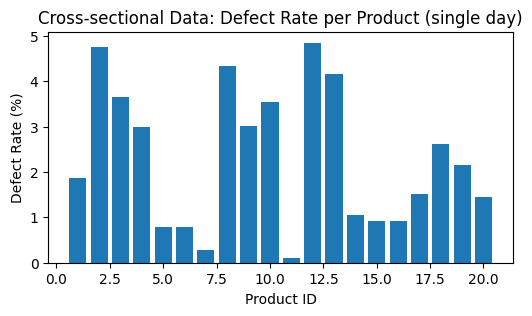

In [ ]:
# ===============================================
# MATERI 1 - SESI 2 (CODE)
# Different Types of Data (Cross-sectional, Time series, Panel)
# Konteks: data kualitas produk & performa mesin
# ===============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1️⃣ CROSS-SECTIONAL DATA
# -----------------------------
np.random.seed(42)
product_ids = np.arange(1, 21)
defect_rate = np.random.uniform(0, 5, 20)  # persen cacat tiap produk
cross_df = pd.DataFrame({'Product_ID': product_ids, 'Defect_Rate(%)': defect_rate})

print("=== CROSS-SECTIONAL DATA ===")
print(cross_df.head())

plt.figure(figsize=(6,3))
plt.bar(cross_df['Product_ID'], cross_df['Defect_Rate(%)'])
plt.title("Cross-sectional Data: Defect Rate per Product (single day)")
plt.xlabel("Product ID")
plt.ylabel("Defect Rate (%)")
plt.show()

# Interpretasi:
# - Setiap titik = satu produk berbeda pada waktu yang sama.
# - Analisis: variasi antar produk di 1 waktu (misal shift pagi).
# - Tidak menunjukkan tren waktu.


=== TIME SERIES DATA ===
        Date  Defect_Rate(%)
0 2025-01-01        1.797434
1 2025-01-02        2.112849
2 2025-01-03        1.918395
3 2025-01-04        1.867539
4 2025-01-05        2.493130


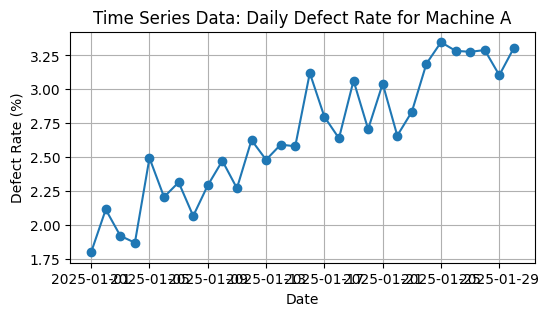

In [ ]:
# -----------------------------
# 2️⃣ TIME SERIES DATA
# -----------------------------
time_index = pd.date_range(start="2025-01-01", periods=30, freq="D")
defect_rate_ts = 2 + 0.05*np.arange(30) + np.random.normal(0, 0.2, 30)  # ada tren naik

ts_df = pd.DataFrame({'Date': time_index, 'Defect_Rate(%)': defect_rate_ts})
print("\n=== TIME SERIES DATA ===")
print(ts_df.head())

plt.figure(figsize=(6,3))
plt.plot(ts_df['Date'], ts_df['Defect_Rate(%)'], marker='o')
plt.title("Time Series Data: Daily Defect Rate for Machine A")
plt.xlabel("Date")
plt.ylabel("Defect Rate (%)")
plt.grid(True)
plt.show()

# Interpretasi:
# - Data berurutan dalam waktu untuk 1 entitas (mesin A).
# - Ada tren naik → menandakan proses mungkin memburuk.
# - Cocok untuk analisis stabilitas proses & forecasting.


=== PANEL DATA ===
  Machine       Date  Defect_Rate(%)
0       A 2025-01-01        2.575440
1       A 2025-01-02        1.511694
2       A 2025-01-03        1.568515
3       A 2025-01-04        1.487874
4       A 2025-01-05        1.637910


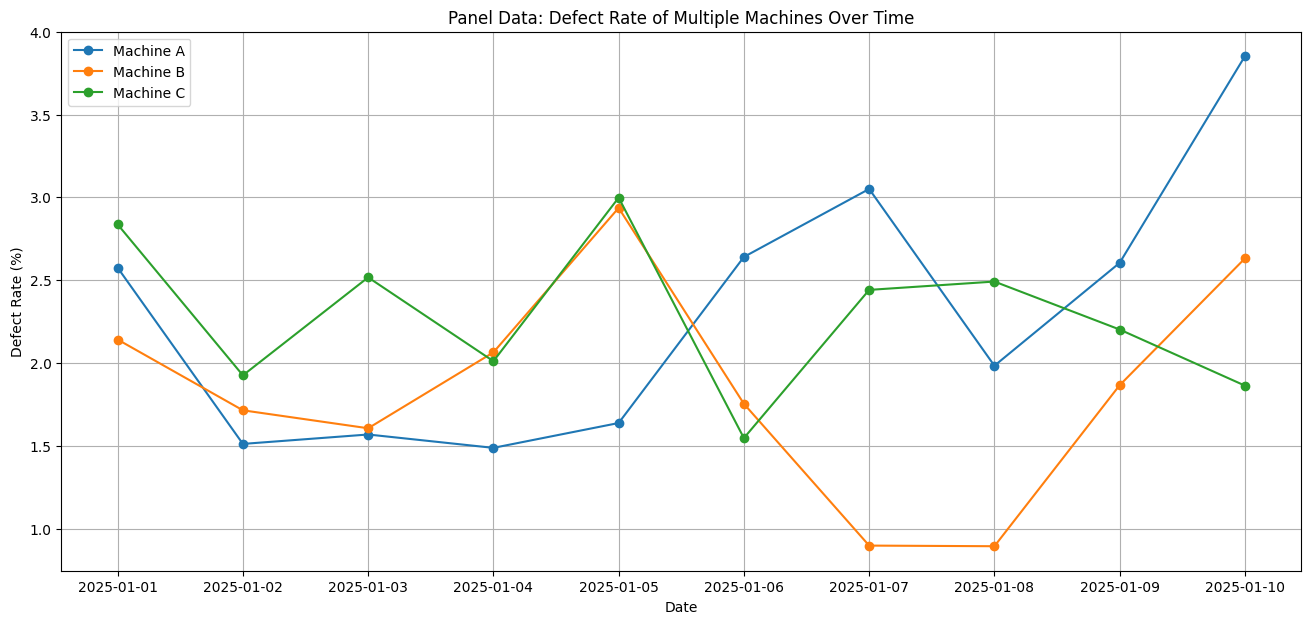

In [ ]:
# -----------------------------
# 3️⃣ PANEL DATA
# -----------------------------
machines = ['A','B','C']
days = pd.date_range(start="2025-01-01", periods=10, freq="D")
data = []
for m in machines:
    for d in days:
        rate = np.random.uniform(1, 3) + (0.1 if m=='A' else -0.05 if m=='B' else 0) * np.arange(len(days))[days.get_loc(d)]
        data.append([m, d, rate + np.random.normal(0, 0.2)])

panel_df = pd.DataFrame(data, columns=['Machine','Date','Defect_Rate(%)'])
print("\n=== PANEL DATA ===")
print(panel_df.head())

plt.figure(figsize=(16,7))
for m in machines:
    sub = panel_df[panel_df['Machine']==m]
    plt.plot(sub['Date'], sub['Defect_Rate(%)'], marker='o', label=f"Machine {m}")
plt.title("Panel Data: Defect Rate of Multiple Machines Over Time")
plt.xlabel("Date")
plt.ylabel("Defect Rate (%)")
plt.legend()
plt.grid(True)
plt.show()

# Interpretasi:
# - Setiap garis = 1 mesin (unit) yang diamati selama beberapa waktu.
# - Dapat dianalisis per mesin (time series) atau antar mesin (cross-sectional).
# - Sangat berguna untuk reliability dan benchmarking antar unit.

In [ ]:
# STRUKTUR INTERNAL DALAM DATA DERET WAKTU

# General Trend
# Pergerakan jangka panjang dari suatu variabel waktu - naik, turun, atau stabil
# Ciri-ciri: Terjadi dalam periode panjang (bulan/tahun), disebabkan oleh faktor sistematis seperti penurunan keausan mesin, perubahan kualitas material
# Contoh: Rata-rata cacat produk turun terus dalam 6 bulan -> efek perbaikan proses, downtime mesin meningkat perlahan -> tanda komponen sudah berumur

# Seasonality
# Pola berulang secara teratur dalam periode waktu tetap (harian, musiman, mingguan, nulanan, shift, dsb)
# Ciri-ciri: periode tetap dan bisa diprediksi, sering disebabkan oleh faktor operasional (lebaran, shift malam, musim, pola permintaan, suhu)
# Contoh: tingkat cacat lebih tinggi di shift malam, permintaan baju meningkat ketika mendekati bulan ramadhan dan tahun masuk sekolah
# Jenis visualisasi seasonality:
# 1. Run Sequences Plot -> Menampilkan data terhadap waktu untuk melihat pola fluktuasi
# 2. Seasonal Subseries Plot -> Memisahkan data per periode (misal per bulan/per shift)
# 3. Multiple Box Plot -> Perbandingan distribusi antar musim/periode

# Cyclical Changes
# Fluktuasi jangka panjang yang tidak beraturan(tidak memiliki periode tertentu), sering terkait tentang supply chain, ekonomi global, dan sistem besar
# Ciri-ciri: Siklusnya panjang dan tidak konstan, bisa berlangsung tahunan dan sulit diprediksi

# Unexpected Variations (Irregular Component/Noise)
# Perubahan acak yang tidak dapat dijelaskan oleh tren, siklus, dan musiman
# Ciri-ciri: tidak berulang dan tidak bisa diprediksi, Bisa disebabkan oleh error pengukuran, gangguan human factor, dan perubahan lingkungan mendadak

In [ ]:
# ============================================================
# MATERI 2 - SESI 2: INTERNAL STRUCTURES OF TIME SERIES
# Fokus: Trend, Seasonality, Cyclical, Unexpected Variations
# Konteks: defect rate (kualitas) mesin manufaktur
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 1️⃣ Generate synthetic quality data
# -----------------------------
np.random.seed(42)
dates = pd.date_range(start="2023-01-01", periods=365, freq="D")

# Komponen data:
trend = 0.005 * np.arange(365)                        # tren naik jangka panjang
seasonality = 0.5 * np.sin(2 * np.pi * np.arange(365)/30)  # pola musiman bulanan
cycle = 0.8 * np.sin(2 * np.pi * np.arange(365)/180)       # siklus jangka panjang
noise = np.random.normal(0, 0.2, 365)                 # variasi acak (noise)

# Gabungan seluruh komponen
defect_rate = 5 + trend + seasonality + cycle + noise

ts_df = pd.DataFrame({'Date': dates, 'Defect_Rate(%)': defect_rate})
ts_df['Month'] = ts_df['Date'].dt.month_name()
ts_df['Day'] = ts_df['Date'].dt.day

print("Data contoh:\n", ts_df.head())

Data contoh:
         Date  Defect_Rate(%)    Month  Day
0 2023-01-01        5.099343  January    1
1 2023-01-02        5.109223  January    2
2 2023-01-03        5.398711  January    3
3 2023-01-04        5.697121  January    4
4 2023-01-05        5.456080  January    5


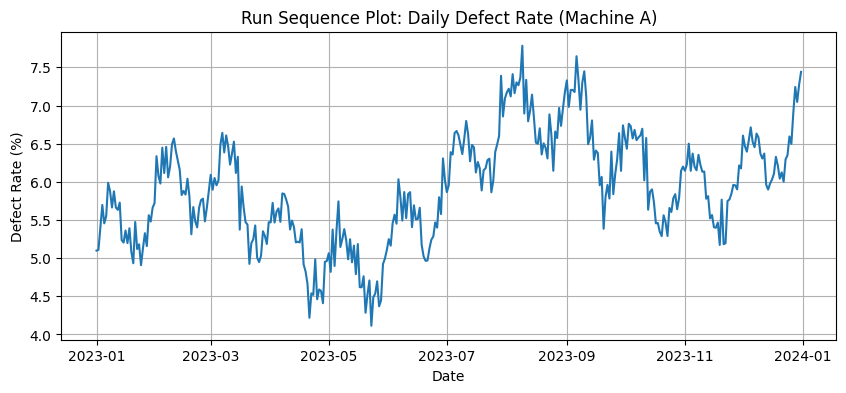

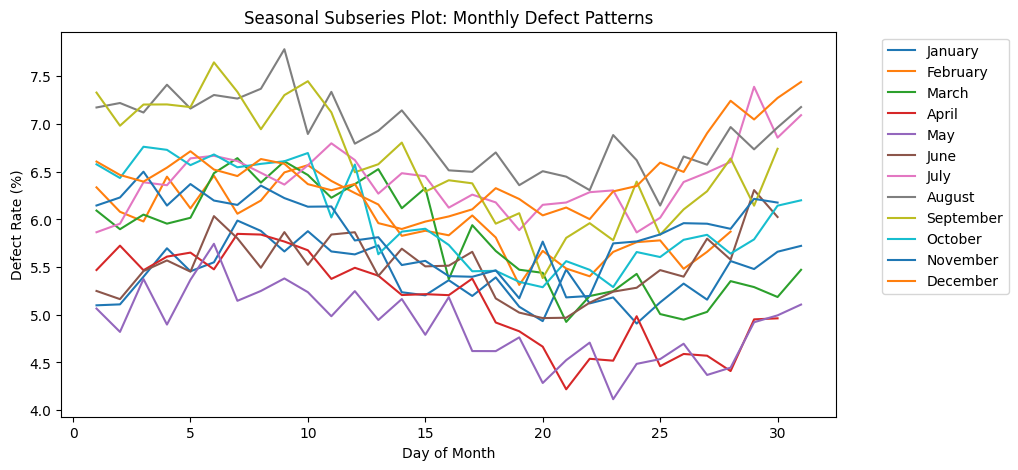

C:\Users\Robyi\AppData\Local\Temp\ipykernel_14624\4134386541.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y='Defect_Rate(%)', data=ts_df, palette='pastel')


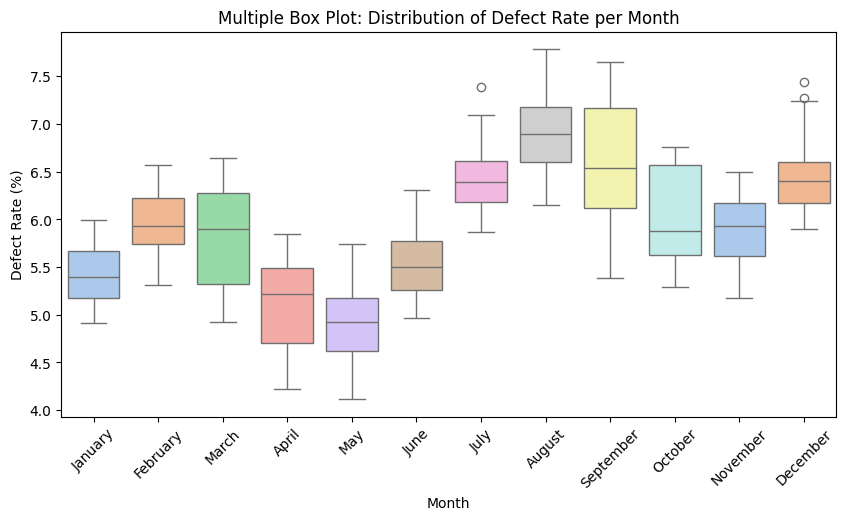

In [ ]:
# -----------------------------
# 2️⃣ Run Sequence Plot
# -----------------------------
plt.figure(figsize=(10,4))
plt.plot(ts_df['Date'], ts_df['Defect_Rate(%)'], color='tab:blue')
plt.title("Run Sequence Plot: Daily Defect Rate (Machine A)")
plt.xlabel("Date")
plt.ylabel("Defect Rate (%)")
plt.grid(True)
plt.show()

# Interpretasi:
# - Terlihat tren naik jangka panjang (defect makin besar).
# - Ada fluktuasi musiman (gelombang berulang tiap bulan).
# - Cocok untuk deteksi proses memburuk secara bertahap.

# -----------------------------
# 3️⃣ Seasonal Subseries Plot
# -----------------------------
plt.figure(figsize=(10,5))
sns.lineplot(x='Day', y='Defect_Rate(%)', hue='Month', data=ts_df, palette='tab10')
plt.title("Seasonal Subseries Plot: Monthly Defect Patterns")
plt.xlabel("Day of Month")
plt.ylabel("Defect Rate (%)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Interpretasi:
# - Pola setiap bulan terlihat mirip: naik di tengah bulan, turun di akhir.
# - Artinya ada pola musiman konsisten → misal karena jadwal maintenance bulanan.
# - Engineer bisa pakai ini untuk scheduling maintenance lebih tepat.

# -----------------------------
# 4️⃣ Multiple Box Plot (per month)
# -----------------------------
plt.figure(figsize=(10,5))
sns.boxplot(x='Month', y='Defect_Rate(%)', data=ts_df, palette='pastel')
plt.title("Multiple Box Plot: Distribution of Defect Rate per Month")
plt.xticks(rotation=45)
plt.ylabel("Defect Rate (%)")
plt.show()

# Interpretasi:
# - Variasi antar bulan terlihat jelas.
# - Misal: Februari punya median cacat tertinggi → mungkin suhu ruangan lebih tinggi.
# - Boxplot bantu engineer lihat bulan/periode dengan variasi ekstrem.

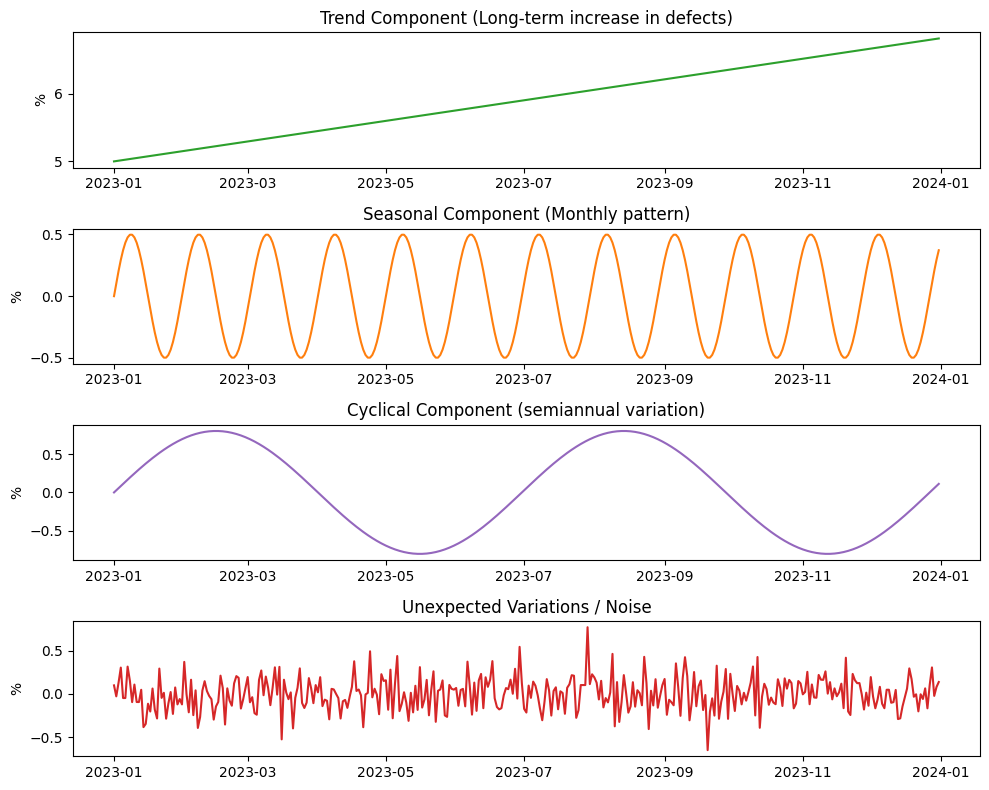

In [ ]:
# -----------------------------
# 5️⃣ Tambahkan perbandingan komponen (visual decomposition sederhana)
# -----------------------------
plt.figure(figsize=(10,8))

plt.subplot(4,1,1)
plt.plot(dates, 5 + trend, color='tab:green')
plt.title("Trend Component (Long-term increase in defects)")
plt.ylabel("%")

plt.subplot(4,1,2)
plt.plot(dates, seasonality, color='tab:orange')
plt.title("Seasonal Component (Monthly pattern)")
plt.ylabel("%")

plt.subplot(4,1,3)
plt.plot(dates, cycle, color='tab:purple')
plt.title("Cyclical Component (semiannual variation)")
plt.ylabel("%")

plt.subplot(4,1,4)
plt.plot(dates, noise, color='tab:red')
plt.title("Unexpected Variations / Noise")
plt.ylabel("%")

plt.tight_layout()
plt.show()

# Interpretasi:
# - Trend: arah jangka panjang → proses memburuk secara perlahan.
# - Seasonality: pola tetap tiap bulan → pengaruh jadwal produksi/maintenance.
# - Cycle: fluktuasi panjang → pengaruh musiman makro (supply chain, aging).
# - Noise: variasi acak → error pengukuran, gangguan sesaat.

In [ ]:
# Model for Time Series Analysis & Autocorrelation

# Zero-Mean Model (White Noise)
# Time series tanpa pola - nilai-nilainya acak murni di sekitar mean nol
# yt = epsilont
# Karakteristik: tidak ada tren dan seasonality, tidak bisa diprediksi dari nilai sebelumnya, ACF = 0 di semua lag (tidak ada korelasi waktu)

# Random Walk Model
# Setiap nilai tergantung pada nilai sebelumnya plus noise acak
# yt = yt-1 + epsilont
# Karakteristik: tidak stasioner(mean dan variansi berubah seiring waktu), perubahan kecil kumulatif -> menghasilkan tren mengembara, ACF menurun perlahan

# Trend Model
# Model dengan komponen deterministik (tren linear/non linear(kuadratik))
# yt = beta0 + beta1*t + epsilont
# Karakteristik: ada arrah jelas(naik/turun), mudah dihilangkan dengan differencing(selisih antar waktu), ACF tinggi di lag 1

# Seasonality Model
# Pola berulang pada interval tetap
# yt = beta0 + beta1*sin(2pit/s)+beta2*cos(2pit/s) + epsilont
# Karakteristik: ACF menunjukan lonjakan kuat pada kelipatan periode s(misal lag 7,14,21), dapat dimodelkan dengan pendekatan sinusoidal atau dummy variables

# Autocorrelation (ACF) & Partial Autocorrelation (PACF)
# AutoCorrelation Function (ACF)
# Mengukur hubungan (korelasi) antara nilai saat ini dan nilai sebelumnya (lag)
# pk = Corr(yt, yt-k)
# Makna: Jika p tinggi -> nilai hari ini tergantung nilai kemarin, jika semua p kecil -> data acak(white noise), pola ACF membantu mengidentifikasi pola AR/MA
# Partial AutoCorrelation Function (PACF)
# Mengukur korelasi antara yt dan yt-k dengan efek lag di antaranya dihilangkan
# Makna: PACF menampilkan korelasi langsung murni antar waktu tertentu, pola PACF membantu memilih model AR(p)

# Cara Baca ACF
# Jika lag 3 = 0 maka -> lag 3 dengan lag 0 tidak ada korelasi (dengan pengaruh lag di antaranya -> yaitu lag 1 dan lag 2)
# jika lag 3 = mendekati 1 maka, lag 3 dan lag 0 ada korelasi positif yang kuat
# jika lag 3 = mendekat -1 maka, lag 3 dan lag 0 ada korelasi negatif yang kuat

# Cara Baca PACF
# Jika lag 3 = 0 maka -> lag 3 dengan lag 0 tidak ada korelasi langsung (tanpa pengaruh lag di antaranya -> yaitu lag 1 dan lag 2)
# jika lag 3 = mendekati 1 maka, lag 3 dan lag 0 ada korelasi positif langsung yang kuat
# jika lag 3 = mendekati -1 maka, lag 3 dan lag 0 ada korelasi negatif langsung yang kuat

# Area biru transparan di plot ACF/PACF
# Menunjukan interval kepercayaan 95%
# Jika nilai ACF/PACF di luar area ini -> korelasi signifikan secara statistik (bukan karena kebetulan), berarti indikasi korelasi nyata pada lag tersebut
# Jika di dalam area -> korelasi tidak signifikan, berarti indikasi korelasi hanya kebetulan

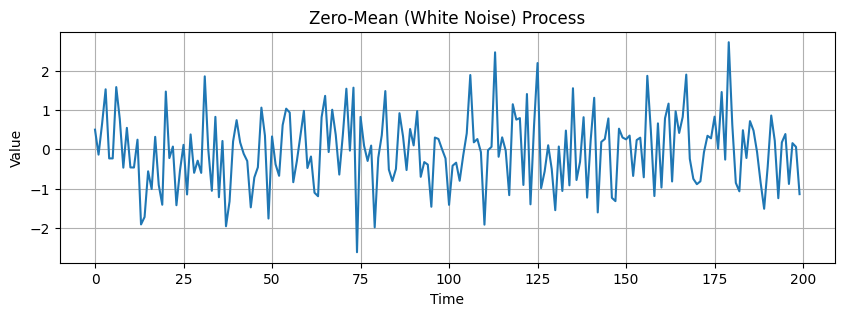

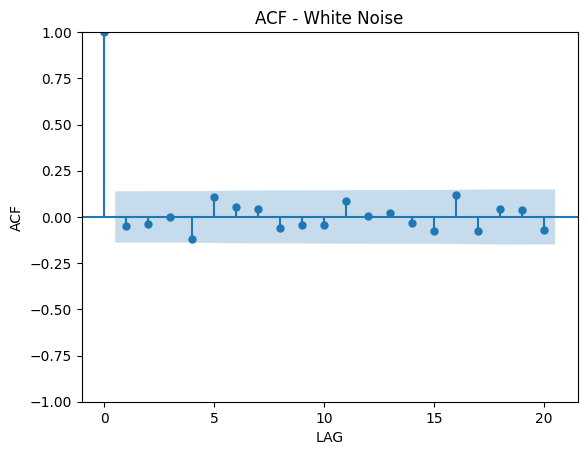

In [ ]:
# ===========================================================
# MATERI 3 - SESI 2: Models for Time Series Analysis & ACF/PACF
# Konteks: defect rate mesin manufaktur & proses drift
# ===========================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

np.random.seed(42)

# ===========================================================
# 1️⃣ Zero-Mean (White Noise) Model
# ===========================================================
n = 200
white_noise = np.random.normal(0, 1, n)

plt.figure(figsize=(10,3))
plt.plot(white_noise, color='tab:blue')
plt.title("Zero-Mean (White Noise) Process")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.show()

plot_acf(white_noise, lags=20)
plt.title("ACF - White Noise")
plt.xlabel('LAG')
plt.ylabel('ACF')
plt.show()

# Interpretasi:
# - Plot terlihat acak tanpa pola.
# - ACF hampir semua di sekitar 0 → tidak ada korelasi antar waktu.
# - Dalam kualitas: ini ideal! menandakan proses stabil (tidak ada drift atau pola tersembunyi).

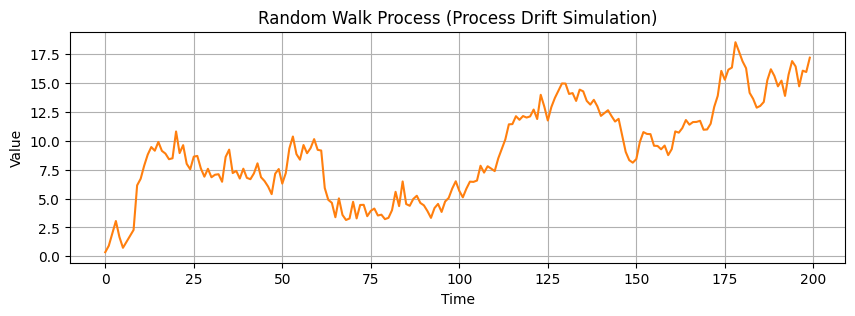

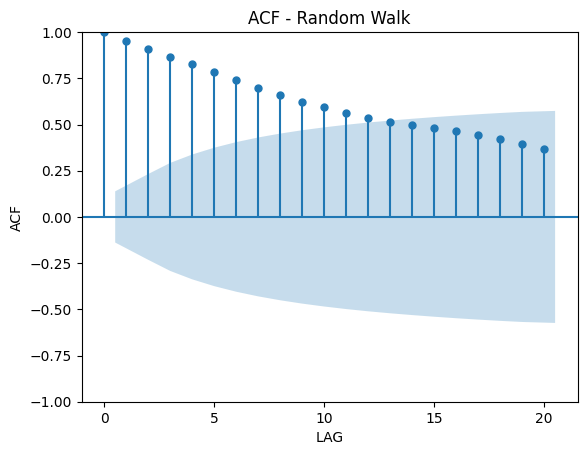

In [ ]:
# ===========================================================
# 2️⃣ Random Walk Model
# ===========================================================
noise = np.random.normal(0, 1, n)
random_walk = np.cumsum(noise)

plt.figure(figsize=(10,3))
plt.plot(random_walk, color='tab:orange')
plt.title("Random Walk Process (Process Drift Simulation)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.show()

plot_acf(random_walk, lags=20)
plt.title("ACF - Random Walk")
plt.xlabel('LAG')
plt.ylabel('ACF')
plt.show()

# Interpretasi:
# - Nilai terus bergeser ke atas/bawah tanpa pola tetap (drift kumulatif).
# - ACF menurun perlahan → korelasi jangka panjang.
# - Dalam kualitas: ini menggambarkan drift alat ukur atau mesin aging (non-stationary).
# - Biasanya random walk indikasi kita butuh differencing

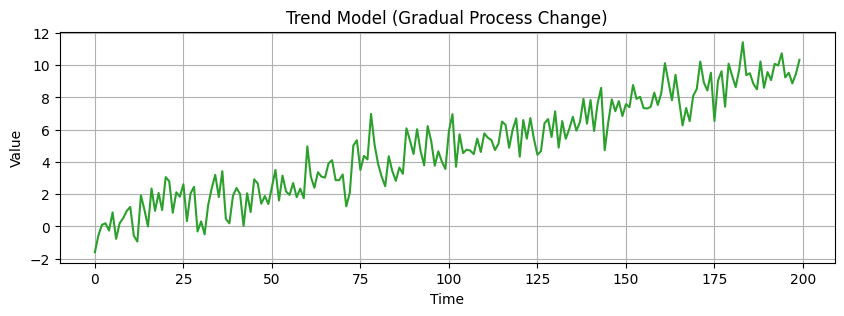

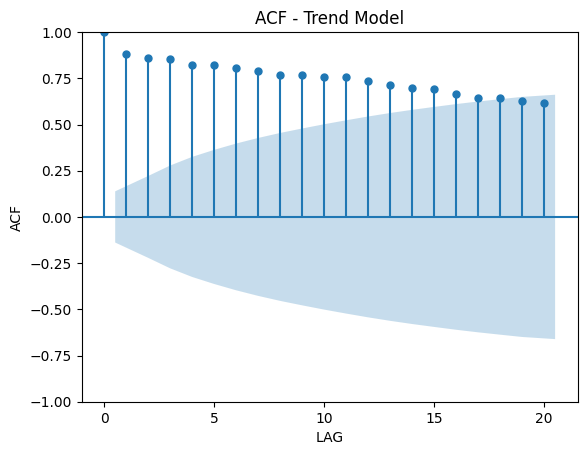

In [ ]:
# ===========================================================
# 3️⃣ Trend Model
# ===========================================================
trend = 0.05 * np.arange(n) + np.random.normal(0, 1, n)
plt.figure(figsize=(10,3))
plt.plot(trend, color='tab:green')
plt.title("Trend Model (Gradual Process Change)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.show()

plot_acf(trend, lags=20)
plt.title("ACF - Trend Model")
plt.xlabel('LAG')
plt.ylabel('ACF')
plt.show()

# Interpretasi:
# - Terlihat arah naik → kualitas makin meningkat/memburuk tergantung konteks.
# - ACF tinggi di lag kecil → ada korelasi kuat antar waktu berdekatan.
# - Dalam kualitas: indikasi proses membaik atau menurun secara sistematis (bukan acak).

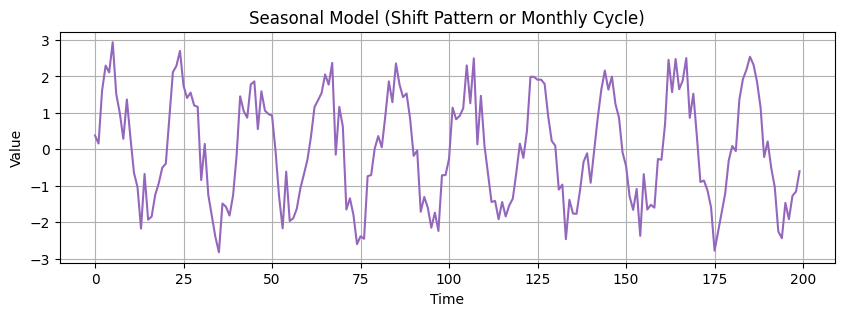

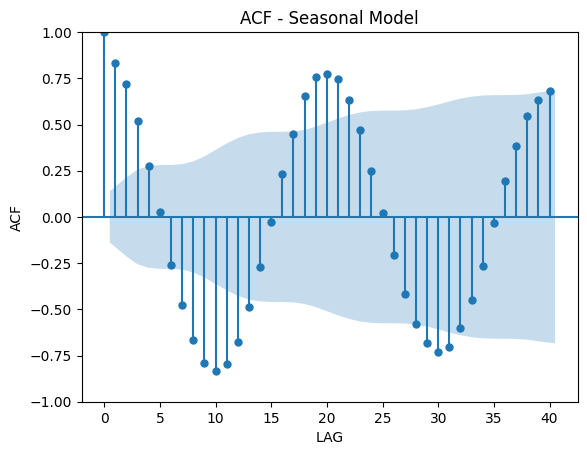

In [ ]:
# ===========================================================
# 4️⃣ Seasonal Model
# ===========================================================
t = np.arange(n)
seasonal = 2 * np.sin(2 * np.pi * t / 20) + np.random.normal(0, 0.5, n)

plt.figure(figsize=(10,3))
plt.plot(seasonal, color='tab:purple')
plt.title("Seasonal Model (Shift Pattern or Monthly Cycle)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.show()

plot_acf(seasonal, lags=40)
plt.title("ACF - Seasonal Model")
plt.xlabel('LAG')
plt.ylabel('ACF')
plt.show()

# Interpretasi:
# - Pola berulang terlihat jelas (gelombang sinusoidal).
# - ACF menunjukkan puncak pada kelipatan periode (lag 20, 40, ...).
# - Dalam kualitas: misalnya tingkat cacat berulang per shift atau per siklus mesin.

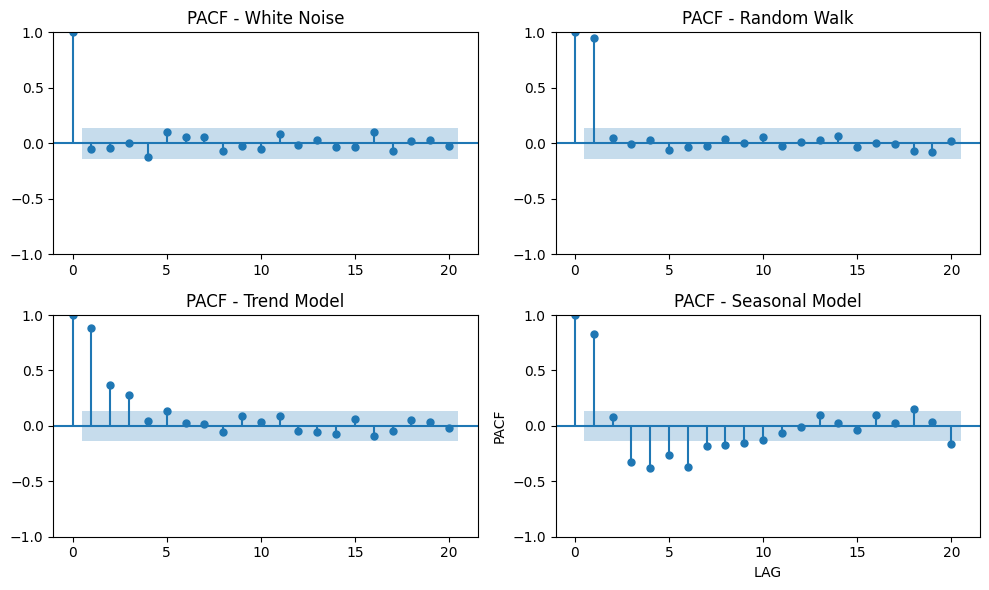

In [ ]:
# ===========================================================
# 5️⃣ Bandingkan PACF
# ===========================================================
from statsmodels.graphics.tsaplots import plot_pacf

fig, axes = plt.subplots(2,2, figsize=(10,6))
plot_pacf(white_noise, ax=axes[0,0], lags=20)
axes[0,0].set_title("PACF - White Noise")
plt.xlabel('LAG')
plt.ylabel('PACF')

plot_pacf(random_walk, ax=axes[0,1], lags=20)
axes[0,1].set_title("PACF - Random Walk")
plt.xlabel('LAG')
plt.ylabel('PACF')

plot_pacf(trend, ax=axes[1,0], lags=20)
axes[1,0].set_title("PACF - Trend Model")
plt.xlabel('LAG')
plt.ylabel('PACF')

plot_pacf(seasonal, ax=axes[1,1], lags=20)
axes[1,1].set_title("PACF - Seasonal Model")
plt.xlabel('LAG')
plt.ylabel('PACF')

plt.tight_layout()
plt.show()

# Interpretasi PACF:
# - White noise: semua lag ≈ 0 → tidak ada korelasi langsung.
# - Random walk: lag 1 besar → nilai hari ini sangat dipengaruhi kemarin.
# - Trend: lag 1 besar, tapi cenderung turun → indikasi AR-like process.
# - Seasonal: lag pada periode berulang menonjol → siklus jelas.

In [ ]:
# Advanced Visualization
# Tujuan visualisasi adalah mengamati pola, tren, musim, anomali, dan memahami struktur sebelum pemodelan

# Resampling time series data
# Mengubah frekuensi pengamatan

# Downsampling
# Mengubah data menjadi resolusi lebih rendah, contoh: data harian menjadi mingguan/bulanan
# Biasanya menggunakan agregasi: mean, sum, max, min, count, dsb
# Contoh: permintaan harian -> permintaan bulanan, sensor per menit -> rata-rata per jam

# Upsampling
# Mengubah data menjadi resolusi lebih tinggi, contoh: data mingguan menjadi harian
# Biasanya membutuhkan: filling(forward fill, dan backward fill), dan interpolasi(linear, spline, polynomial)

# Group-wise aggregation
# Mirip dengan resampling tapi berdasarkan kategori
# Contoh: total produksi per shift, rerata defect per batch, total kerusakan mesin per tipe mesin

# Moving statistics
# Digunakan untuk analisis lokal
# Paling umum: moving average(rolling mean), rolling median, roling std/var, rolling sum, roling min/max, rolling correlation
# Kegunaan: menghaluskan noise(trend), melihat volatilitas, deteksi anomali, dan rekayasa fitur
# Interpretasi rolling mean -> jika rolling mean naik maka tren naik, jika rolling std besar maka data lebih volatile

In [ ]:
# Manfaat dan Kekurangan

# Fitur Lag
# Menfaat:
# Menambah informasi historis -> sangat penting untuk ML based forecasting
# Bisa menangkap pola
# Bisa dipakai untuk analisis korelasi temporal
# Kekurangan:
# Lag tidak berguna jika data benar-benar random(noise)
# Terlalu banyak lag bisa membuat: multikolinearitas dan overfitting model
# Data awal akan missing karena shift

# Differencing
# Manfaat:
# Menghilangkan tren -> membuat data stasioner, syarat penting model ARIMA
# bisa mengurangi autocorrelation yang kuat
# Mudah menghitung dan interpretasi
# Kekurangan:
# Informasi absolut hilang -> hanya fokus perubahan, bukan nilai sebenarnya
# Bisa memperbesar noise -> terutama jik data sudah stastioner dan over differencing
# Tidak cocok jika tren berubah non-linear atau musiman kompleks

# Moving Average / Smoothing
# Manfaat:
# Menurunkan noise -> tren lebih jelas
# Moving std/var bisa membantuk deteksi proses tidak stabil
# Kekurangan
# Smoothing menggeser sinyal asli -> ada efek lag
# Tidak cocok untuk deteksi perubahan cepat
# Choosing windows size sangat mempengaruhi interpretasi

# Downsampling
# Kekurangan:
# Agregasi sum/mean bisa menghasilkan bias jika proses tidak stanil
# Interpolasi bisa membuat nilai palsu yang tidak realistis

# Moving statistics
# Manfaat:
# Mendukung process stability analysis
# Std/var tinggi = proses tidak terkendali
# Rolling correlation membantu melihat coupling antar variabel
# Berguna untuk predictive maintenance (geteran mesin naik -> rolling variance naik)
# Kekurangan:
# Tidak cocok untuk proses yang sangat tidak stastioner
# Bisa memberi sinyal palsu pada fase transisi produksi

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# -----------------------------------------------------
# 1. Generate synthetic QUALITY ENGINEERING time series
# -----------------------------------------------------
np.random.seed(1)

dates = pd.date_range(start='2023-01-01', periods=365, freq='D')
df = pd.DataFrame({
    "date": dates,
    "defect_rate": 5 + np.sin(np.arange(365)/20) * 2 + np.random.normal(0, 0.5, 365),
    "line_speed": 100 + np.random.normal(0, 5, 365),
    "temperature": 50 + np.sin(np.arange(365)/15) * 3 + np.random.normal(0, 1, 365)
})

df.set_index("date", inplace=True)
df.head()

defect_rate  line_speed  temperature
date                                            
2023-01-01     5.812173  103.639067    50.966221
2023-01-02     4.794080  102.575368    50.925769
2023-01-03     4.935581   86.087328    53.719895
2023-01-04     4.762392  102.923233    49.995783
2023-01-05     5.830042  101.621371    50.411035

In [ ]:
# ADVANCED PROCESSING

# Lag Features (fitur t−1, t−7, dll)

df["defect_rate_lag1"] = df["defect_rate"].shift(1)
df["defect_rate_lag7"] = df["defect_rate"].shift(7)
df[["defect_rate", "defect_rate_lag1", "defect_rate_lag7"]].head(10)

# Interpretasi:
# Lag1 = nilai defect_rate hari sebelumnya.
# Lag7 = nilai defect_rate seminggu sebelumnya.
# Jika lag1 = 5.2 berarti kemarin defect rate-nya 5.2.

# Lihat di kolom lag7, disitu 5.8 berarti 7 periode sebelumnya 5.8(lihat kolom defect rate)
# Begitu juga dengan lag1, bedanya lag 1 = 1 periode

defect_rate  defect_rate_lag1  defect_rate_lag7
date                                                       
2023-01-01     5.812173               NaN               NaN
2023-01-02     4.794080          5.812173               NaN
2023-01-03     4.935581          4.794080               NaN
2023-01-04     4.762392          4.935581               NaN
2023-01-05     5.830042          4.762392               NaN
2023-01-06     4.344039          5.830042               NaN
2023-01-07     6.463446          4.344039               NaN
2023-01-08     5.305192          6.463446          5.812173
2023-01-09     5.938356          5.305192          4.794080
2023-01-10     5.745246          5.938356          4.935581

In [ ]:
# Differencing (membuang tren/stasioner)

df["defect_rate_diff1"] = df["defect_rate"].diff()
df["defect_rate_diff7"] = df["defect_rate"].diff(7)
df[["defect_rate", "defect_rate_diff1", "defect_rate_diff7"]].head(10)

# Interpretasi:
# diff1 = perubahan defect rate dibanding hari sebelumnya.
# Jika diff1 = +0.3, berarti naik 0.3 dibanding kemarin.
# diff7 = perubahan dibanding minggu lalu.

# Lihat di diff1, -1.01 itu artinya perbedaan antara defect rate hari ini yaitu 4.79 dan defect rate kemaren yaitu 5.81 adalah -1.01
# Sama seperti diff1, cuman ini 7 periode kebelakang. misal diff7 adalah -0.50, berarti lihat kolom defect rate row ke 7 yitu 5.30 di kurangi -
# - defect rate minggu kemarin yaitu 5.81 maka diff7 =  0.50

defect_rate  defect_rate_diff1  defect_rate_diff7
date                                                         
2023-01-01     5.812173                NaN                NaN
2023-01-02     4.794080          -1.018093                NaN
2023-01-03     4.935581           0.141501                NaN
2023-01-04     4.762392          -0.173189                NaN
2023-01-05     5.830042           1.067651                NaN
2023-01-06     4.344039          -1.486004                NaN
2023-01-07     6.463446           2.119408                NaN
2023-01-08     5.305192          -1.158254          -0.506981
2023-01-09     5.938356           0.633164           1.144276
2023-01-10     5.745246          -0.193110           0.809665

In [ ]:
# Moving Average / Smoothing

df["defect_rate_sma7"] = df["defect_rate"].rolling(7).mean()
df["defect_rate_sma30"] = df["defect_rate"].rolling(30).mean()
df[["defect_rate", "defect_rate_sma7", "defect_rate_sma30"]].tail()

# Interpretasi:
# SMA7 → rata-rata 7-hari, menghaluskan noise jangka pendek.
# SMA30 → tren jangka panjang.
# Jika SMA30 = 5.1 → tren defect 30 hari terakhir sekitar 5.1.

# Maksudnya adalah

defect_rate  defect_rate_sma7  defect_rate_sma30
date                                                        
2023-12-27     3.219278          3.115138           3.039292
2023-12-28     4.035491          3.288185           3.038170
2023-12-29     2.665711          3.247661           3.028867
2023-12-30     3.888491          3.325484           3.047514
2023-12-31     3.672116          3.389725           3.034870

<Figure size 1000x600 with 0 Axes>

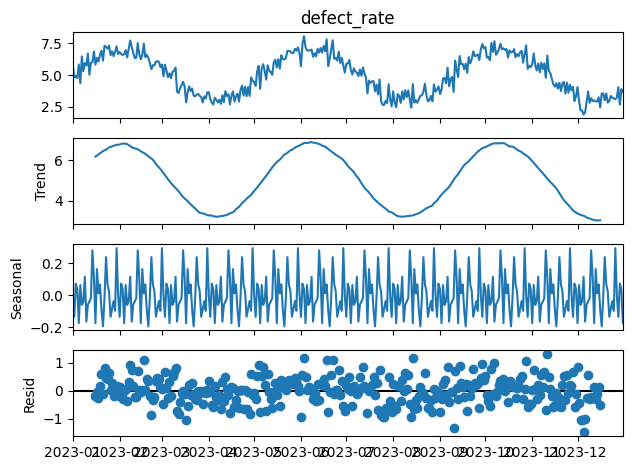

In [ ]:
# Decomposition (trend, seasonality, residual)

result = seasonal_decompose(df["defect_rate"], model='additive', period=30)

plt.figure(figsize=(10,6))
result.plot()
plt.show()

# Interpretasi plot:
# Trend: garis perlahan naik/turun → tren jangka panjang defect.
# Seasonal: pola berulang tiap 30 hari (kita set period 30).
# Residual: noise / variasi acak.

In [ ]:
# RESAMPLING TIME SERIES

# Downsampling (Daily → Weekly Mean)

weekly = df["defect_rate"].resample("W").mean()
weekly.head()

# Interpretasi:
# Menjadi data mingguan.
# Jika minggu pertama = 4.9 artinya rata-rata defect minggu itu 4.9.

date
2023-01-01    5.812173
2023-01-08    5.204968
2023-01-15    6.032936
2023-01-22    6.453043
2023-01-29    6.909541
Freq: W-SUN, Name: defect_rate, dtype: float64

In [ ]:
# Downsampling (Daily → Monthly Sum)

# Contoh: total cacat bulanan.

monthly_total = df["defect_rate"].resample("M").sum()
monthly_total.head()

# Interpretasi:
# bulan Januari bisa saja 155 → total defect rate selama Januari sekitar 155.

date
2023-01-31    191.915349
2023-02-28    181.952661
2023-03-31    128.236070
2023-04-30    101.919820
2023-05-31    183.033799
Freq: M, Name: defect_rate, dtype: float64

In [ ]:
# Upsampling (Daily → Hourly)
# Biasanya data kualitas harian ingin diisi ke jam dengan interpolasi.

hourly = df["defect_rate"].resample("H").interpolate("linear")
hourly.head()

# Interpretasi:
# Data harian di-interpolate ke nilai jam-ke-jam.
# Misal 5.2 → naik linear ke 5.5 keesokan hari.

date
2023-01-01 00:00:00    5.812173
2023-01-01 01:00:00    5.769752
2023-01-01 02:00:00    5.727332
2023-01-01 03:00:00    5.684911
2023-01-01 04:00:00    5.642491
Freq: H, Name: defect_rate, dtype: float64

In [ ]:
# Group-wise Aggregation
# Misal kita kategorikan suhu menjadi “Low”, “Medium”, “High”.

df["temp_category"] = pd.cut(df["temperature"],
                             bins=[0, 48, 52, 100],
                             labels=["Low", "Medium", "High"])

group_stats = df.groupby("temp_category")["defect_rate"].mean()
group_stats

# Interpretasi:
# Contoh output:
# Low: 4.8
# Medium: 5.2
# High: 6.1
# Artinya defect meningkat pada suhu tinggi → masalah kualitas.

C:\Users\Robyi\AppData\Local\Temp\ipykernel_11360\1918319268.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_stats = df.groupby("temp_category")["defect_rate"].mean()


temp_category
Low       5.199251
Medium    5.006484
High      4.969467
Name: defect_rate, dtype: float64

In [ ]:
# Moving Statistics (Rolling Variance & Std)

# Defect rate 1 tahun = mean/std 5.2 -> itu mean/std global
# Tapi rolling berbeda
# Ia memakai rerata lokal di sekitar waktu tertentu
# Analogi rolling.mean(7):
# hari ke 10 -> hitung rata-rata dari 4-10
# hari ke 11 -> hitung rata-rata dari 5-11
# dst


df["defect_std7"] = df["defect_rate"].rolling(7).std()
df["defect_var30"] = df["defect_rate"].rolling(30).var()
df[["defect_rate", "defect_std7", "defect_var30"]].tail()

# Interpretasi:
# STD7 tinggi → data lebih fluktuatif, proses kurang stabil.
# Variance 30 hari rendah → proses stabil jangka panjang.

defect_rate  defect_std7  defect_var30
date                                              
2023-12-27     3.219278     0.177119      0.269666
2023-12-28     4.035491     0.351424      0.267312
2023-12-29     2.665711     0.408693      0.271706
2023-12-30     3.888491     0.476309      0.293719
2023-12-31     3.672116     0.490215      0.272253

In [ ]:
# Proses Stasioner
# Time series disebut stastioner jika karakter statistiknya tidak berubah terhadap waktu, yaitu:
# mean dan varian konstan, autocorrelation tidak berubah, tidak ada trend, tidak ada seasonality
# Contoh: cycle time menurun karena operator makin mahir (trend), suhu naik berulang tiap musim dingin(seasonality)

# Differencing
# Mengambil perbedaan antar periode: yt - yt-1
# Tujuannya: menghapus tren/musiman, menstabilkan mean, dan mencapai stastionarity

# First order differencing
# Cocok untuk proses yang punya tren linear

# Second order differencing
# jika first order tidak cukup, dan data memilki non-linear tren

# Seasonality differencing
# yt-yt-s
# di mana s = panjang seasonality
# contoh
# Data harian -> weekly seasonality -> s=7
# Data menit -> day seasonality -> s=1440(1440 menit = 1 hari)
# cocok untuk menghilangkan pola musiman berulang

# Bagaimana mengetahui apakah differencing cukup?
# ACF berkurang drastis, plot terlihat data, ADF test biasanya menunjukkan stationary

# Over differencing
# noise meningkat, informasi hilang, dan model tidak stabil
# biasanya cukup 1-2 kali differencing, atau 1 saja seasonal differencing

# Augmented Dickey-Fuller (ADF) Test
# dipaakai untuk mengecek apakah data stasioner atau tidak
# Hipotesis -> H0: data tidak stasioner, H1: data stasioner
# jika p-value < 0.05 -> tolak H0 -> data stasioner
# jika p-value >= 0.05 -> gagal tolak H0 -> data tidak stasioner
# jika data non stasioner maka perlu differencing, kalau sudah stasioner data siap untuk ARIMA

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# generate data 365 hari (defect_rate dengan trend + seasonality)
np.random.seed(1)
dates = pd.date_range(start='2023-01-01', periods=365, freq='D')

df = pd.DataFrame({
    "date": dates,
    "defect_rate": 3
                    + np.arange(365) * 0.01           # TREND sedikit naik
                    + np.sin(np.arange(365)/7) * 0.5  # SEASONAL weekly
                    + np.random.normal(0, 0.2, 365)   # noise
})

df.set_index("date", inplace=True)
df.head()

defect_rate
date                   
2023-01-01     3.324869
2023-01-02     2.958835
2023-01-03     3.055287
2023-01-04     3.023192
2023-01-05     3.483499

In [ ]:
# 2. ADF Test Function

def adf_test(series, title="ADF Test"):
    print(f"--- {title} ---")
    result = adfuller(series.dropna())
    p_value = result[1]
    print(f"ADF Statistic  : {result[0]}")
    print(f"p-value        : {p_value}")
    if p_value < 0.05:
        print("=> Data STATIONARY (p < 0.05)")
    else:
        print("=> Data NON-STATIONARY (p > 0.05)")
    print()

# Penjelasan:
# ADF Statistic → semakin negatif → semakin stasioner.
# p-value:
# <0.05 = stasioner
# > 0.05 = tidak stasioner

# 3 Cek Stasioneritas Sebelum Differencing

adf_test(df["defect_rate"], "Original Defect Rate")

# Interpretasi contoh (angka bebas):
# p-value ≈ 0.12
# → tidak stasioner
# → perlu differencing.

--- Original Defect Rate ---
ADF Statistic  : -0.9793476996712128
p-value        : 0.7607220348514214
=> Data NON-STATIONARY (p > 0.05)



In [ ]:
# 4. First Order Differencing

df["diff1"] = df["defect_rate"].diff()
adf_test(df["diff1"], "First Order Difference")

# Interpretasi:
# diff1 = Y(t) − Y(t−1)
# Jika p-value < 0.05 → trend berhasil dihilangkan.
# Biasanya seasonal pattern masih ada.

--- First Order Difference ---
ADF Statistic  : -6.534300921544419
p-value        : 9.69488029507125e-09
=> Data STATIONARY (p < 0.05)



In [ ]:
# 5. Second Order Differencing

df["diff2"] = df["defect_rate"].diff().diff()
adf_test(df["diff2"], "Second Order Difference")

# Interpretasi:
# Digunakan jika diff1 masih tidak stasioner.
# Kalau p-value tetap >0.05 → tren sangat kuat / musiman dominan.

--- Second Order Difference ---
ADF Statistic  : -10.706785902445576
p-value        : 3.411535786271396e-19
=> Data STATIONARY (p < 0.05)



In [ ]:
# 6. Seasonal Differencing (Weekly, s=7)

df["diff_seasonal"] = df["defect_rate"].diff(7)
adf_test(df["diff_seasonal"], "Seasonal Difference (s=7)")

# Interpretasi:
# Ideal untuk pola mingguan.
# Jika p-value < 0.05 → pola musiman hilang

--- Seasonal Difference (s=7) ---
ADF Statistic  : -8.731053557416947
p-value        : 3.190918163024896e-14
=> Data STATIONARY (p < 0.05)



In [ ]:
# 7. First + Seasonal Differencing (ARIMA (1,1,1)(1,1,1))
# Sering dipakai saat data punya trend + seasonal.

df["diff1_seasonal"] = df["defect_rate"].diff().diff(7)
adf_test(df["diff1_seasonal"], "First + Seasonal Difference")

# Interpretasi:
# Biasanya ini paling efektif.
# p-value hampir pasti < 0.05 → stasioner.

--- First + Seasonal Difference ---
ADF Statistic  : -5.572866766464987
p-value        : 1.4540842723285578e-06
=> Data STATIONARY (p < 0.05)



In [ ]:
# Contoh Prepared Time Series Dataset
# Dataset ini mensimulasikan temperatur mesin yang direkam tiap menit.

import pandas as pd
import numpy as np

# ----- Membuat prepared dataset -----

np.random.seed(0)

time_index = pd.date_range(
start="2025-01-01 08:00",
periods=120, freq="T" # T = minute
)

temperatur = 60 + np.random.normal(0, 0.8, size=120)

df_prepared = pd.DataFrame({ "Waktu_Menit": time_index, "Temperatur_Mesin": temperatur })

# Menjadikan kolom waktu sebagai index (standard untuk time series)
df_prepared = df_prepared.set_index("Waktu_Menit")

df_prepared.head()

# Penjelasan
# date_range membuat timestamp rapi → contoh time series yang sudah siap pakai.
# normal() membuat fluktuasi alami seperti sensor sebenarnya.
# Index dibuat DatetimeIndex supaya bisa dipakai untuk forecasting ARIMA, resampling, dll.

/tmp/ipython-input-776405224.py:11: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  time_index = pd.date_range(


Temperatur_Mesin
Waktu_Menit                          
2025-01-01 08:00:00         61.411242
2025-01-01 08:01:00         60.320126
2025-01-01 08:02:00         60.782990
2025-01-01 08:03:00         61.792715
2025-01-01 08:04:00         61.494046

In [ ]:
# Contoh Found Time Series (Belum Rapi)
# Dataset simulasi jumlah cacat harian yang tidak berurutan.

df_found = pd.DataFrame({ "Tanggal": ["2025-01-03", "2025-01-01", "2025-01-05"], "Jumlah_Cacat": [12, 15, 10] })

df_found.head()

# Penjelasan
# Ini bukan time series karena tanggal tidak berurutan.
# Struktur ini sangat umum di dunia QC pabrik.

Tanggal  Jumlah_Cacat
0  2025-01-03            12
1  2025-01-01            15
2  2025-01-05            10

In [ ]:
# Menjadikan Found Dataset Menjadi Time Series
# Kita harus:
# Ubah kolom menjadi datetime
# Urutkan
# Set sebagai index
# Ubah tanggal ke format datetime

df_found["Tanggal"] = pd.to_datetime(df_found["Tanggal"])

# Urutkan berdasarkan waktu
df_found = df_found.sort_values("Tanggal")

# Jadikan index time series
df_found = df_found.set_index("Tanggal")

df_found.head()

# Penjelasan
# Setelah tiga langkah ini → baru dia menjadi time series yang valid.
# Belum ada frekuensi tetap, tapi sudah bisa dianalisis.

Jumlah_Cacat
Tanggal                 
2025-01-01            15
2025-01-03            12
2025-01-05            10

In [ ]:
# Constructing Time Series (Mengisi Tanggal Hilang)
# Found time series biasanya punya tanggal hilang.
# Kita isi tanggal hilang dengan nilai tertentu (misalnya nol atau interpolasi).
# Membuat rentang tanggal lengkap

full_range = pd.date_range(df_found.index.min(), df_found.index.max(), freq="D")

# Reindex → menambah baris tanggal yang hilang
df_constructed = df_found.reindex(full_range)

# Mengganti NaN dengan 0 (misal: tidak ada laporan cacat → dianggap 0)
df_constructed["Jumlah_Cacat"] = df_constructed["Jumlah_Cacat"].fillna(0)

df_constructed.head()

# Interpretasi
# Jika tanggal 2025-01-02 tidak ada → akan muncul dan diisi 0.
# Untuk penelitian reliability, metode lain biasanya interpolasi atau forward-fill.

Jumlah_Cacat
2025-01-01          15.0
2025-01-02           0.0
2025-01-03          12.0
2025-01-04           0.0
2025-01-05          10.0

In [ ]:
# Assembling Time Series dari Tabel Tidak Terpisah
# Contoh data QC terpisah kolom:

df_qc = pd.DataFrame({ "Tanggal": ["2025-01-01", "2025-01-01", "2025-01-01"],
"Jam": ["08", "09", "10"],
"Jumlah_Cacat": [5, 8, 6] })

# Gabungkan ke timestamp
df_qc["Timestamp"] = pd.to_datetime(df_qc["Tanggal"] + " " + df_qc["Jam"] + ":00")

# Jadikan indeks
df_qc = df_qc.set_index("Timestamp")

df_qc.head()

# Penjelasan
# Inilah proses “assembling” — menyatukan tanggal + jam agar menjadi timestamp valid.
# Ini sangat umum dalam sistem QC manual di pabrik.

Tanggal Jam  Jumlah_Cacat
Timestamp                                        
2025-01-01 08:00:00  2025-01-01  08             5
2025-01-01 09:00:00  2025-01-01  09             8
2025-01-01 10:00:00  2025-01-01  10             6

In [ ]:
# WHOSE TIMESTAMP? (Sumber Data Tidak Sinkron)
# ===================================================

# Kasus umum di pabrik:
# Sensor suhu mencatat tiap menit
# Sensor vibrasi mencatat tiap 30 detik
# QC mencatat per jam

# Kita harus menyamakan timestamp.

import pandas as pd
import numpy as np

# ----- Dataset 1: Suhu mesin tiap 1 menit (sensor A) -----
time_A = pd.date_range("2025-01-01 08:00", periods=5, freq="T")
temp = [60.2, 60.5, 60.4, 60.7, 60.6]

df_A = pd.DataFrame({"Waktu": time_A, "Temperatur": temp}).set_index("Waktu")

# ----- Dataset 2: Vibrasi mesin tiap 30 detik (sensor B) -----
time_B = pd.date_range("2025-01-01 08:00", periods=10, freq="30S")
vib = np.random.uniform(0.20, 0.35, size=10)

df_B = pd.DataFrame({"Waktu": time_B, "Vibrasi": vib}).set_index("Waktu")

# ----- RE-SAMPLING UNTUK MENYAMAKAN TIMESTAMP -----
df_B_resampled = df_B.resample("T").mean()

# Gabungkan dataset
df_merged = df_A.join(df_B_resampled, how="outer")

df_merged

# Penjelasan
# Sensor B memiliki timestamp dua kali lebih rapat → kita naikkan ke 1 menit.
# resample("T").mean() → mengambil rata-rata vibrasi tiap menit.
# join() menyatukan dua sensor → timestamp sudah sinkron.
# Visual nanti bisa dipakai untuk analisis overheating vs vibrasi.

/tmp/ipython-input-2520141427.py:15: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  time_A = pd.date_range("2025-01-01 08:00", periods=5, freq="T")
/tmp/ipython-input-2520141427.py:21: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  time_B = pd.date_range("2025-01-01 08:00", periods=10, freq="30S")
/tmp/ipython-input-2520141427.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_B_resampled = df_B.resample("T").mean()


Temperatur   Vibrasi
Waktu                                    
2025-01-01 08:00:00        60.2  0.276478
2025-01-01 08:01:00        60.5  0.328482
2025-01-01 08:02:00        60.4  0.276318
2025-01-01 08:03:00        60.7  0.258354
2025-01-01 08:04:00        60.6  0.272887

In [ ]:
# GUESSTIMATING TIMESTAMP
# ===================================================

# Kasus umum: QC mencatat data seperti ini:
# | Batch | Cycle_Time | Produk_Cacat |
# Tidak ada timestamp. Tapi kita bisa memperkirakan waktu berdasarkan urutan batch.

# Asumsi:
# 1 batch = diproses 5 menit.


df_batch = pd.DataFrame({
    "Batch": [101, 102, 103, 104],
    "Cycle_Time_Detik": [42, 39, 45, 44],
    "Jumlah_Cacat": [2, 1, 3, 2]
})

# ----- Membuat timestamp perkiraan -----
start_time = pd.Timestamp("2025-01-01 08:00")

df_batch["Estimated_Time"] = [start_time + pd.Timedelta(minutes=5*i) for i in range(len(df_batch))]

df_batch = df_batch.set_index("Estimated_Time")

df_batch

# Penjelasan
# Ini bukan timestamp asli → tapi perkiraan yang masuk akal.
# Teknik umum di reliability jika mesin tidak punya log waktu.
# Diperbolehkan asalkan dijelaskan dalam analisis

Batch  Cycle_Time_Detik  Jumlah_Cacat
Estimated_Time                                            
2025-01-01 08:00:00    101                42             2
2025-01-01 08:05:00    102                39             1
2025-01-01 08:10:00    103                45             3
2025-01-01 08:15:00    104                44             2

In [ ]:
# WHAT'S A MEANINGFUL TIME SCALE?
# ===================================================

# Misal sensor vibration mencatat tiap detik → terlalu rapat untuk analisis kualitas.
# Biasanya QC hanya butuh per menit atau per jam.

# Contoh data vibrasi tiap detik
time_sec = pd.date_range("2025-01-01 08:00", periods=120, freq="S")
vibration = np.random.uniform(0.2, 0.3, size=120)

df_vib = pd.DataFrame({"Waktu": time_sec, "Vibrasi": vibration}).set_index("Waktu")

# ----- Mengubah dari per detik → per menit -----
df_vib_minute = df_vib.resample("T").mean()

df_vib_minute

# Penjelasan
# Per detik = terlalu “noisy” → tidak meaningful bagi QC atau reliability.
# Per menit = lebih stabil dan lebih representatif untuk analisis trend.
# Ini yang dimaksud “meaningful time scale”.

/tmp/ipython-input-2180766721.py:8: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  time_sec = pd.date_range("2025-01-01 08:00", periods=120, freq="S")
/tmp/ipython-input-2180766721.py:14: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_vib_minute = df_vib.resample("T").mean()


Vibrasi
Waktu                        
2025-01-01 08:00:00  0.246524
2025-01-01 08:01:00  0.250948

In [ ]:
#  Handling Missing Data

# Contoh: sensor suhu mesin hilang beberapa menit.

import pandas as pd
import numpy as np

# Membuat data suhu dengan missing
time = pd.date_range("2025-01-01 08:00", periods=10, freq="T")
temperature = [60, 60.2, np.nan, 60.3, 60.1, np.nan, np.nan, 60.4, 60.3, 60.2]

df_missing = pd.DataFrame({
    "Waktu": time,
    "Temperatur_Mesin": temperature
}).set_index("Waktu")

# ----- Mengisi data hilang -----
df_fill_mean = df_missing.fillna(df_missing.mean())         # metode 1: rata-rata
df_fill_ffill = df_missing.ffill()                          # metode 2: forward-fill
df_fill_inter = df_missing.interpolate()                    # metode 3: interpolasi

df_fill_inter

# Penjelasan
# Mean: bagus untuk dataset stabil.
# Forward-fill: cocok untuk data sensor yang stabil.
# Interpolasi: paling halus → cocok untuk reliabilitas & sinyal.

/tmp/ipython-input-1282598335.py:9: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  time = pd.date_range("2025-01-01 08:00", periods=10, freq="T")


Temperatur_Mesin
Waktu                                
2025-01-01 08:00:00             60.00
2025-01-01 08:01:00             60.20
2025-01-01 08:02:00             60.25
2025-01-01 08:03:00             60.30
2025-01-01 08:04:00             60.10
2025-01-01 08:05:00             60.20
2025-01-01 08:06:00             60.30
2025-01-01 08:07:00             60.40
2025-01-01 08:08:00             60.30
2025-01-01 08:09:00             60.20

In [ ]:
# Upsampling & Downsampling

# Downsampling (per 10 detik → per 1 menit)

time_sec = pd.date_range("2025-01-01 08:00", periods=120, freq="S")
vibration = np.random.uniform(0.2, 0.3, size=120)

df_vib = pd.DataFrame({"Vibrasi": vibration}, index=time_sec)

# ----- Downsampling: detik → menit -----
df_vib_minute = df_vib.resample("T").mean()

df_vib_minute

# Upsampling (per menit → per 10 detik)

time_min = pd.date_range("2025-01-01 08:00", periods=5, freq="T")
temp = [60.1, 60.2, 60.3, 60.4, 60.5]

df_temp = pd.DataFrame({"Temperatur": temp}, index=time_min)

# Upsampling 1 menit → 10 detik
df_temp_up = df_temp.resample("10S").interpolate()

df_temp_up

# Penjelasan
# Downsampling: mengurangi frekuensi, cocok untuk QC.
# Upsampling: menambah data agar kompatibel dengan dataset sensor lain.

/tmp/ipython-input-1127625422.py:5: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  time_sec = pd.date_range("2025-01-01 08:00", periods=120, freq="S")
/tmp/ipython-input-1127625422.py:11: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_vib_minute = df_vib.resample("T").mean()
/tmp/ipython-input-1127625422.py:17: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  time_min = pd.date_range("2025-01-01 08:00", periods=5, freq="T")
/tmp/ipython-input-1127625422.py:23: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_temp_up = df_temp.resample("10S").interpolate()


Temperatur
2025-01-01 08:00:00   60.100000
2025-01-01 08:00:10   60.116667
2025-01-01 08:00:20   60.133333
2025-01-01 08:00:30   60.150000
2025-01-01 08:00:40   60.166667
2025-01-01 08:00:50   60.183333
2025-01-01 08:01:00   60.200000
2025-01-01 08:01:10   60.216667
2025-01-01 08:01:20   60.233333
2025-01-01 08:01:30   60.250000
2025-01-01 08:01:40   60.266667
2025-01-01 08:01:50   60.283333
2025-01-01 08:02:00   60.300000
2025-01-01 08:02:10   60.316667
2025-01-01 08:02:20   60.333333
2025-01-01 08:02:30   60.350000
2025-01-01 08:02:40   60.366667
2025-01-01 08:02:50   60.383333
2025-01-01 08:03:00   60.400000
2025-01-01 08:03:10   60.416667
2025-01-01 08:03:20   60.433333
2025-01-01 08:03:30   60.450000
2025-01-01 08:03:40   60.466667
2025-01-01 08:03:50   60.483333
2025-01-01 08:04:00   60.500000

In [ ]:
#  Smoothing Data

# Data sensor berisik → butuh smoothing.

time = pd.date_range("2025-01-01 08:00", periods=20, freq="T")
temp = 60 + np.random.normal(0, 1.2, size=20)

df_smooth = pd.DataFrame({"Temperatur": temp}, index=time)

# Moving average 3 titik
df_smooth["MA_3"] = df_smooth["Temperatur"].rolling(window=3).mean()

# Moving average 5 titik
df_smooth["MA_5"] = df_smooth["Temperatur"].rolling(window=5).mean()

df_smooth

# Penjelasan
# Smoothing mengurangi noise dari sensor.
# Moving average lebih stabil untuk melihat tren overheating.

/tmp/ipython-input-1169078434.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  time = pd.date_range("2025-01-01 08:00", periods=20, freq="T")


Temperatur       MA_3       MA_5
2025-01-01 08:00:00   58.398890        NaN        NaN
2025-01-01 08:01:00   58.383939        NaN        NaN
2025-01-01 08:02:00   60.832528  59.205119        NaN
2025-01-01 08:03:00   59.808512  59.674993        NaN
2025-01-01 08:04:00   59.839558  60.160199  59.452685
2025-01-01 08:05:00   61.293293  60.313788  60.031566
2025-01-01 08:06:00   58.647809  59.926887  60.084340
2025-01-01 08:07:00   59.123187  59.688096  59.742472
2025-01-01 08:08:00   59.538144  59.103047  59.688398
2025-01-01 08:09:00   60.113222  59.591518  59.743131
2025-01-01 08:10:00   59.949394  59.866920  59.474351
2025-01-01 08:11:00   59.655735  59.906117  59.675936
2025-01-01 08:12:00   59.926048  59.843726  59.836509
2025-01-01 08:13:00   59.871234  59.817672  59.903127
2025-01-01 08:14:00   59.136475  59.644586  59.707777
2025-01-01 08:15:00   59.024408  59.344039  59.522780
2025-01-01 08:16:00   60.329420  59.496768  59.657517
2025-01-01 08:17:00   58.930902  59.428243  59.458488
2025-01-01 08:18:00   58.611174  59.290498  59.206476
2025-01-01 08:19:00   59.625249  59.055775  59.304231

In [ ]:
# Seasonal Data

# Simulasi produksi per jam dengan pola musiman per shift.

time = pd.date_range("2025-01-01 08:00", periods=48, freq="H")

# Pola musiman: shift malam produktivitas lebih rendah
production = [70, 72, 75, 74, 68, 60, 58, 55] * 6

df_seasonal = pd.DataFrame({
    "Output_Produksi": production
}, index=time)

# Moving average untuk melihat pola musiman halus
df_seasonal["MA_6H"] = df_seasonal["Output_Produksi"].rolling(window=6).mean()

df_seasonal

# Penjelasan
# Pengulangan pola per shift = musiman.
# Rolling 6 jam membantu melihat pola tanpa noise.

/tmp/ipython-input-2881500523.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time = pd.date_range("2025-01-01 08:00", periods=48, freq="H")


Output_Produksi      MA_6H
2025-01-01 08:00:00               70        NaN
2025-01-01 09:00:00               72        NaN
2025-01-01 10:00:00               75        NaN
2025-01-01 11:00:00               74        NaN
2025-01-01 12:00:00               68        NaN
2025-01-01 13:00:00               60  69.833333
2025-01-01 14:00:00               58  67.833333
2025-01-01 15:00:00               55  65.000000
2025-01-01 16:00:00               70  64.166667
2025-01-01 17:00:00               72  63.833333
2025-01-01 18:00:00               75  65.000000
2025-01-01 19:00:00               74  67.333333
2025-01-01 20:00:00               68  69.000000
2025-01-01 21:00:00               60  69.833333
2025-01-01 22:00:00               58  67.833333
2025-01-01 23:00:00               55  65.000000
2025-01-02 00:00:00               70  64.166667
2025-01-02 01:00:00               72  63.833333
2025-01-02 02:00:00               75  65.000000
2025-01-02 03:00:00               74  67.333333
2025-01-02 04:00:00               68  69.000000
2025-01-02 05:00:00               60  69.833333
2025-01-02 06:00:00               58  67.833333
2025-01-02 07:00:00               55  65.000000
2025-01-02 08:00:00               70  64.166667
2025-01-02 09:00:00               72  63.833333
2025-01-02 10:00:00               75  65.000000
2025-01-02 11:00:00               74  67.333333
2025-01-02 12:00:00               68  69.000000
2025-01-02 13:00:00               60  69.833333
2025-01-02 14:00:00               58  67.833333
2025-01-02 15:00:00               55  65.000000
2025-01-02 16:00:00               70  64.166667
2025-01-02 17:00:00               72  63.833333
2025-01-02 18:00:00               75  65.000000
2025-01-02 19:00:00               74  67.333333
2025-01-02 20:00:00               68  69.000000
2025-01-02 21:00:00               60  69.833333
2025-01-02 22:00:00               58  67.833333
2025-01-02 23:00:00               55  65.000000
2025-01-03 00:00:00               70  64.166667
2025-01-03 01:00:00               72  63.833333
2025-01-03 02:00:00               75  65.000000
2025-01-03 03:00:00               74  67.333333
2025-01-03 04:00:00               68  69.000000
2025-01-03 05:00:00               60  69.833333
2025-01-03 06:00:00               58  67.833333
2025-01-03 07:00:00               55  65.000000

In [ ]:
# Time Zones

# Contoh mesin impor: sensor timestamp dalam UTC → perlu ubah ke WIB.

time_utc = pd.date_range("2025-01-01 08:00", periods=5, freq="H", tz="UTC")

df_tz = pd.DataFrame({
    "Temperatur_Mesin": [60, 61, 62, 63, 64]
}, index=time_utc)

# Convert ke WIB (UTC+7)
df_wib = df_tz.tz_convert("Asia/Jakarta")

df_wib

# Penjelasan
# Timezone penting untuk menyinkronkan sensor dari negara lain.
# Banyak mesin Jepang/Jerman memberikan timestamp lokal negara asal.

/tmp/ipython-input-3899555494.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time_utc = pd.date_range("2025-01-01 08:00", periods=5, freq="H", tz="UTC")


Temperatur_Mesin
2025-01-01 15:00:00+07:00                60
2025-01-01 16:00:00+07:00                61
2025-01-01 17:00:00+07:00                62
2025-01-01 18:00:00+07:00                63
2025-01-01 19:00:00+07:00                64

In [ ]:
# Preventing Lookahead Bias

# Lookahead bias = memakai data masa depan secara tidak sengaja.
# Simulasi: QC menganalisis data per jam, tapi “tanpa sengaja” menghitung rolling ke depan.

time = pd.date_range("2025-01-01 00:00", periods=10, freq="H")
defects = [5, 6, 7, 4, 5, 8, 6, 5, 4, 7]

df_bias = pd.DataFrame({"Cacat": defects}, index=time)

# SALAH → moving average ke depan (menggunakan data masa depan)
df_bias["MA_wrong"] = df_bias["Cacat"].shift(-1).rolling(3).mean()

# BENAR → hanya gunakan data masa lalu
df_bias["MA_correct"] = df_bias["Cacat"].rolling(3).mean()

df_bias

# Penjelasan
# shift(-1) membuat model “melihat” masa depan → tidak boleh.
#Rolling harus memakai data historis saja.

/tmp/ipython-input-2497374162.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time = pd.date_range("2025-01-01 00:00", periods=10, freq="H")


Cacat  MA_wrong  MA_correct
2025-01-01 00:00:00      5       NaN         NaN
2025-01-01 01:00:00      6       NaN         NaN
2025-01-01 02:00:00      7  5.666667    6.000000
2025-01-01 03:00:00      4  5.333333    5.666667
2025-01-01 04:00:00      5  5.666667    5.333333
2025-01-01 05:00:00      8  6.333333    5.666667
2025-01-01 06:00:00      6  6.333333    6.333333
2025-01-01 07:00:00      5  5.000000    6.333333
2025-01-01 08:00:00      4  5.333333    5.000000
2025-01-01 09:00:00      7       NaN    5.333333

In [ ]:
# Kenapa tidak memakai model Linear Regression untuk Time Series?

# karena regresi mengasumsikan observasi independen
# regresi linear mengasumsikan bahwa: setiap baris data bersifat independen
# tapi dalam time series:
# nilai hari ini bergantung nilai kemarin
# temperatur jam mesin ini dipengaruhi jam sebelumnya
# cacat shift 3 dipengaruhi shift 2
# vibrasi mesin t dipengaruhi vibrasi t-1
# misal mesin overheating -> suhu naik terus: sudah pasti data saling berkolerasi
# regresi tidak dirancang untuk itu

# regresi tidak punya memory(temporal)
# regresi hanya melihat X -> y
# time series membutuhkan: X(t), X(t-1), X(t-2), X(t-n), seasonal, treand -> y(t)
# tanpa lag:
# model tidak tahu bahwa itu berurutan
# model tidak tahu ritme waktu
# model tidak bisa belajar musiman
# "REGRESI LINEAR HANYA MENGANGGAP DATA ITU ANGKA BUKAN URUTAN WAKTU"

# regresi bingung dengan trend
# misal suhu naik seiring waktu -> 60, 61, 62, 63, 64, 65, ....,
# regresi berpikir: ini hanya hubungan linear terhadap waktu
# padahal:
# bisa jadi itu sementara
# bisa jadi hanya efek pemanasan mesin
# bisa jadi hanya autoregressive pattern
# time series memakai ARIMA/STL/ETS untuk memisahkan trend-seasonality-noise -> regresi linear tidak bisa

# regresi tidak bisa menangkap autokorelasi residual
# setelah fitting model regresi linear, residual biasanya:
# terstruktur, tidak acak, memiliki pola musiman, dan memiliku autokorelasi tinggi (ACF tidak nol)
# artinya: regresi linear tidak bisa menangkap pola waktu, residual masih memgandung informasi waktu
# dalam model bagus -> residual harus acak dan tidak terstruktur (white noise)

# regresi linear tidak cocok menangkap pola musiman
# contoh produksi per-shift:
# shift pagi=tinggi
# shift sore=sore
# shift malam=rendah
# regresi tidak tahu apa itu shift, kecuali dimasukkan ke data secara manual
# time series models (arima, prophet, var) secara otomatis menangkap musiman

# regresi gagal dalam forecasting multistep
# regresi bisa menangkap 1 step kedepan
# tapi forecasting biasanya butuh: 7 hari kedepan, 24 jam kedepan, 60 menit kedepan
# kalau dipaksakan multistep maka tidak akan stabil dan baik

# regresi tidak bisa menangani non stastioneritas
# time series sering: berubah mean, berubah varians, memiliki regime shift, data sensor getaran berubah karena mesin aus
# regresi linear membutuhkan: mean konstran, varian konstan, noise independen -> mustahil data pabrik seperti itu

In [ ]:
# Membuat Dataset Time Series Suhu Mesin

import pandas as pd
import numpy as np

np.random.seed(0)

# membuat waktu
time_index = pd.date_range("2025-01-01 08:00", periods=200, freq="T")

# suhu = trend + autoregressive + noise
temp = []
value = 60

for t in range(200):
    value = 0.8 * value + 0.05 * t + np.random.normal(0, 0.5)
    temp.append(value)

df = pd.DataFrame({
    "Waktu": time_index,
    "Temperatur_Mesin": temp
}).set_index("Waktu")

df.head()

# Penjelasan
# Ada trend naik (0.05 * t)
# Ada autocorrelation (0.8 * value)
# Ada noise sensor (normal 0.5)
# Ini merepresentasikan mesin yang perlahan panas & punya inersia termal.

/tmp/ipython-input-4005505098.py:9: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  time_index = pd.date_range("2025-01-01 08:00", periods=200, freq="T")


Temperatur_Mesin
Waktu                                
2025-01-01 08:00:00         48.882026
2025-01-01 08:01:00         39.355700
2025-01-01 08:02:00         32.073929
2025-01-01 08:03:00         26.929590
2025-01-01 08:04:00         22.677451

In [ ]:
# Membuat Lag untuk dipakai sebagai Fitur ML

df["Lag1"] = df["Temperatur_Mesin"].shift(1)
df = df.dropna()

# Penjelasan
# Regresi harus diberi lag, karena dia tidak bisa memahami waktu.

In [ ]:
# Fit Regresi Linear (GAGAL)

from sklearn.linear_model import LinearRegression

X = df[["Lag1"]]
y = df["Temperatur_Mesin"]

lr = LinearRegression()
lr.fit(X, y)

df["Pred_LR"] = lr.predict(X)
df[["Temperatur_Mesin", "Pred_LR"]].head()

# Penjelasan
# Linear Regression hanya belajar hubungan “Lag1 → sekarang”
# Tidak bisa menangkap trend yang semakin naik.
# Tidak bisa menangkap struktur AR yang lebih kompleks.

Temperatur_Mesin    Pred_LR
Waktu                                           
2025-01-01 08:02:00         32.073929  39.461010
2025-01-01 08:03:00         26.929590  32.154411
2025-01-01 08:04:00         22.677451  26.992532
2025-01-01 08:05:00         17.903322  22.725895
2025-01-01 08:06:00         15.097701  17.935488

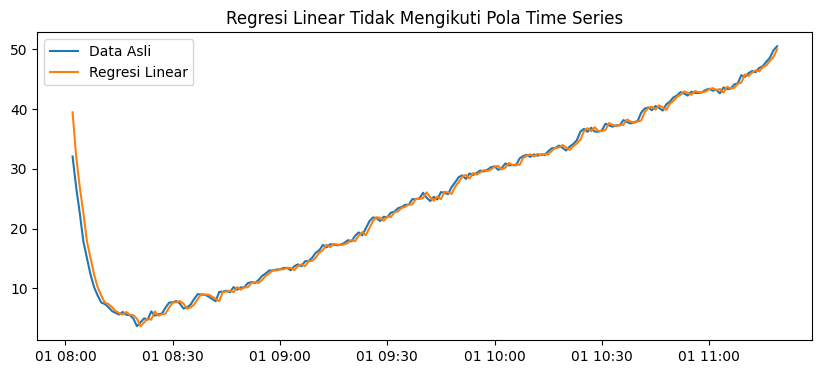

In [ ]:
# Plot Prediksi Regresi vs Data Asli (Regresi Gagal)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(df.index, df["Temperatur_Mesin"], label="Data Asli")
plt.plot(df.index, df["Pred_LR"], label="Regresi Linear")
plt.legend()
plt.title("Regresi Linear Tidak Mengikuti Pola Time Series")
plt.show()

# Interpretasi Grafik:
# Regresi menghasilkan garis “datar mengikuti lag”, tidak menangkap tren naik.
# Regresi akan terlambat mengikuti perubahan
# Regresi merata-rata sinyal, bukan memodelkan dinamika waktu.

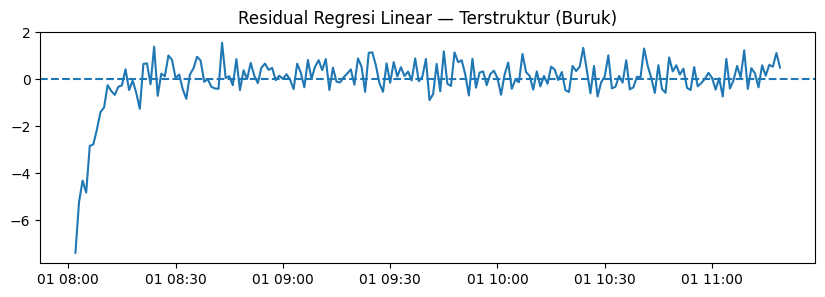

In [ ]:
# Residual Regresi — Tidak Acak (Bukti Regresi Jelek)

df["Residual_LR"] = df["Temperatur_Mesin"] - df["Pred_LR"]

plt.figure(figsize=(10,3))
plt.plot(df.index, df["Residual_LR"])
plt.axhline(0, linestyle="--")
plt.title("Residual Regresi Linear — Terstruktur (Buruk)")
plt.show()

# Interpretasi Residual:
# Residual mengikuti pola WAVE yang besar → terstruktur.
# Tidak random → model belum menangkap pola time series.
# Ini bukti regresi linear gagal.

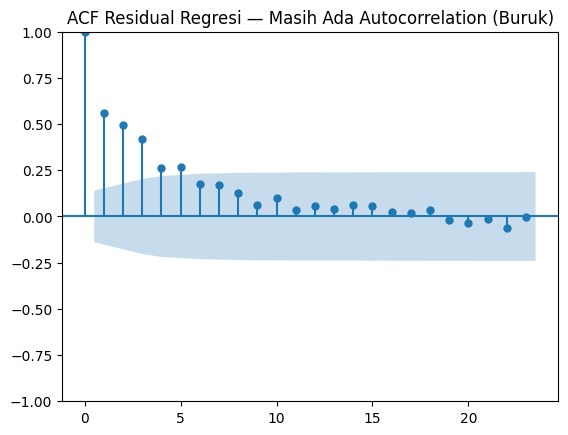

In [ ]:
# ACF Residual (Bukti Regresi Salah Total)

from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df["Residual_LR"])
plt.title("ACF Residual Regresi — Masih Ada Autocorrelation (Buruk)")
plt.show()

# Interpretasi:
# Banyak lag signifikan → residual tidak random.
# Berarti regresi linear belum mempelajari autokorelasi.
# ARIMA/AR model semestinya menghapus pola ini.

In [ ]:
# Fit Model AR(1) untuk Pembanding

from statsmodels.tsa.ar_model import AutoReg

ar_model = AutoReg(df["Temperatur_Mesin"], lags=1).fit()
df["Pred_AR"] = ar_model.predict(start=df.index[0], end=df.index[-1])

# Penjelasan
# AR model native time series:
# dia memang mengestimasi lag dependence
# tidak peduli multikolinearitas
# residual-nya nanti lebih random

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency min will be used.
  self._init_dates(dates, freq)


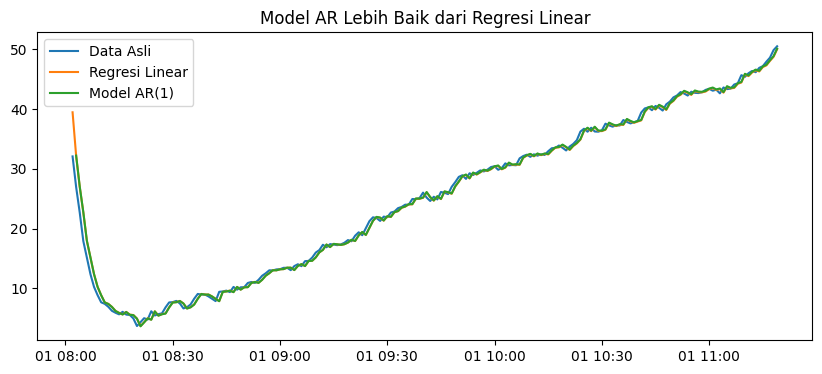

In [ ]:
# Plot AR vs Linear Regression

plt.figure(figsize=(10,4))
plt.plot(df.index, df["Temperatur_Mesin"], label="Data Asli")
plt.plot(df.index, df["Pred_LR"], label="Regresi Linear")
plt.plot(df.index, df["Pred_AR"], label="Model AR(1)")
plt.legend()
plt.title("Model AR Lebih Baik dari Regresi Linear")
plt.show()

# Interpretasi:
# mengikuti dinamika lebih baik
# tertinggal dan tidak tahu tren
# residual lebih random

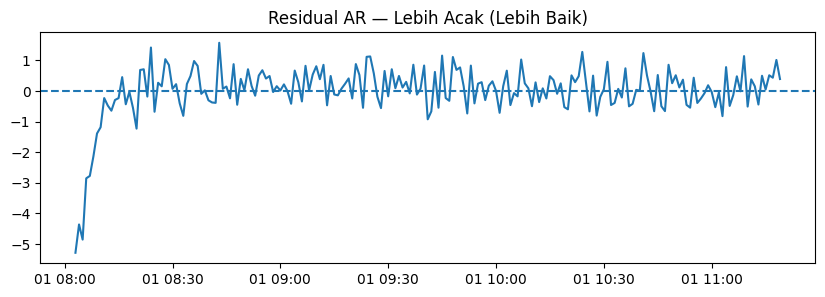

In [ ]:
# Residual AR (Bukti AR Lebih Baik)

df["Residual_AR"] = df["Temperatur_Mesin"] - df["Pred_AR"]

plt.figure(figsize=(10,3))
plt.plot(df.index, df["Residual_AR"])
plt.axhline(0, linestyle="--")
plt.title("Residual AR — Lebih Acak (Lebih Baik)")
plt.show()

# Interpretasi:
# Residual AR terlihat lebih acak & rapat.
# Model AR berhasil menyerap pola waktu.

In [ ]:
# AutoRegressive Model (AR)
# model AR(p) adalah model dasar time series yang intinya: nilai sekarang dipengaruhi nilai masa lalu
# Secara matematis:
# X_t = c + \phi_1 X_{t-1} + \phi_2 X_{t-2} + \cdots + \phi_p X_{t-p} + \epsilon_t
# Artinya:
# phi_1 = pengaruh nilai sebelumnya
# phi_2 = pengaruh nilai dua langkah sebelumnya
# dst.
# Intuisi manufaktur:
# Temperatur mesin jam ini dipengaruhi jam sebelumnya.
# Jumlah cacat shift ini dipengaruhi shift sebelumnya.
# Vibrasi bearing dipengaruhi getaran menit sebelumnya.
# Ciri-ciri model AR:
# Data stationary
# Ada autokorelasi kuat yang decay secara bertahap (ACF pelan menyusut)
# PACF cut-off setelah lag p

# Moving Average Model (MA)
# Model Moving Average MA(q) bukan moving average smoothing, ini Moving Average Error
# Formulanya:
# X_t = \mu + \epsilon_t + \theta_1 \epsilon_{t-1} + \cdots + \theta_q \epsilon_{t-q}
# Maknanya:
# θ1 = pengaruh error dari 1 waktu sebelumnya
# θq = pengaruh error dari q waktu sebelumnya
# Intuisi manufaktur:
# Noise sensor sekarang dipengaruhi noise sebelumnya.
# Fluktuasi kualitas dipengaruhi “kejutan acak” sebelumnya.
# Mesin punya shock/impact yang hilang bertahap.
# Ciri-ciri model MA:
# Residual white noise
# ACF cut-off setelah lag q
# PACF decay pelan

# AutoRegressive Integrated Moving Average (ARIMA)
# AutoRegressive AR(p) + Integrated I(d) + Moving Average MA(q)
# digunakan ketika data tidak stastioner (ada trend dan drift)
# Komponen:
# AR(p) → pengaruh masa lalu
# I(d) → differencing sebanyak d kali
# MA(q) → shock/error masa lalu
# Model:
# ARIMA(p,d,q)
# Penjelasan:
# p = jumlah lag AR
# d = jumlah differencing agar stationary
# q = jumlah lag MA
# Intuisi manufaktur:
# Temperatur mesin naik trend → harus di-differencing
# Setelah stationary, AR dan MA mencari pola sisa
# Cocok untuk forecasting produksi, MLQ, MTTF, sensor mesin
# Kapan pakai ARIMA?
# Ada tren → pakai “I”
# Ada pola autokorelasi → p
# Ada pola shock/error → q

In [ ]:
# Membuat Dataset Time Series Suhu Mesin

import numpy as np
import pandas as pd

np.random.seed(42)

# waktu 600 jam
waktu = pd.date_range("2025-01-01 00:00", periods=600, freq="H")

# suhu = base + trend + seasonality + noise
trend = np.linspace(0, 8, 600)
season = 3 * np.sin(2 * np.pi * waktu.hour / 24)
noise = np.random.normal(0, 1.5, 600)

temperatur = 60 + trend + season + noise

df = pd.DataFrame({
    "Waktu": waktu,
    "Temperatur_Mesin_C": temperatur
}).set_index("Waktu")

df.head()

# Penjelasan
# Trend: mesin makin panas perlahan
# Seasonality: pola harian naik–turun
# Noise: variasi sensor

/tmp/ipython-input-1040391142.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  waktu = pd.date_range("2025-01-01 00:00", periods=600, freq="H")


Temperatur_Mesin_C
Waktu                                  
2025-01-01 00:00:00           60.745071
2025-01-01 01:00:00           60.582416
2025-01-01 02:00:00           62.498244
2025-01-01 03:00:00           64.445932
2025-01-01 04:00:00           62.300269

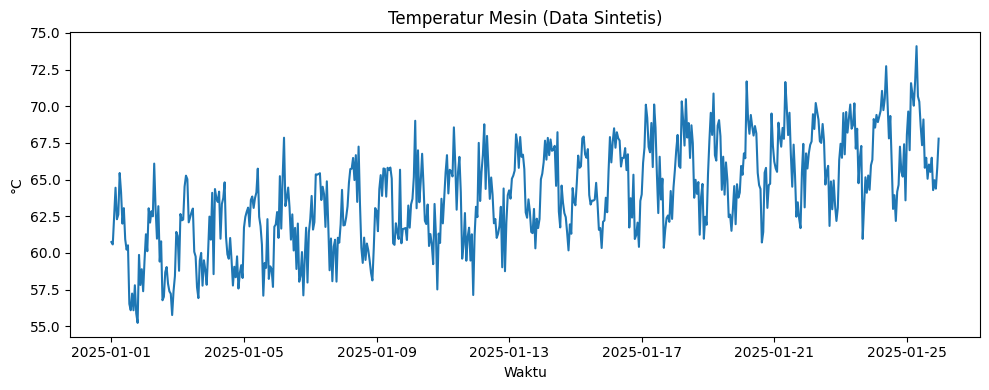

In [ ]:
# Plot Data Asli

import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(df.index, df["Temperatur_Mesin_C"])
plt.title("Temperatur Mesin (Data Sintetis)")
plt.xlabel("Waktu")
plt.ylabel("°C")
plt.tight_layout()
plt.show()

# Interpretasi
# Terlihat pola naik perlahan + fluktuasi harian.

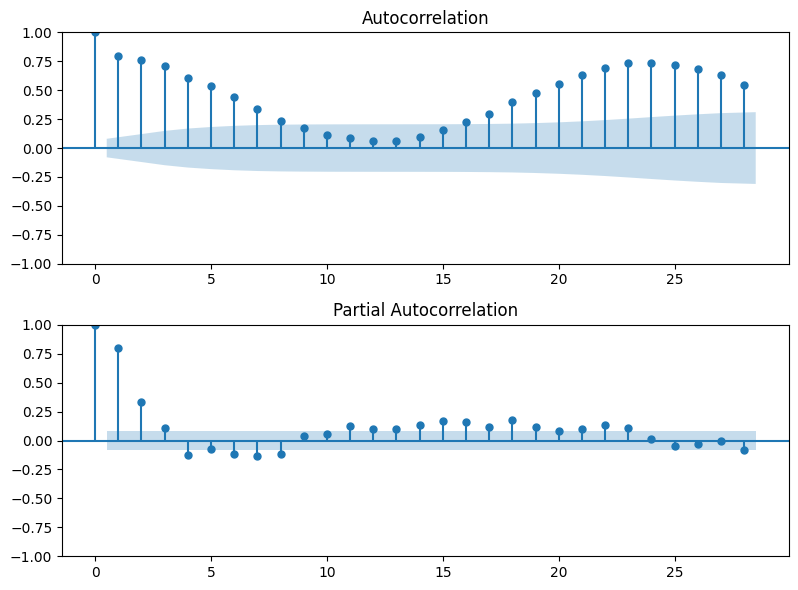

In [ ]:
# Plot ACF & PACF untuk Menentukan p dan q

import statsmodels.api as sm

fig, ax = plt.subplots(2,1,figsize=(8,6))
sm.graphics.tsa.plot_acf(df["Temperatur_Mesin_C"], ax=ax[0])
sm.graphics.tsa.plot_pacf(df["Temperatur_Mesin_C"], ax=ax[1])
plt.tight_layout()
plt.show()

# Interpretasi
# PACF signifikan sampai lag 2–3 → cocok untuk AR(3)
# ACF signifikan beberapa lag → MA(3) wajar dicoba
# Trend masih ada → ARIMA butuh differencing (d=1)

In [ ]:
# Fit Model Autoregressive — AR(3)

from statsmodels.tsa.ar_model import AutoReg

model_ar = AutoReg(df["Temperatur_Mesin_C"], lags=3).fit()
df["Pred_AR"] = model_ar.predict(start=500, end=599)

print(model_ar.summary())

# Interpretasi
# AR(3) akan belajar:
# suhu[ t ] tergantung suhu[ t-1 ], [ t-2 ], [ t-3 ]
# menangkap inertia termal mesin
# temperatur mesin C.L1 punya skor coef 0.49, berarti Lag1(L1) sangat dominan -> memory pendek
# terlihat P>|z| konstanta(semua kolom) yaitu p-value < alpha = 0.000<0.05 berarti model ini signifikan
# terlihat L1 L2 L3 juga p value < 0.05, maka semua fitur lag signifikan
# di bagian confidence interval[0.025 - 0.975] menyatakan semakin lebar model semakin tidak yakin, semakin sempit model semakin yakin
# contoh L1 CInya 0.413 - 0.573, artinya model 95% yakin(0.975-0.025=0.95->95%) trend berada di antara nilai 4.405 dan 0.573

                            AutoReg Model Results                             
Dep. Variable:     Temperatur_Mesin_C   No. Observations:                  600
Model:                     AutoReg(3)   Log Likelihood               -1232.037
Method:               Conditional MLE   S.D. of innovations              1.906
Date:                Fri, 28 Nov 2025   AIC                           2474.075
Time:                        10:11:05   BIC                           2496.034
Sample:                    01-01-2025   HQIC                          2482.625
                         - 01-25-2025                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     7.5138      1.586      4.737      0.000       4.405      10.623
Temperatur_Mesin_C.L1     0.4929      0.041     12.099      0.000       0.413       0.573
Temperat

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


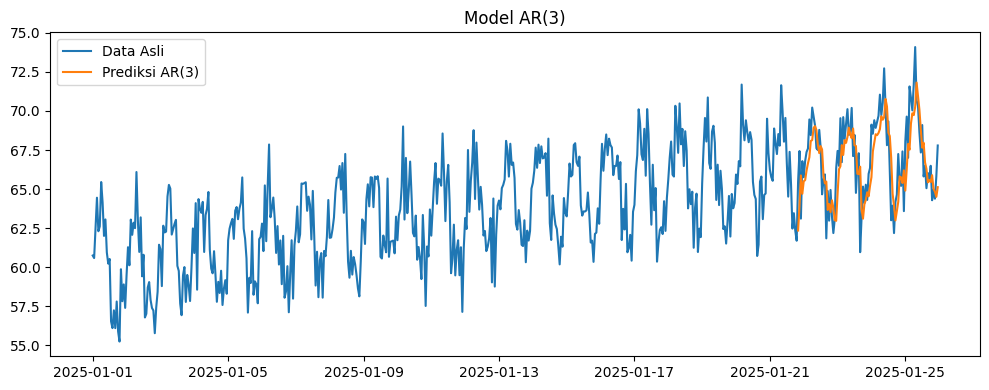

In [ ]:
# Plot Prediksi AR(3)

plt.figure(figsize=(10,4))
plt.plot(df.index, df["Temperatur_Mesin_C"], label="Data Asli")
plt.plot(df.index, df["Pred_AR"], label="Prediksi AR(3)")
plt.legend()
plt.title("Model AR(3)")
plt.tight_layout()
plt.show()

# Interpretasi grafik
# AR cukup responsif mengikuti fluktuasi.

In [ ]:
# Fit Model Moving Average — MA(3)

from statsmodels.tsa.arima.model import ARIMA

model_ma = ARIMA(df["Temperatur_Mesin_C"], order=(0,0,3)).fit()
df["Pred_MA"] = model_ma.predict(start=500, end=599)

print(model_ma.summary())

# Interpretasi
# MA mempelajari error masa lalu, bukan nilai masa lalu.
# MA negatif -> koreksi shock, artinya shock positif(titik plot naik drastis), menyebabkan nilai sekarang ke arah berlawanan, jadi model meredam shock dengan cara mengurangi nilai hari ini sebagai kompensasi
# MA positif -> kebalikan dari MA negatif
# sigma2 = 4.5 -> semakin kecil maka model semakin baik
# ljungbox p value = 6, jadi model baik karena p value > alpha
# MA.L1 positif -> error 1 periode lalu memberikan koreksi besar ke arah positif
# MA.L1 negatif -> error 1 periode lalu memberikan koreksi besar ke arah negatif
# MA.L2 positif -> error 2 periode lalu memberikan koreksi besar ke arah positif
# MA.L3 negatif -> error 3 periode lalu memberikan koreksi besar ke arah negatif

# MA.L1 negatif p value 0, maka error 1 periode lalu memberikan koreksi besar ke arah positif signifikan
# dan seterusnya

# MA.L2 = 0.5 dan CI[0.45 - 0.61]. artinya model 95% yakin bahwa nilai MA.l2 berada pada 0.45 dan 0.61
# jika CI melewati "0" maka kemungkinan tidak signifikan, contoh [-0.5 - 0.5] -> berada di antara 0 maka tidak berguna

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:     Temperatur_Mesin_C   No. Observations:                  600
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -1307.549
Date:                Fri, 28 Nov 2025   AIC                           2625.097
Time:                        10:13:47   BIC                           2647.082
Sample:                    01-01-2025   HQIC                          2633.655
                         - 01-25-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         63.9793      0.224    285.729      0.000      63.540      64.418
ma.L1          0.5895      0.038     15.496      0.000       0.515       0.664
ma.L2          0.5349      0.041     13.134      0.0

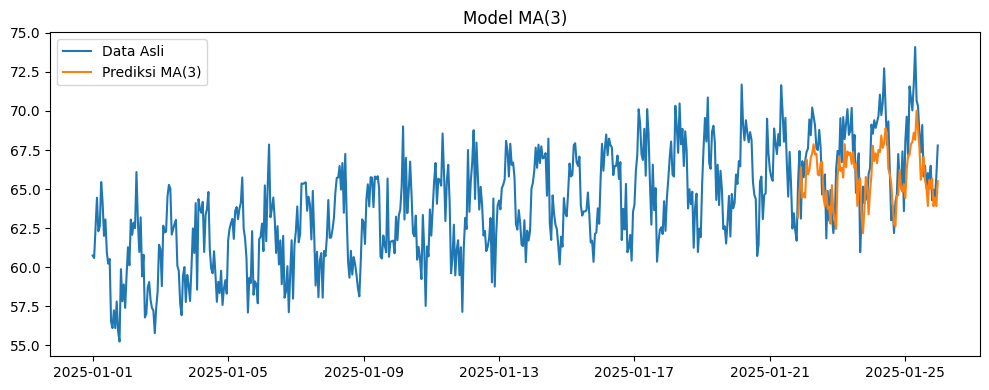

In [ ]:
# Plot Prediksi MA(3)

plt.figure(figsize=(10,4))
plt.plot(df.index, df["Temperatur_Mesin_C"], label="Data Asli")
plt.plot(df.index, df["Pred_MA"], label="Prediksi MA(3)")
plt.legend()
plt.title("Model MA(3)")
plt.tight_layout()
plt.show()

# Interpretasi
# MA lebih “smooth” dan sering terlambat mengikuti pola.

In [ ]:
# Fit Model ARIMA — ARIMA(3,1,3)

model_arima = ARIMA(df["Temperatur_Mesin_C"], order=(3,1,3)).fit()
forecast_arima = model_arima.predict(start=550, end=650)

print(model_arima.summary())

# Interpretasi
# d=1 → menghilangkan trend
# AR + MA digabung → fleksibel
# MA positif -> kalau nilai kemarin naik, maka nilai hari ini naik
# MA negatif -> kalau nilai kemarin naik, maka nilai hari ini turun

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:     Temperatur_Mesin_C   No. Observations:                  600
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -1239.618
Date:                Fri, 28 Nov 2025   AIC                           2493.236
Time:                        10:15:33   BIC                           2524.003
Sample:                    01-01-2025   HQIC                          2505.214
                         - 01-25-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1616      0.201     -0.803      0.422      -0.556       0.233
ar.L2          0.4955      0.179      2.772      0.006       0.145       0.846
ar.L3         -0.0883      0.100     -0.880      0.3

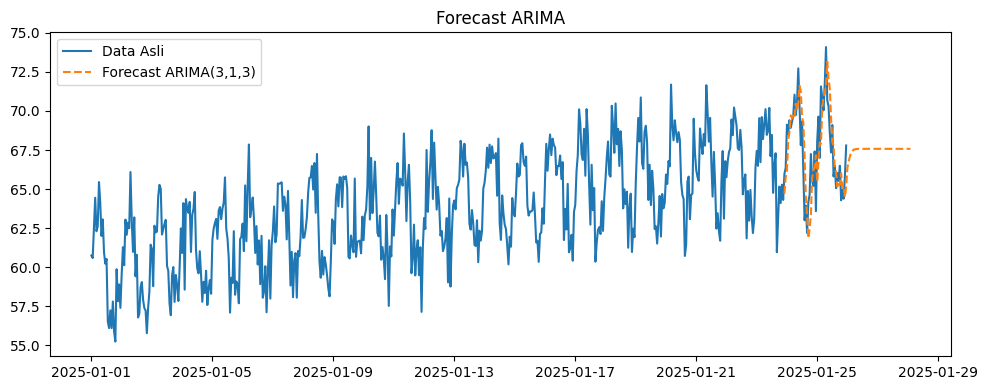

In [ ]:
# Plot Forecast ARIMA(3,1,3)

plt.figure(figsize=(10,4))
plt.plot(df.index, df["Temperatur_Mesin_C"], label="Data Asli")
plt.plot(forecast_arima, label="Forecast ARIMA(3,1,3)", linestyle="--")
plt.legend()
plt.title("Forecast ARIMA")
plt.tight_layout()
plt.show()

# Interpretasi
# ARIMA menghasilkan forecast yang lebih stabil dan masuk akal.

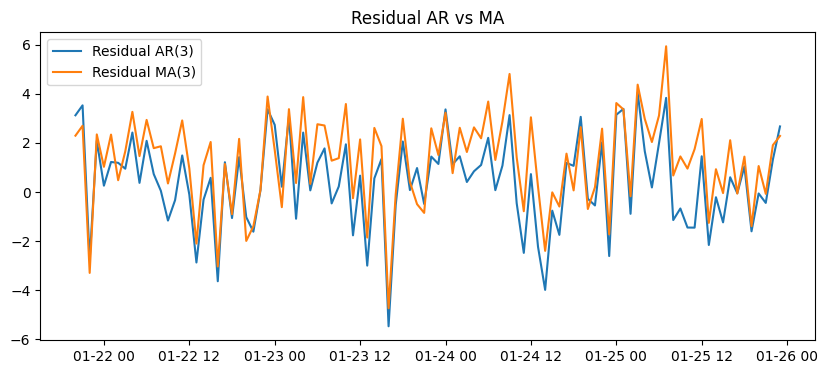

In [ ]:
# Residual Check (AR vs MA vs ARIMA)

df["Res_AR"] = df["Temperatur_Mesin_C"] - df["Pred_AR"]
df["Res_MA"] = df["Temperatur_Mesin_C"] - df["Pred_MA"]

plt.figure(figsize=(10,4))
plt.plot(df["Res_AR"], label="Residual AR(3)")
plt.plot(df["Res_MA"], label="Residual MA(3)")
plt.legend()
plt.title("Residual AR vs MA")
plt.show()

# Interpretasi
# Residual AR lebih acak → model lebih sehat.

In [ ]:
# Seasonal ARIMA
# SARIMA = ARIMA + komponen musiman (seas)
# ARIMA(p,d,q)(P,D,Q)s
# p,d,q = komponen non-musiman
# P,D,Q = komponen musiman
# s = periode musiman (jika pola musiman setiap 24 jam maka s = 24)
# ARIMA hanya menangani: tren, noise, moving average, autoregressive
# SARIMA menangani 2 lapis: pola jangka pendek (hari ke hari), dan pola musiman per periode tertentu
# kapan pakai SARIMA? kalau ACF/PACF ada spike berulang kelipatan s

# Auto-ARIMA
# Auto-ARIMA = pemilihan (p,d,q)(P,D,Q) otomatis menggunakan AIC/BIC
# model otomatis memilih AIC terkecl
# jadi tidak perlu trial and error manual

# VectorAutoRegression (VAR)
# VAR cocok untuk time series lebih dari 1 variabel yang saling mempengaruhi
# seperti: temperatur mesin - getaran mesin, output produksi - downtime, tingkat cacat - tekanan mesin
# VAR mempelajari hubungan variabel secara simultan
# VAR adalah Model multivariat yang memprediksi:
# X_t = f(X_{t-1},X_{t-2},...,Y_{t-1},Y_{t-2},...)
# Misalnya:
# Temperatur dipengaruhi:
# temperatur sebelumnya
# vibrasi sebelumnya
# Vibrasi dipengaruhi:
# vibrasi sebelumnya
# temperatur sebelumnya
# Kapan VAR diperlukan?
# Jika:
# Dua sensor saling memengaruhi
# Dua KPI pabrik saling terkait
# Ada hubungan feedback antar variabel
# Contoh:
# Mesin bergetar → suhu naik
# Suhu naik → getaran meningkat
# Getaran meningkat → pola cacat berubah
# Syarat VAR
# Semua variabel harus stationary
# Tidak boleh terlalu beda skala (normalisasi opsional)
# Gunakan lag order selection (AIC/BIC) untuk tentukan lag optimal
# Output yang kamu dapatkan dari VAR
# Koefisien VAR
# Impulse Response Function (IRF) → efek guncangan 1 variabel ke variabel lain
# Forecast error variance decomposition
# Forecast multi-step variabel multivariat

In [ ]:
# Dataset Sintetis (Temperatur + Vibrasi Mesin)

# ========================================================

import numpy as np
import pandas as pd

np.random.seed(123)

# 1000 jam
waktu = pd.date_range("2025-01-01 00:00", periods=1000, freq="H")

# suhu mesin = trend + musiman harian + noise
trend = np.linspace(0, 5, 1000)
season = 2.5 * np.sin(2 * np.pi * waktu.hour / 24)  # musiman harian
noise = np.random.normal(0, 0.8, 1000)
temperatur = 60 + trend + season + noise

# vibrasi mesin = dipengaruhi suhu + noise
vibrasi = 0.05 * temperatur + np.random.normal(0, 0.2, 1000)

df = pd.DataFrame({
    "Waktu": waktu,
    "Temperatur_Mesin_C": temperatur,
    "Vibrasi_Mesin_mm": vibrasi
}).set_index("Waktu")

df.head()

# Penjelasan
# Ada musim harian (s=24) → cocok untuk SARIMA
# Vibrasi terkait suhu → cocok untuk VAR

/tmp/ipython-input-3707182393.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  waktu = pd.date_range("2025-01-01 00:00", periods=1000, freq="H")


Temperatur_Mesin_C  Vibrasi_Mesin_mm
Waktu                                                    
2025-01-01 00:00:00           59.131496          2.806809
2025-01-01 01:00:00           61.449929          3.186015
2025-01-01 02:00:00           61.486393          3.217950
2025-01-01 03:00:00           60.577746          2.829011
2025-01-01 04:00:00           61.722203          3.181090

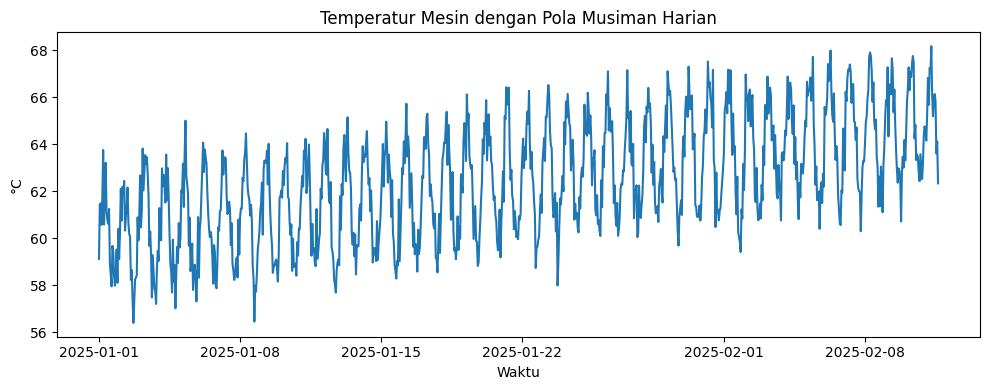

In [ ]:
# Plot Pola Musiman (untuk SARIMA)

# ========================================================

import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(df["Temperatur_Mesin_C"])
plt.title("Temperatur Mesin dengan Pola Musiman Harian")
plt.xlabel("Waktu")
plt.ylabel("°C")
plt.tight_layout()
plt.show()

# Pola naik-turun harian terlihat jelas → cocok SARIMA.

In [ ]:
# SARIMA (p,d,q)(P,D,Q)s = (1,1,1)(1,1,1)24

# ========================================================

import statsmodels.api as sm

model_sarima = sm.tsa.statespace.SARIMAX(
    df["Temperatur_Mesin_C"],
    order=(1,1,1),
    seasonal_order=(1,1,1,24)
).fit()

print(model_sarima.summary())

# Penjelasan:
# order=(1,1,1) → ARIMA non-musiman
# seasonal_order=(1,1,1,24) → musiman harian
# 24 jam = 1 hari

# MA.S.L1 positif -> error 1 seasonal lalu memberikan koreksi besar ke arah positif
# MA.S.L1 negatif -> error 1 seasonal lalu memberikan koreksi besar ke arah negatif

# MA positif -> kalau nilai seasonal kemarin naik, maka nilai hari ini naik
# MA negatif -> kalau nilai seasonal kemarin naik, maka nilai hari ini turun

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                 Temperatur_Mesin_C   No. Observations:                 1000
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood               -1222.522
Date:                            Fri, 28 Nov 2025   AIC                           2455.044
Time:                                    10:53:06   BIC                           2479.456
Sample:                                01-01-2025   HQIC                          2464.333
                                     - 02-11-2025                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0234      0.033      0.715      0.475      -0.041       0.088
ma.L1         -0.9937      0.006   

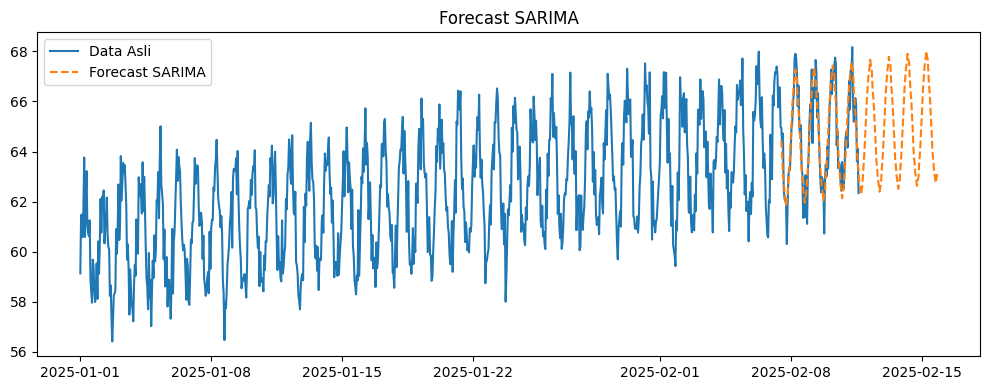

In [ ]:
# Forecast SARIMA

forecast_sarima = model_sarima.predict(start=900, end=1100)

plt.figure(figsize=(10,4))
plt.plot(df["Temperatur_Mesin_C"], label="Data Asli")
plt.plot(forecast_sarima, label="Forecast SARIMA", linestyle="--")
plt.legend()
plt.title("Forecast SARIMA")
plt.tight_layout()
plt.show()

# Interpretasi:
# SARIMA mengikuti pola musiman dengan baik dan memproyeksikan pola harian.

In [ ]:
!pip install pmdarima -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 17.3 MB/s eta 0:00:00


In [ ]:
# AUTO ARIMA (pemilihan otomatis p,d,q,P,D,Q)

# ========================================================

from pmdarima import auto_arima

model_auto = auto_arima(
    df["Temperatur_Mesin_C"],
    seasonal=True,
    m=24,                         # seasonal period
    trace=True,
    error_action="ignore",
    suppress_warnings=True
)

print(model_auto.summary())

# Penjelasan
# Auto-ARIMA secara otomatis akan memilih kombinasi terbaik berdasarkan AIC.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[24] intercept   : AIC=inf, Time=33.45 sec
 ARIMA(0,1,0)(0,0,0)[24] intercept   : AIC=3224.621, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[24] intercept   : AIC=3085.648, Time=2.10 sec
 ARIMA(0,1,1)(0,0,1)[24] intercept   : AIC=3118.079, Time=1.65 sec
 ARIMA(0,1,0)(0,0,0)[24]             : AIC=3222.628, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[24] intercept   : AIC=3151.672, Time=0.12 sec
 ARIMA(1,1,0)(2,0,0)[24] intercept   : AIC=3028.300, Time=5.36 sec
 ARIMA(1,1,0)(2,0,1)[24] intercept   : AIC=inf, Time=68.39 sec
 ARIMA(1,1,0)(1,0,1)[24] intercept   : AIC=inf, Time=11.27 sec
 ARIMA(0,1,0)(2,0,0)[24] intercept   : AIC=3188.504, Time=4.45 sec
 ARIMA(2,1,0)(2,0,0)[24] intercept   : AIC=2968.830, Time=9.18 sec
 ARIMA(2,1,0)(1,0,0)[24] intercept   : AIC=3067.963, Time=2.10 sec
 ARIMA(2,1,0)(2,0,1)[24] intercept   : AIC=inf, Time=54.64 sec
 ARIMA(2,1,0)(1,0,1)[24] intercept   : AIC=inf, Time=12.70 sec
 ARIMA(3,1,0)(2,0,0)[24] intercept   : 

/tmp/ipython-input-3144756032.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  plt.plot(pd.date_range(df.index[-1], periods=200, freq="H"), forecast_auto,


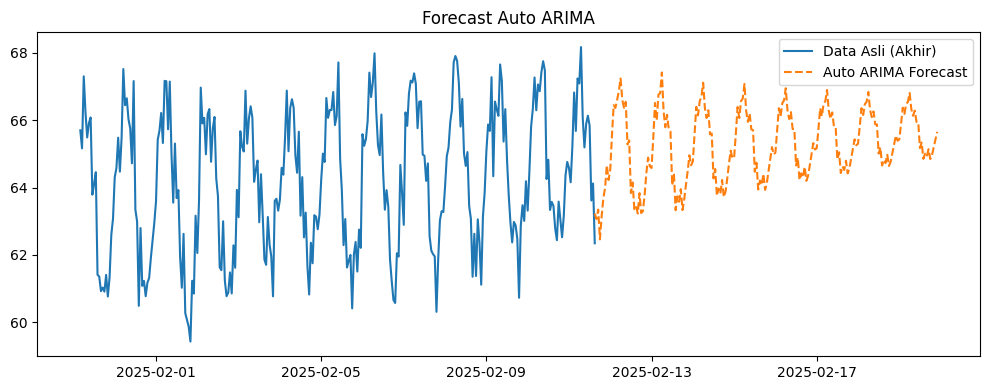

In [ ]:
# Forecast Auto ARIMA

forecast_auto = model_auto.predict(n_periods=200)

plt.figure(figsize=(10,4))
plt.plot(df["Temperatur_Mesin_C"].iloc[-300:], label="Data Asli (Akhir)")
plt.plot(pd.date_range(df.index[-1], periods=200, freq="H"), forecast_auto,
         label="Auto ARIMA Forecast", linestyle="--")
plt.legend()
plt.title("Forecast Auto ARIMA")
plt.tight_layout()
plt.show()

# Interpretasi
# Model otomatis menghasilkan forecast dengan musiman dan trend.

In [ ]:
from statsmodels.stats.stattools import jarque_bera

jb_stats = jarque_bera(model.resid)
print(jb_stats)

# JB statistic = 12.34
# p-value = 0.015

# pvalue < 0.05 residual tidak normal
# pvalue > 0.05 residual normal,model baik

In [ ]:
# VAR — Vector Autoregression (Temperatur & Vibrasi)

# ========================================================

from statsmodels.tsa.api import VAR

# membuat data stationary dengan differencing
df_diff = df.diff().dropna()

model_var = VAR(df_diff)
lag_order = model_var.select_order(maxlags=10)
print(lag_order.summary())

# Penjelasan
# VAR butuh data stationary → kita pakai differencing 1 kali.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -2.202      -2.192      0.1106      -2.199
1       -2.577      -2.547     0.07601      -2.566
2       -2.649      -2.599     0.07074      -2.630
3       -2.753      -2.683     0.06376      -2.726
4       -2.836      -2.746     0.05869      -2.802
5       -2.887      -2.778     0.05575      -2.845
6       -2.908      -2.779     0.05458      -2.859
7       -2.934      -2.785     0.05318      -2.878
8       -2.978      -2.809     0.05091      -2.914
9       -3.027      -2.839     0.04847      -2.955
10     -3.071*     -2.863*    0.04639*     -2.992*
--------------------------------------------------


In [ ]:
# Fit VAR (pakai lag terbaik)

p = lag_order.selected_orders['aic']

model_fitted = model_var.fit(p)
print(model_fitted.summary())

# Penjelasan
# VAR belajar hubungan silang antar sensor.

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 28, Nov, 2025
Time:                     11:30:15
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -2.86271
Nobs:                     989.000    HQIC:                  -2.99158
Log likelihood:          -1246.22    FPE:                  0.0463913
AIC:                     -3.07066    Det(Omega_mle):       0.0444822
--------------------------------------------------------------------
Results for equation Temperatur_Mesin_C
                            coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------
const                          0.004991         0.033560            0.149           0.882
L1.Temperatur_Mesin_C         -0.420331         0.032727          -12.844           0.000
L1.Vibrasi_

In [ ]:
# Forecast VAR

forecast_var = model_fitted.forecast(df_diff.values[-p:], steps=50)

forecast_df = pd.DataFrame(
    forecast_var,
    columns=["Temperatur_Mesin_C_diff_forecast", "Vibrasi_Mesin_mm_diff_forecast"]
)

forecast_df.head()

# Interpretasi
# Forecast berdasarkan model multivariat (VAR).
# Ini memperlihatkan bagaimana suhu memengaruhi vibrasi dan sebaliknya.

Temperatur_Mesin_C_diff_forecast  Vibrasi_Mesin_mm_diff_forecast
0                          0.569366                        0.031649
1                         -0.116862                       -0.025035
2                         -0.276285                        0.070782
3                         -0.344315                       -0.104575
4                          0.023106                        0.000604

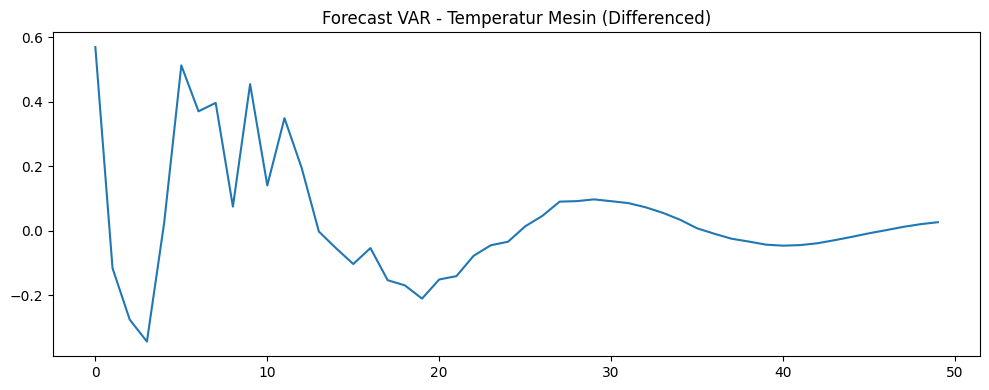

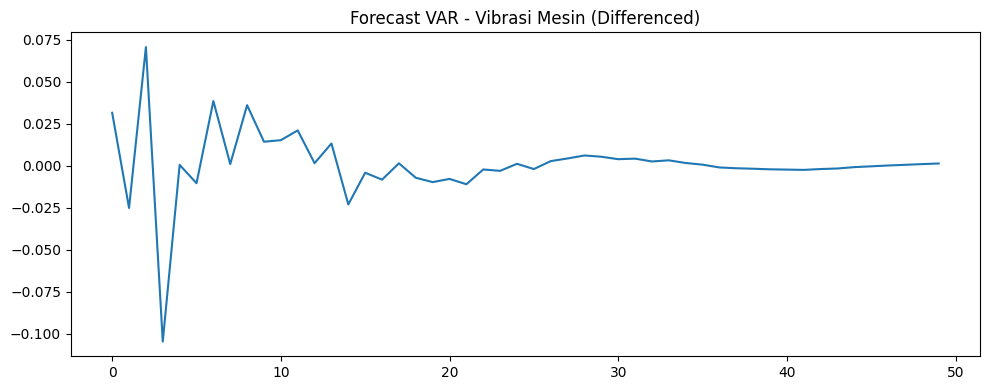

In [ ]:
# Plot VAR Forecast (Suhu & Vibrasi)

plt.figure(figsize=(10,4))
plt.plot(forecast_df["Temperatur_Mesin_C_diff_forecast"])
plt.title("Forecast VAR - Temperatur Mesin (Differenced)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,4))
plt.plot(forecast_df["Vibrasi_Mesin_mm_diff_forecast"])
plt.title("Forecast VAR - Vibrasi Mesin (Differenced)")
plt.tight_layout()
plt.show()

# Interpretasi:
# Ini adalah forecast perubahan suhu & vibrasi berdasarkan dinamika kedua sensor.

In [ ]:
# VAR Autocorrelation
from statsmodels.tsa.api import VAR

model = VAR(data)
results = model.fit(maxlags=2)

# LM Test for 1st order serial correlation
lm_test = results.test_serial_correlation(lags=1)
print(lm_test)

# misal output:
# H0: No serial correlation
# LM statistic: 12.5
# p-value: 0.032
# p value > 0.05 -> tidak ada autokorelasi -> bagus
# jika p value < 0.05 disarankan menambah lag

In [ ]:
# Check eigenvalues
print(results.roots)

# Check if model is stable
print("Is model stable? ", results.is_stable(verbose=True))

# misal output
# [0.55, 0.72, 0.88]
# maka model stabil karena semua nilai < 1

In [ ]:
normality_test = results.test_normality()
print(normality_test)

# jika p value > 0.05 maka residual multivariat normal

In [ ]:
# Variabel Eksogen
# time series dipengaruhi oleh variabel eksternal
# contoh: cacat produksi dipengaruhi oleh getaran, pemintaan dipengaruhi oleh politik
# model yang bisa menghadapi variabel eksogen seperti SARIMAX, ARIMAX, dan VARMAX

# ARCH, GARCH, dan Many Brethren
# model untuk kasus keuangan, tapi bisa juga cocok untuk manufaktur
# karena model ini bisa menghadapi: varians berubah-ubah, ada shock/sentakan mekanik, dan noise tidak konstan(heteroskedastik)
#
# AutoRegressive Conditional Heteroskedasticity (ARCH)
# digunakan saat variasi error berubah-ubah(volatilitas tidak konstan)
# \sigma_t^2 = \alpha_0 + \alpha_1 \epsilon_{t-1}^2
# jika error besar -> varian dimasa depan ikut membesar
#
# Generalized ARCH (GARCH)
# lebih fleksibel
# \sigma_t^2 = \alpha_0 + \alpha_1 \epsilon_{t-1}^2 + \beta_1\sigma_{t-1}^2
# dalam manufaktur, getaran tinggi -> memicu getaran berikutnya
#
# turunan lainnya brethren:
# EGARCH -> bisa menangkap efek asimetri
# GJR-GARCH -> respon berbeda terhadap shock naik/turun
# ARCH-in-Mean -> volatilias mempengaruhi means
# Multivariate GARCH -> multivariabel

# Prophet
# model dari facebook ini digunakan untuk: seasonality kuat(harian/mingguan/bulanan), trend jangka panjang, libur/kejadian khusus, data rusak banyak missing, dan automasi forecasting
# y(t) = g(t) + s(t) + h(t) + \epsilon_t
# dimana:
# g(t) -> trend piecewise linear
# s(t) -> seasonality(harian/mingguan/bulanan)
# h(t) -> holiday/event
# epsilon(t) -> error
# keunggulannya: tidak perlu ACF/PACF, mampu menghadapi multiseasonality, dan mampu menangani data messy

# Hieratical Time Series Model (HTS)
# HTS cocok digunakan untuk:
# produksi berdasarkan pabrik->line->mesin
# tingkat cacat berdasarkan plant->department->shift
# intinya dari kategori ke sub kategori ke subsub kategori ("HIRARKI")
# tanpa HTS prediksi bisa:
# tidak konsisten
# total ≠ sum of parts
# prediksi masing-masing berubah arah
# dengan HTS:
# error kecil, forecast reconciled, error lebih kecil
# metode populer HTS:
# top down: forecast total -> dibagi ke bawah
# bottom up: forecast level mesin -> dibagi ke atas
# middle out: forecast level menengah -> propagate naik dan turun
# optimal reconciliation: (THIEF, MinT, HyndMan Method) -> menggabungkan semua forecast sambil meminimalkan error

In [ ]:
# Membuat Dataset Suhu + RPM

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

waktu = pd.date_range("2025-01-01", periods=500, freq="H")

rpm = 1500 + 200*np.sin(2*np.pi*waktu.hour/24) + np.random.normal(0,50,500)
temperatur = 60 + 0.02*rpm + 2*np.sin(2*np.pi*waktu.hour/24) + np.random.normal(0,1,500)

df = pd.DataFrame({
    "Waktu": waktu,
    "Temperatur_Mesin_C": temperatur,
    "RPM_Motor": rpm
}).set_index("Waktu")

df.head()

# Penjelasan
# Temperatur mesin dipengaruhi RPM → cocok untuk ARIMAX/SARIMAX.

/tmp/ipython-input-4250294750.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  waktu = pd.date_range("2025-01-01", periods=500, freq="H")


Temperatur_Mesin_C    RPM_Motor
Waktu                                               
2025-01-01 00:00:00           91.422892  1524.835708
2025-01-01 01:00:00           93.324067  1544.850594
2025-01-01 02:00:00           92.249121  1632.384427
2025-01-01 03:00:00           96.328640  1717.572849
2025-01-01 04:00:00           94.311356  1661.497412

In [ ]:
# SARIMAX (musiman + exogenous)

import statsmodels.api as sm

model_sarimax = sm.tsa.statespace.SARIMAX(
    df["Temperatur_Mesin_C"],
    order=(1,1,1),
    seasonal_order=(1,1,1,24),
    exog=df["RPM_Motor"]
).fit()

print(model_sarimax.summary())

# SARIMAX menangani musiman harian sekaligus input RPM.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                 Temperatur_Mesin_C   No. Observations:                  500
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood                -703.724
Date:                            Sat, 29 Nov 2025   AIC                           1419.448
Time:                                    05:15:05   BIC                           1444.428
Sample:                                01-01-2025   HQIC                          1429.271
                                     - 01-21-2025                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
RPM_Motor      0.0183      0.001     21.695      0.000       0.017       0.020
ar.L1         -0.0262      0.049   

/tmp/ipython-input-570691769.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_waktu = pd.date_range(df.index[-1] + pd.Timedelta(hours=1), periods=51, freq="H")


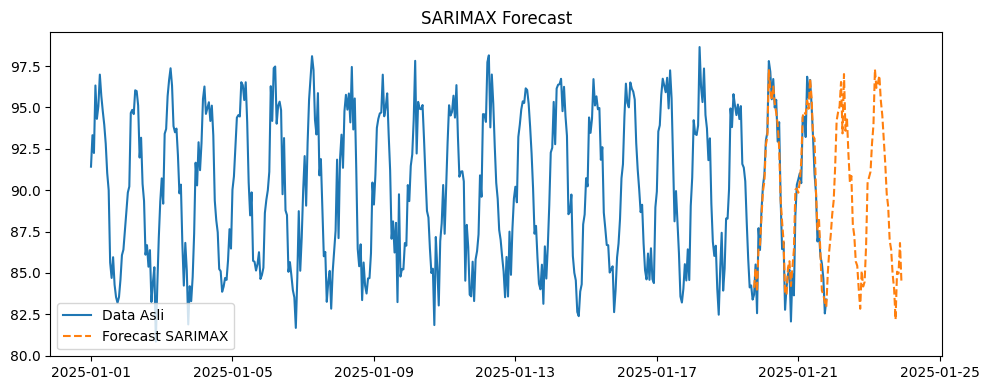

In [ ]:
# Forecast ARIMAX

# Generate future RPM values for out-of-sample prediction (51 periods: 500 to 550)
# The original df has 500 periods (index 0 to 499)
# We need 51 more periods for the forecast from index 500 to 550
future_waktu = pd.date_range(df.index[-1] + pd.Timedelta(hours=1), periods=51, freq="H")
future_rpm_noise = np.random.normal(0, 50, 51)
# Reusing the original RPM generation logic for future values
future_rpm_exog = 1500 + 200 * np.sin(2 * np.pi * future_waktu.hour / 24) + future_rpm_noise
future_rpm_series = pd.Series(future_rpm_exog, index=future_waktu)

# The predict method expects only the out-of-sample exogenous values, reshaped to (n_steps, 1)
# Here, n_steps is 51 (for indices 500 to 550)
exog_for_forecast = future_rpm_series.values.reshape(-1, 1)

# Now use this correctly shaped exog_for_forecast in the predict method
forecast = model_sarimax.predict(start=450, end=550, exog=exog_for_forecast)

plt.figure(figsize=(10,4))
plt.plot(df["Temperatur_Mesin_C"], label="Data Asli")
plt.plot(forecast, label="Forecast SARIMAX", linestyle="--")
plt.legend()
plt.title("SARIMAX Forecast")
plt.tight_layout()
plt.show()

In [ ]:
# Membuat Dataset Vibrasi (volatil)

np.random.seed(0)

time = pd.date_range("2025-01-01", periods=1000, freq="H")

# getaran mesin dengan shock periodik
vol = np.zeros(1000)
for t in range(1,1000):
    vol[t] = 0.3*vol[t-1] + np.random.normal(0,1)

df_garch = pd.DataFrame({
    "Waktu": time,
    "Vibrasi_Mesin_mm": vol
}).set_index("Waktu")

df_garch.head()

/tmp/ipython-input-3146756989.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time = pd.date_range("2025-01-01", periods=1000, freq="H")


Vibrasi_Mesin_mm
Waktu                                
2025-01-01 00:00:00          0.000000
2025-01-01 01:00:00          1.764052
2025-01-01 02:00:00          0.929373
2025-01-01 03:00:00          1.257550
2025-01-01 04:00:00          2.618158

In [ ]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.3/981.3 kB 32.0 MB/s eta 0:00:00


In [ ]:
# Fit ARCH(1)

from arch import arch_model

arch1 = arch_model(df_garch["Vibrasi_Mesin_mm"], vol="ARCH", p=1)
res_arch = arch1.fit()
print(res_arch.summary())

# interpretasi
# mean model (mu) -> jika p value > alpa(0.05), maka model mean tidak penting, yang penting model volatility

# volatility model (omega) -> harus positif agar model valid, omega besar = volatilitas dasar tinggi, jika rendah maka dasarnya juga rendah
# volatility model (alpha[1]) kecil -> maka model sangat sensitif terhadap error kemarin

Iteration:      1,   Func. Count:      5,   Neg. LLF: 12204.953640875356
Iteration:      2,   Func. Count:     12,   Neg. LLF: 1776.706192636927
Iteration:      3,   Func. Count:     19,   Neg. LLF: 1447.387548521169
Iteration:      4,   Func. Count:     24,   Neg. LLF: 1445.8784468085373
Iteration:      5,   Func. Count:     28,   Neg. LLF: 1445.8775698921354
Iteration:      6,   Func. Count:     32,   Neg. LLF: 1445.877564414658
Iteration:      7,   Func. Count:     35,   Neg. LLF: 1445.877564414453
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1445.877564414658
            Iterations: 7
            Function evaluations: 35
            Gradient evaluations: 7
                      Constant Mean - ARCH Model Results                      
Dep. Variable:       Vibrasi_Mesin_mm   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likel

In [ ]:
# Fit GARCH(1,1)

garch11 = arch_model(df_garch["Vibrasi_Mesin_mm"], vol="GARCH", p=1, q=1)
res_garch = garch11.fit()
print(res_garch.summary())

# GARCH(1,1) hampir selalu mengungguli ARCH.

Iteration:      1,   Func. Count:      6,   Neg. LLF: 22508412058.202904
Iteration:      2,   Func. Count:     14,   Neg. LLF: 3107.9967466934518
Iteration:      3,   Func. Count:     23,   Neg. LLF: 1504.8335536244886
Iteration:      4,   Func. Count:     29,   Neg. LLF: 1492.8829030020192
Iteration:      5,   Func. Count:     35,   Neg. LLF: 1482.8436402836358
Iteration:      6,   Func. Count:     41,   Neg. LLF: 1477.8574182679126
Iteration:      7,   Func. Count:     47,   Neg. LLF: 1515.8142451139183
Iteration:      8,   Func. Count:     53,   Neg. LLF: 1451.4516377387208
Iteration:      9,   Func. Count:     59,   Neg. LLF: 1445.4536651977755
Iteration:     10,   Func. Count:     64,   Neg. LLF: 1445.4555351519884
Iteration:     11,   Func. Count:     70,   Neg. LLF: 1445.466060615684
Iteration:     12,   Func. Count:     76,   Neg. LLF: 1445.4238760623286
Iteration:     13,   Func. Count:     81,   Neg. LLF: 1445.4238357195345
Iteration:     14,   Func. Count:     86,   Neg. LLF

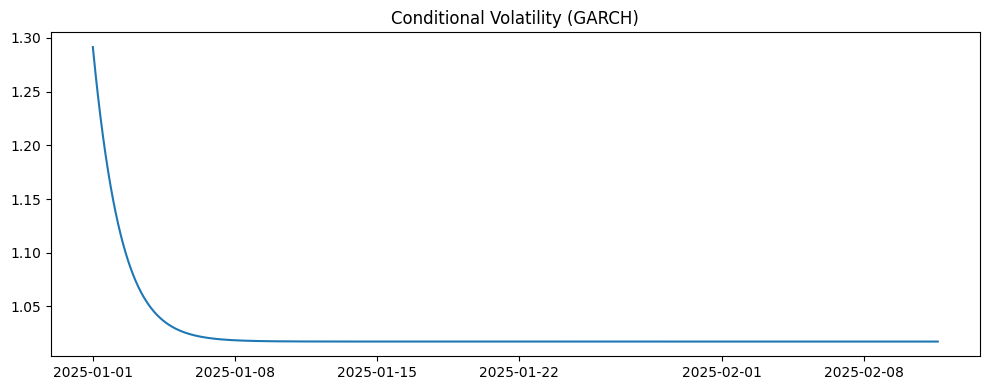

In [ ]:
# Plot Volatility

plt.figure(figsize=(10,4))
plt.plot(res_garch.conditional_volatility)
plt.title("Conditional Volatility (GARCH)")
plt.tight_layout()
plt.show()

In [ ]:
!pip install prophet

In [ ]:
# Dataset Produksi Harian

date = pd.date_range("2025-01-01", periods=365)
output = 500 + 20*np.sin(2*np.pi*date.dayofyear/365) + np.random.normal(0,10,365)

df_prophet = pd.DataFrame({
    "ds": date,
    "y": output
})
df_prophet.head()

ds           y
0 2025-01-01  496.763126
1 2025-01-02  506.248059
2 2025-01-03  509.957132
3 2025-01-04  497.152900
4 2025-01-05  502.766436

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


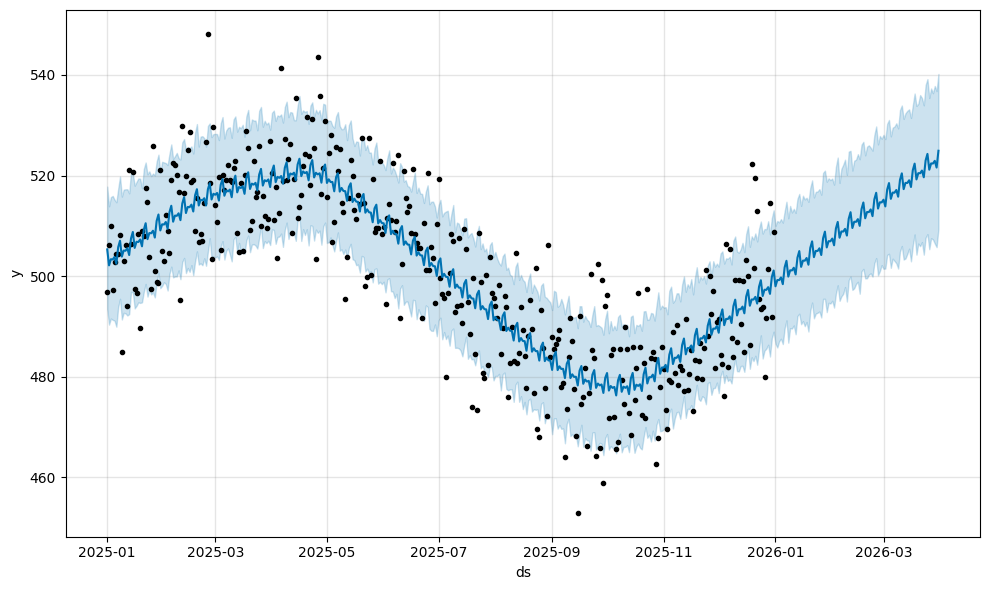

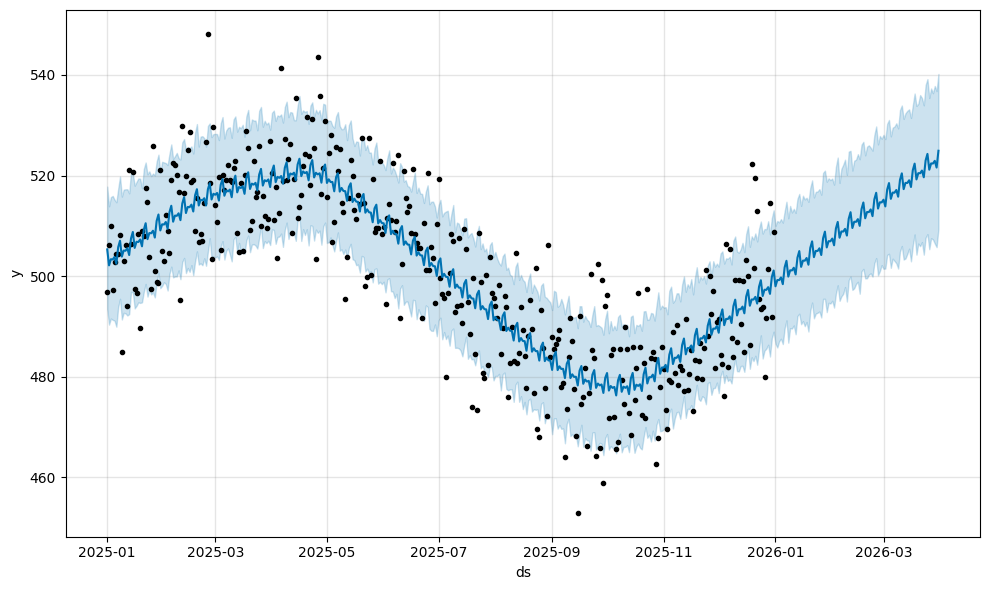

In [ ]:
# Fit Prophet

from prophet import Prophet

m = Prophet()
m.fit(df_prophet)


# Forecast 90 Hari

future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)

m.plot(forecast)

# Prophet otomatis menangani trend + seasonal.

In [ ]:
# Dataset HTS Buatan

import numpy as np
import pandas as pd

np.random.seed(42)

date = pd.date_range("2025-01-01", periods=200, freq="D")

# Level paling bawah (bottom nodes)
df = pd.DataFrame({
    "ds": date,
    "Mesin1": 100 + np.random.normal(0, 5, 200),
    "Mesin2": 120 + np.random.normal(0, 5, 200),
    "Mesin3": 130 + np.random.normal(0, 5, 200),
    "Mesin4": 110 + np.random.normal(0, 5, 200)
})

# Level menengah
df["LineA"] = df["Mesin1"] + df["Mesin2"]
df["LineB"] = df["Mesin3"] + df["Mesin4"]

# Level paling atas (root node)
df["Total"] = df["LineA"] + df["LineB"]

df.head()

ds      Mesin1      Mesin2      Mesin3      Mesin4       LineA  \
0 2025-01-01  102.483571  121.788937  122.027862  113.784943  224.272508   
1 2025-01-02   99.308678  122.803923  127.003125  105.389173  222.112601   
2 2025-01-03  103.238443  125.415256  130.026218  114.348030  228.653699   
3 2025-01-04  107.615149  125.269010  130.234903  116.778189  232.884160   
4 2025-01-05   98.829233  113.111653  127.749673  112.067175  211.940886   

        LineB       Total  
0  235.812805  460.085312  
1  232.392298  454.504899  
2  244.374248  473.027947  
3  247.013092  479.897252  
4  239.816847  451.757733

In [ ]:
!pip install hierarchicalforecast -q
!pip install statsforecast -q

In [ ]:
# definisi nodes

hierarchy = {
    "Total": ["LineA", "LineB"],
    "LineA": ["Mesin1", "Mesin2"],
    "LineB": ["Mesin3", "Mesin4"],
}
hierarchy

{'Total': ['LineA', 'LineB'],
 'LineA': ['Mesin1', 'Mesin2'],
 'LineB': ['Mesin3', 'Mesin4']}

In [ ]:
df_long = df.melt(id_vars=["ds"], var_name="unique_id", value_name="y")
df_long.head()

ds unique_id           y
0 2025-01-01    Mesin1  102.483571
1 2025-01-02    Mesin1   99.308678
2 2025-01-03    Mesin1  103.238443
3 2025-01-04    Mesin1  107.615149
4 2025-01-05    Mesin1   98.829233

In [ ]:
from hierarchicalforecast.utils import hierarchical_agg
from hierarchicalforecast.core import HierarchicalReconciliation
from hierarchicalforecast.methods import BottomUp
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA

# ================================
# 1. Buat Summing Matrix (S_df) dan tags
# ================================
S_df, tags = hierarchical_agg(hierarchy)

# ================================
# 2. Forecast dasar (bottom-level)
# ================================
H = 30  # horizon 30 hari

sf = StatsForecast(
    models=[AutoARIMA()],
    freq='D'
)

base_fcst = sf.forecast(
    df=df_long,
    h=H
)

# ================================
# 3. Inisialisasi Reconciler (Bottom-Up)
# ================================
reconciler = HierarchicalReconciliation(
    reconcilers=[BottomUp()]
)

# ================================
# 4. Jalankan reconciliation
# ================================
fcst_reconciled = reconciler.reconcile(
    Y_hat_df=base_fcst,
    S_df=S_df,
    tags=tags
)

# ================================
# 5. Lihat hasil
# ================================
fcst_reconciled.tail()

In [ ]:
import matplotlib.pyplot as plt

total_actual = df_long[df_long["unique_id"]=="Total"]["y"]

plt.figure(figsize=(10,4))
plt.plot(total_actual.values, label="Actual Total")
plt.plot(range(len(total_actual), len(total_actual)+H),
         forecasts[forecasts["unique_id"]=="Total"]["y"].values,
         label="Forecast Total", linestyle="--")
plt.legend()
plt.title("Hierarchical Forecast — Total Produksi")
plt.tight_layout()
plt.show()

In [ ]:
# State Space Models (SSM)
# SSM memodelkan sistem dinamis yang berubah dari waktu ke waktu melalui dua persamaan:
# persamaan transisi (state equation): x_t = F x_{t-1} + w_t
# persamaan observasi (measurement equation): y_t = H x_t + v_t
# dimana:
# x_t -> keadaan sebenarnya
# y_t -> pengukuran sensor
# w_t, v_t -> noise process & noise sensor
# contoh: kualitas produk sebenarnya kesalahan manusia, vibrasi tinggi ternyata akselerometer sedang error
# kelebihan:
# bisa menangani noise sensor
# bisa mengestimasi state tersembunyi -> misal: tingkat kerusakan aktual
# adaptif dan bagus untuk aplikasi realtime
# bisa digabung dengan control seperti PID dan MPC
# kelemahan:
# tidak mudah diinterpretasi seperti ARIMA
# kalibrasi parameter bisa rumit
# bisa konvergen bila kesalahan error besar
# implementasi kompleks

# Kalman Filter
# kalman filter adalah algoritma yang memperbarui estimasi state dengan menggabungkan 2 informasi(prediksi model, obervasi sensor)
# dan memberikan bobot terbaik berdasarkan varian noise
# formula dasarnya -> \hat{x}_t = \hat{x}_t^- + K_t(y_t - H\hat{x}_t^-)
# kalman gain -> K_t = \frac{P_t^- H^T}{HP_t^-H^T + R}
# contoh kasus:
# sensor temperatur mesin banyak noise -> naik turun tajam meskipun keadaan asli halus
# kalman filter dapat menghaluskan sinyal sensor, mendeteksi outlier, prediksi jangka pendek, memperkirakan temperatur sebenarnya
# kelebihan:
# optimal untuk noise gaussian
# cepat, cocok untuk real time
# cocok untuk data sensor mesin
# mampu tracking kondisi tersembunyi mesij
# kekurangan:
# hanya bekerja linear (extended/unscented kalman untuk nonlinear)
# harus tahu noise covariance (Q dan R)
# salah memodelan Q/R -> model salah besar

# Hidden Markov Model (HMM)
# hmm adalah model dimana:
# state sebenarnya tidak terlihat (hidden)
# observasi sensor adalah hasil dari state tersebut
# transisi antar hidden state mengikuti markov chain
# hidden state (x_i) -> observed output (y_i)
# contoh manufaktur:
# misal kondisi mesin punya 3 state:
# mesin 1=sehat
# mesin 2=aus
# mesin 3=rusak
# tetapi kita hanya bisa melihat:
# temperatur, vibrasi, dan tekanan
# hmm bisa:
# mendeteksi state mesin dari sensor
# memperkirakan probabilitas mesin berpindah state
# mendeteksi anomaly
# melakukan predictive maintenance
# kekurangannya adalah hanya bisa 1 step dan asumsi sederhana(gaussian)

# Bayesian Structural Time Series (BSTS)
# bayesian digunakan oleh google untuk forecasting internal
# bayesian memecah time series menjadi beberapa komponen:
# y_t = Trend_t + Season_t + Regression(X_t) + Noise_t
# tapi semua dilakukan dengan pendekatan bayesian, sehingga:
# ada uncertainty dalam setiap parameter
# forecast secara probabilistik
# bisa melakukan causal inference(bayesian causal impact)
# contoh:
# prediksi output jangka panjang
# causal analysis: apakah temperatur mesin tinggi menyebabkan cacat naik?
# membandingkan proses sebelum/sesudah perbaikan
# kekurangan: komputasi mahal, dan harus ada pemahaman bayesian

In [ ]:
# DATA SINTETIS (GETARAN MESIN)

# Mesin semakin aus → getaran meningkat sedikit demi sedikit → kadang ada noise besar → bisa menyebabkan keadaan “fault”.

import numpy as np
import pandas as pd

np.random.seed(42)

T = 200
time = np.arange(T)

level = np.zeros(T)
trend = np.zeros(T)

level[0] = 50
trend[0] = 0.05

sigma_level = 0.3
sigma_trend = 0.02
sigma_obs   = 0.8

for t in range(1, T):
    trend[t] = trend[t-1] + np.random.normal(0, sigma_trend)
    level[t] = level[t-1] + trend[t] + np.random.normal(0, sigma_level)

y = level + np.random.normal(0, sigma_obs, T)

data = pd.DataFrame({'t': time, 'vibration': y})

data.head()

t  vibration
0  0  49.908368
1  1  51.008708
2  2  49.272710
3  3  50.066716
4  4  50.880431

In [ ]:
# KALMAN FILTER (Local Linear Trend Model)

# Tujuan:
# Mengestimasi mendatar-tidaknya kondisi mesin (level) dan keausan (trend).

#Kode Kalman Filter

import numpy as np

F = np.array([[1, 1],
              [0, 1]])

H = np.array([[1, 0]])

Q = np.array([[sigma_level**2, 0],
              [0, sigma_trend**2]])

R = np.array([[sigma_obs**2]])

x_pred = np.array([[50.0], [0.1]])
P_pred = np.eye(2)

f_level = []
f_trend = []

for t in range(T):

    # UPDATE
    S = H @ P_pred @ H.T + R
    K = P_pred @ H.T @ np.linalg.inv(S)

    y_t = y[t]

    x_upd = x_pred + K @ (y_t - H @ x_pred)
    P_upd = (np.eye(2) - K @ H) @ P_pred

    f_level.append(x_upd[0,0])
    f_trend.append(x_upd[1,0])

    # PREDICT
    x_pred = F @ x_upd
    P_pred = F @ P_upd @ F.T + Q

kf_result = pd.DataFrame({
    "estimated_level": f_level,
    "estimated_trend": f_trend
})

print(kf_result.tail())


# Interpretasi Output & Decision Rule
# Output Kalman Filter:
# estimated_level → estimasi getaran sebenarnya (tanpa noise)
# estimated_trend → laju kenaikan getaran (indikasi wear rate)

# Decision rule (Quality & Reliability Engineering)
# 1. Jika trend > 0.2 → Wear berbahaya
# Artinya machine degradation meningkat cepat.
# Butuh preventive maintenance segera.
# 2. Jika level > 70 → Vibrasi terlalu tinggi
# Bisa menyebabkan kerusakan.
# 3. Jika trend terus naik 5 hari berturut-turut
# Trigger early warning.


# Contoh:

latest_trend = kf_result["estimated_trend"].iloc[-1]

if latest_trend > 0.2:
    print("WARNING: Wear rate tinggi → jadwalkan preventive maintenance.")
else:
    print("Wear rate normal.")

# interpretasi:
# estimated level
# kalau level semakin naik maka suhu meningkat terus(misal yang diforecast adalah suhu)
# kalau level turun maka suhu semakin turun
# kalau level steady maka suhu stabil

# estimated trend
# misal suhu yang diforecast
# sama saja seperti estimated level, tetapi ini hanya nilai trendnya

# wear rate(bisa diganti suhu kalau misal sedang forecast suhu)
# jika suhu = 0 maka proses normal
# jika negatif maka ada penurunan suhu
# jika positif suhu semakin naik

# kesimpulan: terlihat estim level dan tren naik terus berarti suhu naik terus tanpa penurunan -> bisa overheat

     estimated_level  estimated_trend
195        37.982415         0.044689
196        38.455563         0.069147
197        38.566239         0.071517
198        38.696991         0.074899
199        38.754497         0.073906
Wear rate normal.


In [ ]:
!pip install hmmlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 kB 10.5 MB/s eta 0:00:00


In [ ]:
# HIDDEN MARKOV MODEL (HMM)

# Tujuan:
# Mengklasifikasikan kondisi mesin ke 2 state: NORMAL & FAULTY.

from hmmlearn.hmm import GaussianHMM

Y = y.reshape(-1,1)

model = GaussianHMM(
    n_components=2,
    covariance_type="diag",
    n_iter=200,
    random_state=42
)

model.fit(Y)

hidden_states = model.predict(Y)

data["state"] = hidden_states

print("mean:",model.means_)        # mean vibrasi per state
print("≈=========≈")
print("peluang pindah state:",model.transmat_)     # peluang pindah state
print("≈=========≈")
print(data.tail())

# Interpretasi Output & Decision Rule

# Misal output mean:
# [[52.1],
# [69.8]]
# Artinya:
# State 0 → mean ≈ 52 → NORMAL
# State 1 → mean ≈ 70 → FAULT

# Decision rule:
# 1. Jika state_t == 1 → mesin dianggap FAULT.
# 2. Jika transisi NORMAL→FAULT > 0.20
# Artinya mesin sering masuk kondisi bermasalah.
# 3. Jika mesin bertahan dalam FAULT > 3 hari
# Tindakan maintenance wajib dilakukan.

#Contoh keputusan:

current_state = data["state"].iloc[-1]

print("≈=========≈")
print("≈=========≈")

if current_state == 1:
    print("FAULT detected: getaran tinggi → hentikan mesin & inspeksi.")
else:
    print("Mesin dalam kondisi NORMAL.")

# current state dari hidden state kita terjemahkan sendiri sesuai domain knowledge(mirip clustering)
# misal current state dapat 3 kelas yaitu 1,2, dan 3. maka anda terjemahkan sendiri apakah nilai 1 itu stabil, atau justru nilai 1 tidak stabil. atau justru nilai 2 yang stabil
# misal state terakhir adalah 4 maka 4 itu kemungkinan mesin gagal, soalnya last current state = failure
# misal kita dapat state 5 kelas maka kita terjemahkan:
# state 1 paling normal, state 2 normal, state 3 warning, state 4 gagal, state 5 paling gagal

# model mean kita hanya ada 2 yaitu [[46], dan [37]] berarti kita hanya ada 2 state. dan kemungkinan besar state 2 artinya failure
# state 1 = 46, berarti suhu baiknya di 46 derajat, state 2 itu 37 berarti ada masalah seperti mesin terlalu dingin

# peluang pindah state/transmat(transition probability matrix)
# misal state 1(normal) nilainya 99e-01 dan 75e-03. artinya 99% kemungkinan mesin aman, dan sekitar 0.075% mesin masuk state 2(gagal)
# lalu state 2(gaga) nilainya 83e-11 dan 1e+00. artinya 0.000008% mesin gagal terus dan sekitar 99.222222% masuk ke mesin kondisis state 1(normal)

mean: [[46.36013599]
 [37.21282286]]
≈=========≈
peluang pindah state: [[9.92482287e-01 7.51771282e-03]
 [8.37485339e-11 1.00000000e+00]]
≈=========≈
       t  vibration  state
195  195  38.417403      1
196  196  39.242819      1
197  197  38.642545      1
198  198  38.805828      1
199  199  38.722539      1
≈=========≈
≈=========≈
FAULT detected: getaran tinggi → hentikan mesin & inspeksi.


In [ ]:
# cek asumsi wajib HMM
# AIC/BIC, sanity state check model means, sanity check transmar

# cek asumsi semi wajib hmm
# emmision distributed fit check
# dwell time check

# cek asumsi hmm agar akurat secara statistik
# predictive residuals uniformity test (PIT)

In [ ]:
# BSTS (Sederhana) — Bayesian Trend Estimation

# Tujuan:
# Mengestimasi trend + level dengan ketidakpastian (credibility interval).

# BSTS asli kompleks (regresi, spike-slab, dynamic components).
# Versi ini cukup mengambil local level + trend Bayesian.

#Kode BSTS (Simplified with PyMC)

import pymc as pm

with pm.Model() as bsts_model:

    sigma_level_b = pm.InverseGamma("sigma_level", alpha=2, beta=1)
    sigma_trend_b = pm.InverseGamma("sigma_trend", alpha=2, beta=1)
    sigma_obs_b   = pm.InverseGamma("sigma_obs", alpha=2, beta=1)

    level_b = pm.GaussianRandomWalk("level", sigma=sigma_level_b, shape=T)
    trend_b = pm.GaussianRandomWalk("trend", sigma=sigma_trend_b, shape=T)

    mu = level_b + trend_b.cumsum()

    obs = pm.Normal("obs", mu=mu, sigma=sigma_obs_b, observed=y)

    trace = pm.sample(300, tune=300, cores=2, target_accept=0.9)


# Interpretasi Output & Decision Rule

# Output utama:
# Posterior mean trend → rata-rata wear rate
# Credible interval (CI) → ketidakpastian estimasi
# Posterior predictive → probabilitas kondisi berbahaya

# Misal kita ambil trend posterior:

mean_trend = trace.posterior["trend"].mean(dim=("chain","draw")).values
ci_low = trace.posterior["trend"].quantile(0.05, dim=("chain","draw")).values
ci_high = trace.posterior["trend"].quantile(0.95, dim=("chain","draw")).values

# Decision rule:
# 1. Jika CI ≥ 0 seluruhnya (ci_low > 0)
# → Trend pasti naik → mesin jelas mengalami degradasi.
# 2. Jika mean_trend[-1] > 0.25
# → Wear rate tinggi → risiko failure meningkat.
# 3. Jika credible interval > 0.4 (ci_high - ci_low besar)
# → Estimasi tidak stabil → kemungkinan ada fault tidak terdeteksi.

/usr/local/lib/python3.12/dist-packages/pymc/distributions/timeseries.py:291: UserWarning: Initial distribution not specified, defaulting to `Normal.dist(0, 100)`.You can specify an init_dist manually to suppress this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/pymc/distributions/timeseries.py:291: UserWarning: Initial distribution not specified, defaulting to `Normal.dist(0, 100)`.You can specify an init_dist manually to suppress this warning.
  warnings.warn(
Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7ddd99e776a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.12/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
      

Output()

 self._make_controller_from_path(filepath)
  ^  ^ ^ ^  ^  ^  ^  ^  ^ ^  File "/usr/local/lib/python3.12/dist-packages/threadpoolctl.py", line 114, in __init__
^    ^^self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)^
^ ^ ^ ^ ^ ^  ^ 
   File "/usr/local/lib/python3.12/dist-packages/threadpoolctl.py", line 114, in __init__
      self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD) ^ ^^ ^ ^ ^ ^^  ^^ ^  ^ ^ ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^  File "/usr/lib/python3.12/ctypes/__init__.py", line 379, in __init__
^    ^self._handle = _dlopen(self._name, mode)^
^ ^^ ^^ ^ ^ ^   ^  ^ ^ ^^ 
   File "/usr/lib/python3.12/ctypes/__init__.py", line 379, in __init__
      self._handle = _dlopen(self._name, mode) 
^ ^ ^  ^^^  ^ ^ ^ ^ ^  ^ ^ ^^^^^^^^^
^OSError^: ^/usr/local/lib/python3.12/dist-packages/scipy.libs/libscipy_openblas-b75cc656.so: cannot open shared object file: No such file or directory
^^^^^^^^^/usr/local/lib/python3.12/dist-packages/scipy.libs/libscipy_openblas-b75cc656.so: cannot o

ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


In [ ]:
print("mean tren:",mean_trend)
print("confidence interval bawah:",ci_low)
print("confidence interval atas:",ci_high)

# interpretasi
# mean trend
# misal mean trend=1, maka tren naik sebesar 1 unit per periode

# ci low dan ci high
# misal alpha 0.05 -> 1-0.05 = 95 = 95% keyakinan
# mean trend 4, ci low 3 dan ci high 5
# artinya 95% model yakin bahwa nilai trend berada pada nilai 3 dan 5
# semakin sempit ci, maka model semakin yakin

mean tren: [ 6.72808131e-01  6.71931627e-01  6.50624963e-01  6.49559339e-01
  6.46130044e-01  6.26134266e-01  6.08397479e-01  5.93245142e-01
  5.79961847e-01  5.80847697e-01  5.71827378e-01  5.62619575e-01
  5.49743057e-01  5.40713196e-01  5.44687971e-01  5.57335533e-01
  5.46010544e-01  5.33828635e-01  5.37718039e-01  5.22238766e-01
  5.17317346e-01  5.15261566e-01  5.09345609e-01  5.02993809e-01
  4.89330971e-01  4.82815190e-01  4.82826819e-01  4.77976634e-01
  4.76986422e-01  4.82999578e-01  4.88001207e-01  4.89923195e-01
  5.02853796e-01  5.16178699e-01  5.32011899e-01  5.30708388e-01
  5.19829761e-01  4.97569783e-01  4.74616787e-01  4.44301418e-01
  4.39593949e-01  4.37620836e-01  4.33403691e-01  4.26946433e-01
  4.20903304e-01  4.25439457e-01  4.21335919e-01  4.11136443e-01
  3.93050228e-01  3.89952826e-01  3.81502410e-01  3.72560469e-01
  3.69797203e-01  3.59735123e-01  3.42116466e-01  3.36317701e-01
  3.28949532e-01  3.25861517e-01  3.19461913e-01  3.19948036e-01
  3.10359092e-

In [ ]:
# asumsi BSTS wajib:
# trace plots harus stabil
# autocorrelation antar sampel harus rendah
# rhat/gelman rubin harus < 1.1

# asumsi BSTS opsional:
# autokorelasi tidak boleh ada yang signifikan
# varians residual tidak meledak

In [ ]:
!pip install tslearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.7/372.7 kB 18.5 MB/s eta 0:00:00


In [ ]:
# Time Series Clustering (DTW + K-Means)

import numpy as np
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans
from tslearn.metrics import dtw
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

# ====================================================
# 1. Generate synthetic vibration data (3 patterns)
# ====================================================
np.random.seed(42)

n_machines = 90
time_steps = 200

# Cluster A: Normal vibration (low, stable)
cluster_A = 0.3 + 0.05 * np.random.randn(30, time_steps)

# Cluster B: Degradation (gradually increasing vibration)
cluster_B = np.linspace(0.3, 1.0, time_steps) + 0.1 * np.random.randn(30, time_steps)

# Cluster C: Fault pattern (high noise, spikes)
cluster_C = 0.7 + 0.3 * np.random.randn(30, time_steps)
fault_spikes = np.random.choice([0, 1], size=(30, time_steps), p=[0.98, 0.02])
cluster_C += fault_spikes * np.random.uniform(1, 3, size=(30, time_steps))

# Combine all
X = np.concatenate([cluster_A, cluster_B, cluster_C], axis=0)

# Reshape for tslearn (samples, time, features)
X = X[:, :, np.newaxis]

# Scale
scaler = TimeSeriesScalerMeanVariance()
X_scaled = scaler.fit_transform(X)

In [ ]:
# ====================================================
# 2. Time Series K-Means with DTW
# ====================================================
model = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=10, random_state=42)
labels = model.fit_predict(X_scaled)

print("Cluster assignment count:", np.bincount(labels))

Cluster assignment count: [30 25 35]


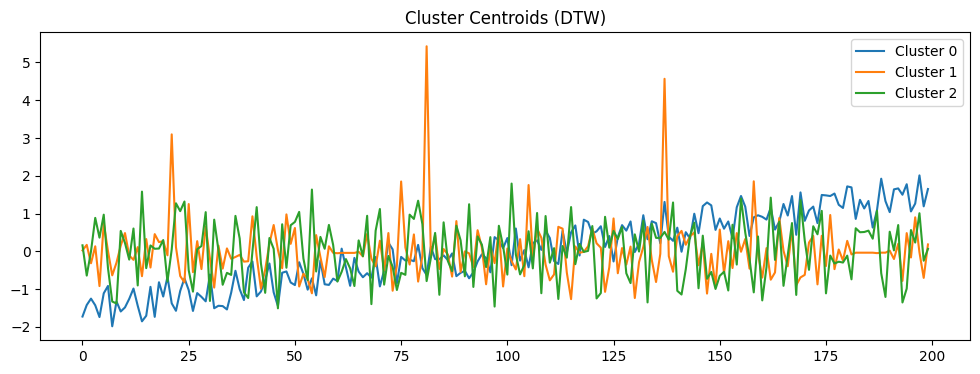

In [ ]:
# ====================================================
# 3. Plot cluster centroids
# ====================================================
plt.figure(figsize=(12,4))
for i, centroid in enumerate(model.cluster_centers_):
    plt.plot(centroid.ravel(), label=f"Cluster {i}")
plt.legend()
plt.title("Cluster Centroids (DTW)")
plt.show()


# Penjelasan Output

# np.bincount(labels)
# Ini menunjukkan berapa mesin masuk ke cluster 0, 1, 2.
# Ideal (karena data synthetic):
# [30 30 30]
# Kalau berbeda sedikit → normal karena random noise + DTW behavior.

# ✔ Plot "Cluster Centroids"
# Anda akan lihat pola:
# Cluster 0: kurva datar → mesin sehat
# Cluster 1: kurva naik perlahan → mesin mulai aus
# Cluster 2: berisik, banyak spike → mendekati fail

# DTW membuat clustering robust walaupun waktu spike tidak sejajar.

# Interpretasi Engineer
# Cluster bisa diperlakukan seperti health monitoring:
# Cluster Kondisi Mesin   Aksi
# 0   Normal  no action
# 1   Degradation schedule maintenance
# 2   Faulty  urgent check

In [ ]:
# CODE Time Series Classification

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from scipy.fft import fft

# ====================================================
# 1. Generate synthetic cycle pressure data
# ====================================================
np.random.seed(42)
n_samples = 200
T = 100

# OK cycles: smooth pressure curve
OK = np.linspace(2, 10, T) + 0.2*np.random.randn(100, T)

# NG cycles: drop or spike in mid-cycle
NG = np.linspace(2, 10, T) + 0.2*np.random.randn(100, T)
NG[:, 40:60] -= 3 * np.random.rand(100, 20)  # pressure drop

# Combine
X = np.vstack([OK, NG])
y = np.array([0]*100 + [1]*100)  # 0 = OK, 1 = NG

# ====================================================
# 2. Feature extraction for sklearn
# ====================================================
def extract_features(batch):
    features = []
    for ts in batch:
        slope = (ts[-1] - ts[0]) / T
        freq = fft(ts)
        energy = np.sum(np.abs(freq[:10]))  # low freq energy

        features.append([
            np.mean(ts),
            np.std(ts),
            np.max(ts) - np.min(ts),
            slope,
            energy
        ])
    return np.array(features)

X_feat = extract_features(X)

# ====================================================
# 3. Train classifier
# ====================================================
X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        19

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
# FULL TRAINING PIPELINE (TensorFlow/Keras)

# Kode lengkap + penjelasan di setiap bagian

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# =============================================
# 1. Generate synthetic sensor data
# =============================================
np.random.seed(42)
T = 2000

time = np.arange(T)
vibration = 5 + 0.005*time + np.sin(time/20) + np.random.normal(0, 0.5, T)

# Binary label (warning jika vibrasi > threshold)
threshold = 8
label = (vibration > threshold).astype(int)

df = pd.DataFrame({
    "vibration": vibration,
    "label": label
})

df.head()

vibration  label
0   5.248357      0
1   4.985847      0
2   5.433678      0
3   5.925953      0
4   5.101593      0

In [ ]:
# =============================================
# 2. Feature Engineering
# =============================================
df["lag1"] = df["vibration"].shift(1)
df["lag2"] = df["vibration"].shift(2)
df["roll_mean5"] = df["vibration"].rolling(5).mean()
df["roll_std5"] = df["vibration"].rolling(5).std()

# Regression target: predict next-step vibration
df["y_reg_target"] = df["vibration"].shift(-1)

# Classification target: warning label
df["y_cls_target"] = df["label"]

# Drop NaN values. Be explicit about subsets to ensure all are aligned.
# First, drop rows with NaNs in the feature set (handles leading NaNs)
features = ["vibration", "lag1", "lag2", "roll_mean5", "roll_std5"]
df.dropna(subset=features, inplace=True)

# Then, drop rows with NaNs in the regression target (handles trailing NaN from shift(-1))
df.dropna(subset=['y_reg_target'], inplace=True)

X = df[features].values
y_reg = df["y_reg_target"].values
y_cls = df["y_cls_target"].values

# =============================================
# 3. Train/Test Split (no shuffling)
# =============================================
X_train, X_test, y_reg_train, y_reg_test, y_cls_train, y_cls_test = train_test_split(
    X, y_reg, y_cls, test_size=0.2, shuffle=False
)

# =============================================
# 4. Scaling
# =============================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to TF tensors
X_train_tf = tf.convert_to_tensor(X_train_scaled, dtype=tf.float32)
X_test_tf = tf.convert_to_tensor(X_test_scaled, dtype=tf.float32)

y_reg_train_tf = tf.convert_to_tensor(y_reg_train, dtype=tf.float32)
y_reg_test_tf = tf.convert_to_tensor(y_reg_test, dtype=tf.float32)

y_cls_train_tf = tf.convert_to_tensor(y_cls_train, dtype=tf.float32)
y_cls_test_tf = tf.convert_to_tensor(y_cls_test, dtype=tf.float32)

In [ ]:
# MODEL 2 — Feedforward Network untuk KLASIFIKASI

cls_model = keras.Sequential([
    keras.layers.Dense(32, activation="relu", input_shape=(X_train.shape[1],)),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")  # binary classification
])

cls_model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history_cls = cls_model.fit(
    X_train_tf, y_cls_train_tf,
    validation_split=0.1,
    epochs=30,
    batch_size=32,
    verbose=1
)

# Interpretasi output:
# binary_crossentropy → loss untuk klasifikasi
# accuracy → proporsi prediksi benar
# val_accuracy meningkat → model makin bagus
# val_loss naik tapi val_accuracy stagnan → overfit

Epoch 1/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8200 - loss: 0.5306 - val_accuracy: 1.0000 - val_loss: 0.0954
Epoch 2/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8927 - loss: 0.3033 - val_accuracy: 1.0000 - val_loss: 0.0149
Epoch 3/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9261 - loss: 0.2008 - val_accuracy: 1.0000 - val_loss: 0.0029
Epoch 4/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9398 - loss: 0.1637 - val_accuracy: 1.0000 - val_loss: 7.7002e-04
Epoch 5/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9427 - loss: 0.1408 - val_accuracy: 1.0000 - val_loss: 2.7270e-04
Epoch 6/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9556 - loss: 0.1189 - val_accuracy: 1.0000 - val_loss: 1.1678e-04
Epoch 7/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9549 - loss: 0.1095 - val_accuracy: 1.0000 - val_loss: 5.3617e-05
Epoch 8/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9689 - loss: 0.0982 - val_accuracy: 1

In [ ]:
# Evaluasi

#  Regresi:

reg_model.evaluate(X_test_tf, y_reg_test_tf)

# Interpretasi:
# MAE kecil → model bagus
# Jika MAE = 0.5 misalnya → rata-rata prediksi meleset 0.5 satuan vibrasi

# Klasifikasi:

cls_model.evaluate(X_test_tf, y_cls_test_tf)

# Interpretasi:
# accuracy > 0.9 → sangat bagus
# Bisa tambahkan F1 score jika imbalance

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3482 - mae: 0.4792  
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 2.5426e-11  


[9.201740064357367e-12, 1.0]

In [ ]:
# Convolution Neural Network
# CNN awalnya dipakai untuk gambar, tapi CNN juga sangat efektif terhadap time series, terutama:
# mendeteksi local pattern
# menangkap pola berulang
# mengurangi noise
# parallelizable (lebih cepat dari LSTM/GRU)

# 1D Convolution
# jika LSTM membaca data satu persatu, maka Conv1D membaca:
# [window kecil] -> geser -> [window kecil] -> geser
# misal kita punya sekuens: [1,2,3,4,5,6,7,8,9]
# Conv1D dengan kernel size=3 bekerja seperti ini:
# [1 2 3] → feature A
# [2 3 4] → feature B
# [3 4 5] → feature C
# ....
# CNN belajar pattern lokal seperti:
# slope naik
# slope turun
# frekuensi seperti sinyal sensor
# bentuk gelombang tertentu
# Itu sebabnya CNN cocok untuk: sensor getaran, sensor tegangan, suhu mesin, anomali mesin berulang, dan cyclical behavior
# Kenapa Conv1D Cocok untuk Forecasting?
# Karena Conv1D bisa:
# Menangkap pola jangka pendek (local trends)
# Misal vibrasi naik → turun → naik dalam periode 4 detik.
# Lebih cepat daripada LSTM/GRU
# Tidak ada iterasi step-by-step seperti RNN.
# Stabil & mudah dilatih
# Bisa digabung dengan Dense/LSTM/Transformer
# Bentuk input ke Conv1D
# CNN 1D membutuhkan bentuk:
# (batch, timesteps, channels)
# Contoh:
# kita ambil window 30 data → timesteps = 30
# hanya 1 sensor → channels = 1
# Bagaimana CNN mem-forecast?
# Model melakukan:
# window 30 data → CNN → Dense → prediksi titik ke-31
# Jadi CNN mendeteksi pola di window dan memprediksi masa depan.
# Kelemahan Conv1D
# Tidak bagus untuk pola jangka sangat panjang
# Tidak ingat urutan global seperti LSTM
# Untuk forecasting multi-step, butuh trik (seq2seq, encoder–decoder, autoregressive loop)

# 2D Convolution
# Bagaimana 2D convolution digunakan untuk data 1D seperti time series?
# Ada dua trik utama
# Trik A — Mengubah Time Series Menjadi “Image-like” (Spectrogram)
# Banyak buku + riset industri melakukan ini.
# 1. Ubah time series menjadi spektrogram / STFT
# 2. Bentuk menjadi matriks (time × frequency)
# 3. Lalu apply Conv2D seperti gambar
# Digunakan pada:
# getaran mesin (predict failure)
# audio sensor
# hidro-akustik
# predictive maintenance
# Contoh bentuk spectrogram:
# [ time x freq ] → seperti gambar grayscale
# Lalu Conv2D bisa mendeteksi:
# puncak frekuensi
# periodic noise
# lonjakan harmonik
# resonansi mesin
# Ini sangat kuat untuk industrial engineering.
#
# Trik B — Multivariate Time Series sebagai “2D Grid”
# Jika ada banyak sensors:
# sensor1: 100 timestep
# sensor2: 100 timestep
# sensor3: 100 timestep
# Kita bisa bentuk matrix:
# sensors × timesteps
# Sehingga jadi 2D seperti gambar.
# Conv2D mendeteksi kombinasi pola antar-sensor + waktu.

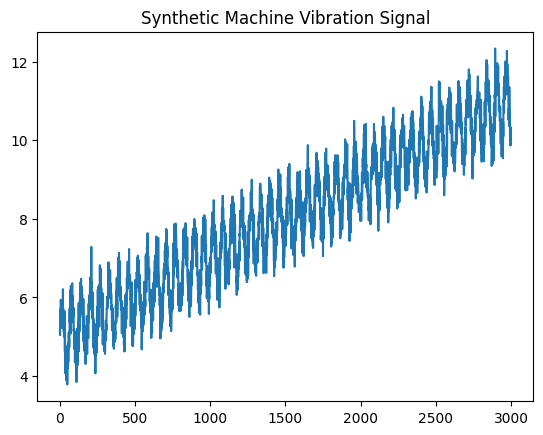

In [ ]:
# Generate Synthetic Data

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

np.random.seed(42)

T = 3000
time = np.arange(T)

vibration = (
    5
    + 0.002*time
    + 0.8*np.sin(time/10)
    + np.random.normal(0, 0.3, T)
)

plt.plot(time, vibration)
plt.title("Synthetic Machine Vibration Signal")
plt.show()

In [ ]:
# Forecasting:
# window 30 data → prediksi titik ke-31

def make_dataset(series, window=30):
    X, y = [], []
    for t in range(len(series) - window):
        X.append(series[t:t+window])
        y.append(series[t+window])
    return np.array(X), np.array(y)

WINDOW = 30
X, y = make_dataset(vibration, WINDOW)

# Train / Test Split

split = int(len(X) * 0.8)

X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

# Scaling (optional)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# CNN needs shape: (batch, timesteps, channels)
X_train_scaled = X_train_scaled[..., np.newaxis]
X_test_scaled  = X_test_scaled[..., np.newaxis]

In [ ]:
# Build Conv1D Model

model_1d = keras.Sequential([
    keras.layers.Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=(WINDOW,1)),
    keras.layers.Conv1D(filters=16, kernel_size=3, activation='relu'),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1)
])

model_1d.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

model_1d.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 26, 32)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 24, 16)         │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 16)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,033 (7.94 KB)

 Trainable params: 2,033 (7.94 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train Model

history = model_1d.fit(
    X_train_scaled, y_train,
    validation_split=0.1,
    epochs=20,
    batch_size=32,
    verbose=1
)

# Interpretasi (seperti yang Anda minta):
# Bila val_loss turun → model semakin baik
# Bila loss turun tapi val_loss naik → overfitting
# MAE artinya rata-rata kesalahan model dalam satuan vibration

Epoch 1/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 49.1067 - mae: 6.8469 - val_loss: 3.7509 - val_mae: 1.6612
Epoch 2/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.9459 - mae: 2.5372 - val_loss: 14.2338 - val_mae: 3.1757
Epoch 3/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.7184 - mae: 1.8379 - val_loss: 3.6545 - val_mae: 1.5222
Epoch 4/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.2677 - mae: 0.9122 - val_loss: 1.1653 - val_mae: 0.9051
Epoch 5/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.6373 - mae: 0.6697 - val_loss: 0.6631 - val_mae: 0.7080
Epoch 6/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.4926 - mae: 0.5908 - val_loss: 0.5388 - val_mae: 0.6270
Epoch 7/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.3983 - mae: 0.5333 - val_loss: 0.4420 - val_mae: 0.5660
Epoch 8/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.3708 - mae: 0.5142 - val_loss: 0.3794 - val_mae: 0.5205
Epoch 9/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3243 

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4906 - mae: 0.5745
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


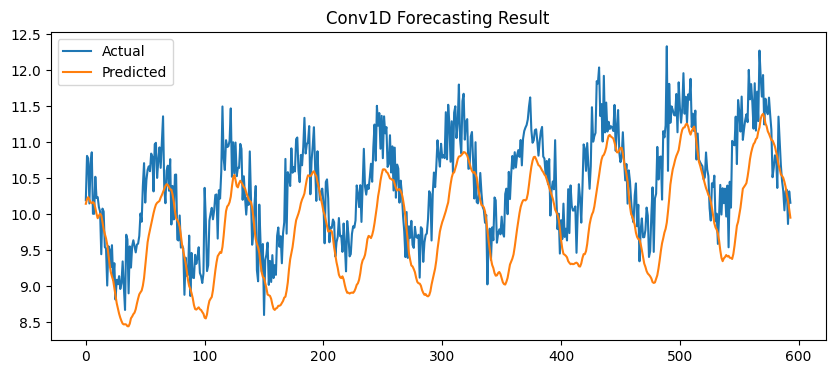

In [ ]:
# Evaluate & Plot

model_1d.evaluate(X_test_scaled, y_test)

y_pred = model_1d.predict(X_test_scaled)

plt.figure(figsize=(10,4))
plt.plot(y_test, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.title("Conv1D Forecasting Result")
plt.legend()
plt.show()

In [ ]:
#  Create STFT Spectrogram

import tensorflow.signal as tfs

# STFT
stft = tfs.stft(
    vibration,
    frame_length=64,
    frame_step=16
)

spectrogram = tf.abs(stft).numpy()
print(spectrogram.shape)

# Output kira-kira:
# (#windows, #freq_bins)
#   (186, 33)

(184, 33)


In [ ]:
# Windowing untuk Spectrogram Forecasting

# Kita ingin:

# image 10 spectrogram frames → forecast frame ke-11

def make_spec_dataset(spec, window=10):
    X, y = [], []
    for i in range(len(spec) - window):
        X.append(spec[i:i+window])
        y.append(spec[i+window])
    return np.array(X), np.array(y)

WINDOW_SPEC = 10
X2, y2 = make_spec_dataset(spectrogram, WINDOW_SPEC)

# CNN2D butuh channel
X2 = X2[..., np.newaxis]
y2 = y2[..., np.newaxis]

# Train/Test Split

split = int(len(X2)*0.8)
X2_train, y2_train = X2[:split], y2[:split]
X2_test,  y2_test  = X2[split:], y2[split:]

In [ ]:
# Build Conv2D Model

model_2d = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=X2_train.shape[1:]),
    keras.layers.Conv2D(16, (3,3), activation='relu'),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(y2_train.shape[1]*y2_train.shape[2], activation='linear'),
    keras.layers.Reshape((y2_train.shape[1], y2_train.shape[2]))
])

model_2d.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

model_2d.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 8, 31, 32)      │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 6, 29, 16)      │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 16)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 33)             │         1,089 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 33, 1)          │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,577 (25.69 KB)

 Trainable params: 6,577 (25.69 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train

history2 = model_2d.fit(
    X2_train, y2_train,
    validation_split=0.1,
    epochs=20,
    batch_size=16
)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 2133.4211 - mae: 12.0256 - val_loss: 3570.9734 - val_mae: 15.2092
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 2146.4749 - mae: 11.9803 - val_loss: 3545.9375 - val_mae: 15.1841
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 2225.4634 - mae: 12.1558 - val_loss: 3499.6599 - val_mae: 15.4065
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 2033.8556 - mae: 11.9321 - val_loss: 3405.6411 - val_mae: 16.1451
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 2030.5165 - mae: 12.7435 - val_loss: 3228.1941 - val_mae: 17.3751
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 1933.3707 - mae: 13.8638 - val_loss: 2919.9778 - val_mae: 18.4586
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 1714.6656 - mae: 14.6484 - val_loss: 2424.6536 - val_mae: 18.4211
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 1378.8295 - mae: 14.3523 - val_loss: 1704.5784 - val_mae: 16.1254
Epoch 9/20
8/8 ━

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 58.0683 - mae: 2.3237
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


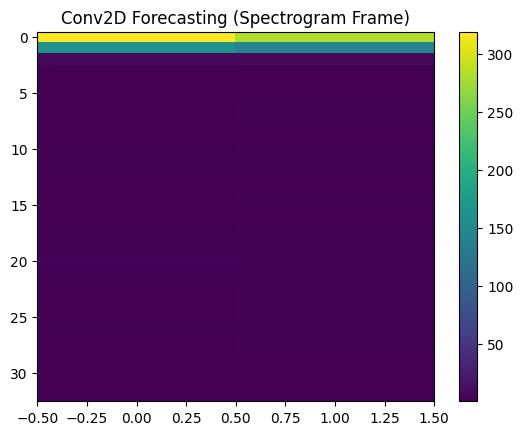

In [ ]:
model_2d.evaluate(X2_test, y2_test)

pred2 = model_2d.predict(X2_test)

plt.imshow(np.hstack([y2_test[0], pred2[0]]), aspect="auto")
plt.title("Conv2D Forecasting (Spectrogram Frame)")
plt.colorbar()
plt.show()

In [ ]:
# ATURAN DASAR SEKUENSIAL NEURAL NETWORK

# Layer GRU/LSTM/RNN/Attention harus berada di layers awal
# kalau layer setelahnya adalah dense maka wajib return sequences=True
# contoh:
# model.add.LSTM(return_sequences=False)
# model.add.Dense(64)
# dan
# model.add.LSTM(return_sequences=True) # kalau next layer masih layer RNN/LSTM/GRU/Att maka wajib True
# model.add.LSTM(return_sequences=False) # kalau next layer sudah tidak layer RNN/LSTM/GRU/Att maka wajib False
# model.add.Dense(64)

# Autoencoder Pasti Simetris (umumnya)
# Struktur yang Anda lihat:
# Encoder
# Dense(64)
# Dense(32)
# Dense(16)
# Decoder
# Dense(16)
# Dense(32)
# Dense(64)
# Ini disebut architecture symmetry, dan itu bukan kebetulan, tetapi memang best practice dalam autoencoder.

# Model deep learning memprediksi “per periode” selama training.
# Kalimat yang paling akurat:
# Setiap sample input adalah 1 window waktu, dan model memprediksi nilai pada periode berikutnya.
# Contoh:
# Misal window = 10.
# Data asli: x1, x2, x3, ..., x50
# Windowing membuat dataset seperti:
# Window     → Target
# --------------------------------
# [x1..x10]  → x11
# [x2..x11]  → x12
# [x3..x12]  → x13
# ...
# [x40..x49] → x50
# Setiap baris itu adalah satu sample training.
# Dan setiap sample menghasilkan prediksi 1 periode ke depan.
# model belajar hubungan:
# 10 periode sebelumnya → 1 periode berikutnya
# ini seperti membuat hirarki(block) jaringan neural
# Mengapa penting?
# Karena deep learning tidak mengerti time series secara natural—dia hanya belajar mapping input → output.

In [ ]:
# Upsampling
# Kebalikan dari pooling/downsampling.
# Dipakai ketika:
# ingin mengembalikan resolusi time series ke ukuran semula
# 1. decoder autoencoder
# 2. generative forecasting
# 3. reconstructive models
# 4. 1D/2D ConvTranspose (CNN decoder)
# Contoh fungsi: UpSampling1D(size=2), Conv1DTranspose

# MaxPooling
# Operasi CNN untuk mengambil nilai maksimum dalam sebuah window.
# Contoh:
# [2, 7, 4] → max = 7
# Fungsi:
# mengurangi dimensi (downsampling)
# mengambil fitur dominan
# membuat model lebih translational invariant
# dipakai pada CNN 1D untuk time series
# Pooling pada time series berarti:
# > mengambil puncak fitur dalam beberapa step waktu.

# GlobalAveragePooling
# Pooling yang mengambil rata-rata seluruh timesteps atau channel.
# Contoh pada 1D CNN:
# Time axis (T) diringkas menjadi 1 nilai per filter.
# Fungsi:
# mengubah sequence menjadi 1 vektor
# menghindari flatten yang terlalu besar
# sangat umum di time series classification
# sering dipakai di CNN modern, MobileNet, dsb.
# Pada time series forecasting:
# dipakai ketika output-nya adalah nilai tunggal (regresi)

# Layers Concatenate (Concatenation Layer)
# Layer untuk menggabungkan dua atau lebih representasi.
# Digunakan untuk:
# menyatukan fitur CNN dengan LSTM
# multi-head CNN
# skip connections
# multi-branch architecture
# multi-sensor fusion
# 1D + metadata fusion
# Struktur:
# concat([layer1_output, layer2_output])
# Ini sangat penting untuk arsitektur custom.

# Positional Encoding
# Transformer tidak mengerti waktu, jadi kita beri penanda posisi.
# Ada dua jenis:
# 1. Sinusoidal (original Transformer)
# PE(pos, d) = sin/cos(pos / 10000^(2i/d))
# 2. Learned Embedding
# Model belajar sendiri encoding posisi.
# Dipakai oleh:
# Transformer time series
# Informer
# TFT (Temporal Fusion Transformer)
# Time Series Transformer (HuggingFace)
# Kegunaan:
# memberi tahu "timesteps ke berapa ini"
# membantu model memahami urutan

# Transformer Encoder Block
# Blok inti Transformer. Biasanya berisi:
# 1. Multi-Head Self Attention
# Mencari hubungan antar timestep.
# 2. Add & Norm
# Skip connection + LayerNorm.
# 3. Feed Forward Network (FFN)
# Dense → Activation → Dense.
# Add & Norm (lagi)
# Struktur lengkap:
# Input
# → Self-Attention
# → Add & Norm
# → FeedForward
# → Add & Norm
# → Output
# Dipakai pada:
# Time Series Transformer
# TFT
# Informer
# PyTorch/TensorFlow time series libraries
# Fungsinya:
# > menangkap pola jangka panjang dan dependensi global.

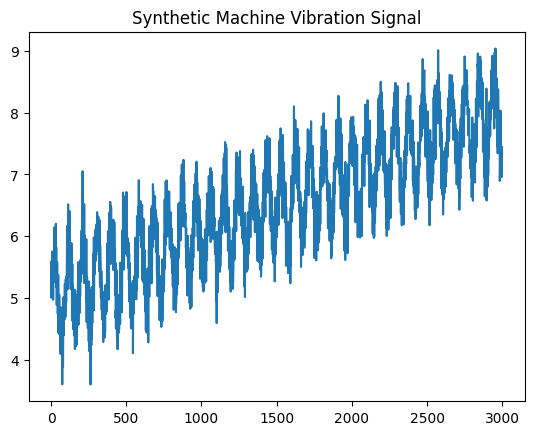

In [ ]:
# SIMPLE RNN — TIME SERIES FORECASTING

# (Full pipeline, clean, siap jalan)

import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# =========================================
# 1. Generate Synthetic Data
# =========================================

np.random.seed(42)
T = 3000
time = np.arange(T)

vibration = (
    5
    + 0.001*time
    + 0.7*np.sin(time/15)
    + np.random.normal(0, 0.3, T)
)

plt.plot(time, vibration)
plt.title("Synthetic Machine Vibration Signal")
plt.show()

In [ ]:
# =========================================
# 2. Windowing
# =========================================

def make_dataset(series, window=40):
    X, y = [], []
    for i in range(len(series) - window):
        X.append(series[i:i+window])
        y.append(series[i+window])
    return np.array(X), np.array(y)

WINDOW = 40
X, y = make_dataset(vibration, WINDOW)

In [ ]:
# =========================================
# 3. Train/Test Split
# =========================================

split = int(len(X)*0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [ ]:
# =========================================
# 4. Scaling
# =========================================

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

X_train_scaled = X_train_scaled[..., np.newaxis]
X_test_scaled  = X_test_scaled[..., np.newaxis]

In [ ]:
# =========================================
# 5. Build SIMPLE RNN Model
# =========================================

model_rnn = keras.Sequential([
    keras.layers.SimpleRNN(64, activation='tanh', return_sequences=False, input_shape=(WINDOW,1)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

model_rnn.compile(
    optimizer="adam",
    loss="mse",
    metrics=["mae"]
)

model_rnn.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,337 (24.75 KB)

 Trainable params: 6,337 (24.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# =========================================
# 6. Train Model
# =========================================

history = model_rnn.fit(
    X_train_scaled, y_train,
    validation_split=0.1,
    epochs=20,
    batch_size=32,
    verbose=1
)

Epoch 1/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 20.1365 - mae: 3.9674 - val_loss: 0.9868 - val_mae: 0.8660
Epoch 2/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.6813 - mae: 0.6681 - val_loss: 0.6518 - val_mae: 0.6970
Epoch 3/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.4928 - mae: 0.5531 - val_loss: 0.4116 - val_mae: 0.5385
Epoch 4/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2814 - mae: 0.4143 - val_loss: 0.1962 - val_mae: 0.3604
Epoch 5/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1624 - mae: 0.3179 - val_loss: 0.1826 - val_mae: 0.3451
Epoch 6/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1318 - mae: 0.2863 - val_loss: 0.2073 - val_mae: 0.3702
Epoch 7/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1265 - mae: 0.2836 - val_loss: 0.1695 - val_mae: 0.3320
Epoch 8/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1224 - mae: 0.2773 - val_loss: 0.1602 - val_mae: 0.3238
Epoch 9/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1251 

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2166 - mae: 0.3674
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


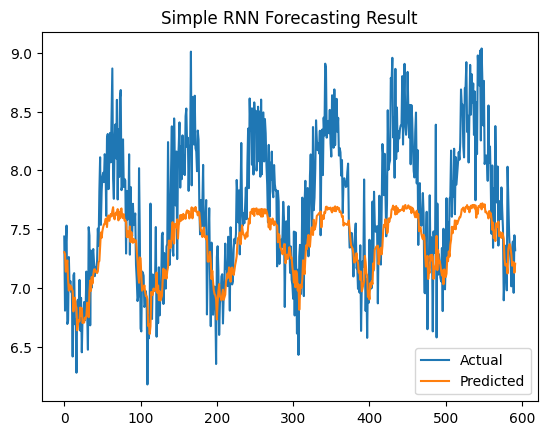

In [ ]:
# =========================================
# 7. Evaluate
# =========================================

model_rnn.evaluate(X_test_scaled, y_test)

y_pred = model_rnn.predict(X_test_scaled)

plt.plot(y_test, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.title("Simple RNN Forecasting Result")
plt.legend()
plt.show()

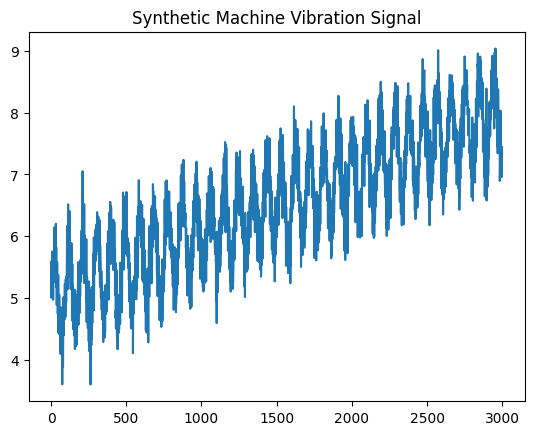

In [ ]:
# LSTM — TIME SERIES FORECASTING (Full Pipeline)

import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# =========================================
# 1. Generate Synthetic Data
# =========================================

np.random.seed(42)
T = 3000
time = np.arange(T)

vibration = (
    5
    + 0.001*time
    + 0.7*np.sin(time/15)
    + np.random.normal(0, 0.3, T)
)

plt.plot(time, vibration)
plt.title("Synthetic Machine Vibration Signal")
plt.show()

In [ ]:
# =========================================
# 2. Windowing Function
# =========================================

def make_dataset(series, window=40):
    X, y = [], []
    for i in range(len(series) - window):
        X.append(series[i:i+window])
        y.append(series[i+window])
    return np.array(X), np.array(y)

WINDOW = 40
X, y = make_dataset(vibration, WINDOW)

In [ ]:
# =========================================
# 3. Train/Test Split
# =========================================

split = int(len(X)*0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# =========================================
# 4. Scaling
# =========================================

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

X_train_scaled = X_train_scaled[..., np.newaxis]
X_test_scaled  = X_test_scaled[..., np.newaxis]

In [ ]:
# =========================================
# 5. Build LSTM Model
# =========================================

model_lstm = keras.Sequential([
    keras.layers.LSTM(64, return_sequences=False, input_shape=(WINDOW,1)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

model_lstm.compile(
    optimizer="adam",
    loss="mse",
    metrics=["mae"]
)

model_lstm.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,009 (74.25 KB)

 Trainable params: 19,009 (74.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# =========================================
# 6. Train Model
# =========================================

history = model_lstm.fit(
    X_train_scaled, y_train,
    validation_split=0.1,
    epochs=20,
    batch_size=32,
    verbose=1
)

Epoch 1/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 24.7554 - mae: 4.5402 - val_loss: 0.8685 - val_mae: 0.8004
Epoch 2/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - loss: 0.5941 - mae: 0.6324 - val_loss: 0.8768 - val_mae: 0.8190
Epoch 3/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.3074 - mae: 0.4474 - val_loss: 0.7232 - val_mae: 0.7426
Epoch 4/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.1978 - mae: 0.3530 - val_loss: 0.2441 - val_mae: 0.4039
Epoch 5/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.1290 - mae: 0.2839 - val_loss: 0.1395 - val_mae: 0.3005
Epoch 6/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.1220 - mae: 0.2786 - val_loss: 0.2592 - val_mae: 0.4188
Epoch 7/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.1280 - mae: 0.2821 - val_loss: 0.1427 - val_mae: 0.3045
Epoch 8/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.1142 - mae: 0.2722 - val_loss: 0.1569 - val_mae: 0.3210
Epoch 9/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.11

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1455 - mae: 0.2977
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


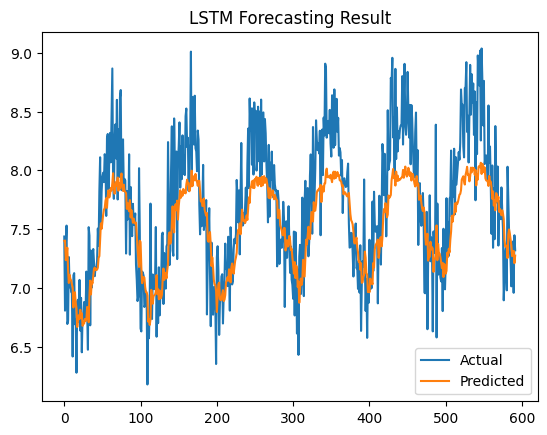

In [ ]:
# =========================================
# 7. Evaluate
# =========================================

model_lstm.evaluate(X_test_scaled, y_test)

y_pred = model_lstm.predict(X_test_scaled)

plt.plot(y_test, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.title("LSTM Forecasting Result")
plt.legend()
plt.show()

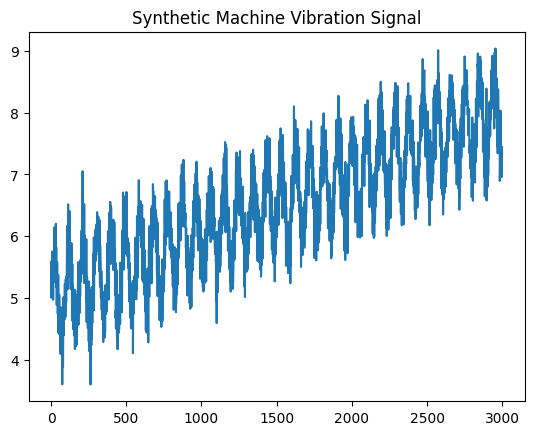

In [ ]:
# GRU — TIME SERIES FORECASTING (Full Pipeline)

import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# =========================================
# 1. Generate Synthetic Data
# =========================================

np.random.seed(42)
T = 3000
time = np.arange(T)

vibration = (
    5
    + 0.001*time
    + 0.7*np.sin(time/15)
    + np.random.normal(0, 0.3, T)
)

plt.plot(time, vibration)
plt.title("Synthetic Machine Vibration Signal")
plt.show()

In [ ]:
# =========================================
# 2. Windowing Function
# =========================================

def make_dataset(series, window=40):
    X, y = [], []
    for i in range(len(series) - window):
        X.append(series[i:i+window])
        y.append(series[i+window])
    return np.array(X), np.array(y)

WINDOW = 40
X, y = make_dataset(vibration, WINDOW)

In [ ]:
# =========================================
# 3. Train/Test Split
# =========================================

split = int(len(X)*0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# =========================================
# 4. Scaling
# =========================================

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

X_train_scaled = X_train_scaled[..., np.newaxis]
X_test_scaled  = X_test_scaled[..., np.newaxis]

In [ ]:
# =========================================
# 5. Build GRU Model
# =========================================

model_gru = keras.Sequential([
    keras.layers.GRU(64, return_sequences=False, input_shape=(WINDOW,1)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

model_gru.compile(
    optimizer="adam",
    loss="mse",
    metrics=["mae"]
)

model_gru.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 64)             │        12,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,977 (58.50 KB)

 Trainable params: 14,977 (58.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# =========================================
# 6. Train Model
# =========================================

history = model_gru.fit(
    X_train_scaled, y_train,
    validation_split=0.1,
    epochs=20,
    batch_size=32,
    verbose=1
)

Epoch 1/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - loss: 29.7961 - mae: 5.1657 - val_loss: 0.4683 - val_mae: 0.5728
Epoch 2/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 0.4277 - mae: 0.5210 - val_loss: 0.2723 - val_mae: 0.4285
Epoch 3/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - loss: 0.1741 - mae: 0.3331 - val_loss: 0.2259 - val_mae: 0.3873
Epoch 4/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.1533 - mae: 0.3065 - val_loss: 0.3230 - val_mae: 0.4744
Epoch 5/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 0.1366 - mae: 0.2945 - val_loss: 0.1496 - val_mae: 0.3117
Epoch 6/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 0.1293 - mae: 0.2869 - val_loss: 0.1593 - val_mae: 0.3221
Epoch 7/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 0.1295 - mae: 0.2897 - val_loss: 0.1697 - val_mae: 0.3335
Epoch 8/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.1215 - mae: 0.2790 - val_loss: 0.1414 - val_mae: 0.3024
Epoch 9/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.1

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1327 - mae: 0.2873
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


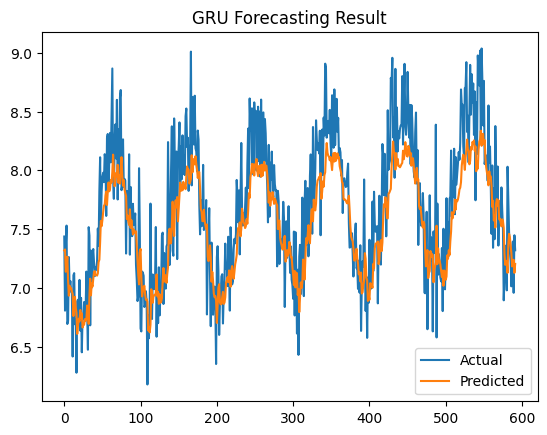

In [ ]:
# =========================================
# 7. Evaluate
# =========================================

model_gru.evaluate(X_test_scaled, y_test)

y_pred = model_gru.predict(X_test_scaled)

plt.plot(y_test, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.title("GRU Forecasting Result")
plt.legend()
plt.show()

In [ ]:
# --------------------------
# A. LSTM + Attention (Bahdanau-style)
# --------------------------
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import random
import os

# reproducibility seeds
os.environ['PYTHONHASHSEED'] = '0'
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# 1) Synthetic signal
T = 3000
t = np.arange(T)
signal = 4.5 + 0.001*t + 0.8*np.sin(t/12.0) + np.random.normal(0, 0.25, T)
# occasional small spikes
spks = np.random.choice(np.arange(200, T-200), size=8, replace=False)
for s in spks: signal[s:s+4] += np.linspace(0, 2.5, 4)

In [ ]:
# 2) windowing (many-to-one: predict next step)
WINDOW = 48
def make_xy(series, window=WINDOW):
    X, y = [], []
    for i in range(len(series)-window):
        X.append(series[i:i+window])
        y.append(series[i+window])
    return np.array(X), np.array(y)

X, y = make_xy(signal, WINDOW)

In [ ]:
# 3) train/test split (time order)
split = int(len(X)*0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# 4) scaling (fit on train)
scaler = StandardScaler()
X_train_flat = X_train.reshape(-1,1)
scaler.fit(X_train_flat)
def scale_X(X_in):
    Xf = X_in.reshape(-1,1)
    Xs = scaler.transform(Xf).reshape(X_in.shape)
    return Xs

X_train_s = scale_X(X_train)
X_test_s  = scale_X(X_test)

In [ ]:
# add channel dim
X_train_s = X_train_s[..., np.newaxis]   # shape (batch, window, 1)
X_test_s  = X_test_s[..., np.newaxis]

In [ ]:
# 5) Bahdanau-style attention layer (custom)
class BahdanauAttention(keras.layers.Layer):
    def __init__(self, units):
        super().__init__()
        self.W1 = keras.layers.Dense(units)
        self.W2 = keras.layers.Dense(units)
        self.V  = keras.layers.Dense(1)

    def call(self, encoder_outputs, hidden_state):
        # encoder_outputs: (batch, timesteps, enc_units)
        # hidden_state: (batch, dec_units)  -> expand to (batch, 1, dec_units)
        hidden_with_time_axis = tf.expand_dims(hidden_state, 1)
        score = self.V(tf.nn.tanh(self.W1(encoder_outputs) + self.W2(hidden_with_time_axis)))
        # score shape: (batch, timesteps, 1)
        attention_weights = tf.nn.softmax(score, axis=1)  # (batch, timesteps, 1)
        context_vector = attention_weights * encoder_outputs  # (batch, timesteps, enc_units)
        context_vector = tf.reduce_sum(context_vector, axis=1) # (batch, enc_units)
        return context_vector, tf.squeeze(attention_weights, -1)

In [ ]:
# 6) Build model: encoder LSTM -> attention -> dense output
enc_units = 64
dec_units = 64

inp = keras.Input(shape=(WINDOW,1))
# encoder: return sequences so attention can attend all timesteps
enc_out = keras.layers.LSTM(enc_units, return_sequences=True)(inp)
# use final step of a separate LSTM as "hidden_state" for attention
hidden = keras.layers.LSTM(dec_units)(inp)
context, attn_weights = BahdanauAttention(32)(enc_out, hidden)
x = keras.layers.Concatenate()([context, hidden])
x = keras.layers.Dense(64, activation='relu')(x)
out = keras.layers.Dense(1)(x)

model_attn = keras.Model(inputs=inp, outputs=out)
model_attn.compile(optimizer='adam', loss='mse', metrics=['mae'])
model_attn.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 48, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 48, 64)    │     16,896 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ (None, 64)        │     16,896 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bahdanau_attention  │ [(None, 64),      │      4,193 │ lstm_1[0][0],     │
│ (BahdanauAttention) │ (None, 48)]       │            │ lstm_2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 128)       │          0 │ bahdanau_attenti… │
│ (Concatenate)       │                   │            │ lstm_2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 64)        │      8,256 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 1)         │         65 │ dense_9[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 46,306 (180.88 KB)

 Trainable params: 46,306 (180.88 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 7) train (with early stopping)
history = model_attn.fit(
    X_train_s, y_train,
    validation_split=0.1,
    epochs=40,
    batch_size=64,
    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)],
    verbose=2
)

Epoch 1/40
34/34 - 12s - 360ms/step - loss: 16.7501 - mae: 3.5914 - val_loss: 0.6691 - val_mae: 0.6595
Epoch 2/40
34/34 - 4s - 116ms/step - loss: 0.9520 - mae: 0.7763 - val_loss: 0.7573 - val_mae: 0.7001
Epoch 3/40
34/34 - 2s - 68ms/step - loss: 0.5260 - mae: 0.5916 - val_loss: 0.4828 - val_mae: 0.5579
Epoch 4/40
34/34 - 2s - 50ms/step - loss: 0.3763 - mae: 0.5000 - val_loss: 0.3109 - val_mae: 0.4446
Epoch 5/40
34/34 - 2s - 50ms/step - loss: 0.2732 - mae: 0.4198 - val_loss: 0.2518 - val_mae: 0.3911
Epoch 6/40
34/34 - 2s - 51ms/step - loss: 0.2333 - mae: 0.3792 - val_loss: 0.2238 - val_mae: 0.3642
Epoch 7/40
34/34 - 2s - 63ms/step - loss: 0.3465 - mae: 0.4037 - val_loss: 0.2040 - val_mae: 0.3432
Epoch 8/40
34/34 - 4s - 119ms/step - loss: 0.1827 - mae: 0.3341 - val_loss: 0.1853 - val_mae: 0.3243
Epoch 9/40
34/34 - 3s - 90ms/step - loss: 0.1519 - mae: 0.3043 - val_loss: 0.1612 - val_mae: 0.3002
Epoch 10/40
34/34 - 5s - 150ms/step - loss: 0.1433 - mae: 0.2937 - val_loss: 0.1540 - val_mae: 

Test MAE: 0.2808
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


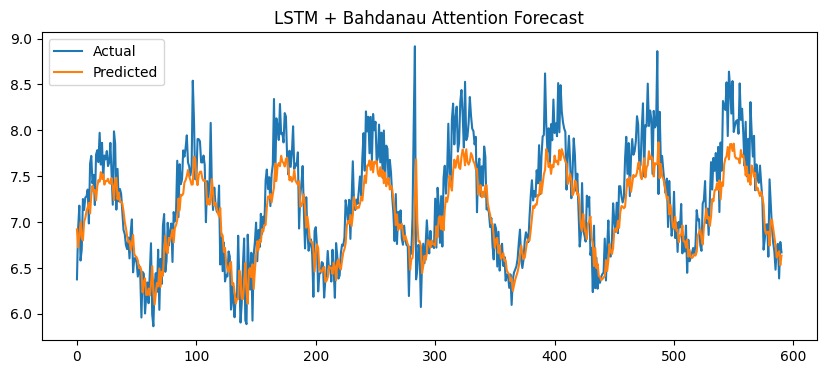

In [ ]:
# 8) evaluate & plot
loss, mae = model_attn.evaluate(X_test_s, y_test, verbose=0)
print(f"Test MAE: {mae:.4f}")

y_pred = model_attn.predict(X_test_s).squeeze()

plt.figure(figsize=(10,4))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('LSTM + Bahdanau Attention Forecast')
plt.legend()
plt.show()

In [ ]:
# --------------------------
# B. Transformer Encoder (Keras MultiHeadAttention) — Forecasting
# --------------------------
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import random, os

# reproducibility
os.environ['PYTHONHASHSEED'] = '0'
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# 1) synthetic signal (slightly different seed/pattern to avoid identical runs)
T = 3000
t = np.arange(T)
signal = 3.8 + 0.0012*t + 0.9*np.sin(t/14.0) + np.random.normal(0, 0.28, T)
# periodic medium spikes
spks = np.random.choice(np.arange(250, T-250), size=10, replace=False)
for s in spks: signal[s:s+6] += np.linspace(0, 2.0, 6)

In [ ]:
# 2) windowing
WINDOW = 64
def make_xy(series, window=WINDOW):
    X,y = [],[]
    for i in range(len(series)-window):
        X.append(series[i:i+window])
        y.append(series[i+window])
    return np.array(X), np.array(y)

X, y = make_xy(signal, WINDOW)

# 3) train/test split
split = int(len(X)*0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# 4) scaling
scaler = StandardScaler()
scaler.fit(X_train.reshape(-1,1))
def scale_X(X_in):
    Xf = X_in.reshape(-1,1)
    Xs = scaler.transform(Xf).reshape(X_in.shape)
    return Xs

X_train_s = scale_X(X_train)[..., np.newaxis]   # (batch, window, 1)
X_test_s  = scale_X(X_test)[..., np.newaxis]

In [ ]:
# 5) positional encoding (sinusoidal)
def get_positional_encoding(seq_len, d_model):
    pos = np.arange(seq_len)[:, np.newaxis]
    i = np.arange(d_model)[np.newaxis, :]
    angle_rates = 1 / np.power(10000, (2*(i//2))/np.float32(d_model))
    angle_rads = pos * angle_rates
    sines = np.sin(angle_rads[:, 0::2])
    cosines = np.cos(angle_rads[:, 1::2])
    pos_encoding = np.concatenate([sines, cosines], axis=-1)
    return tf.cast(pos_encoding, dtype=tf.float32)  # shape (seq_len, d_model)

# 6) Transformer encoder block
def transformer_encoder_block(inputs, head_size=64, num_heads=4, ff_dim=128, dropout=0.1):
    # Multi-head self-attention
    attn_output = keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=head_size)(inputs, inputs)
    attn_output = keras.layers.Dropout(dropout)(attn_output)
    out1 = keras.layers.LayerNormalization(epsilon=1e-6)(inputs + attn_output)
    # Feed-forward
    ff = keras.layers.Dense(ff_dim, activation='relu')(out1)
    ff = keras.layers.Dense(inputs.shape[-1])(ff)
    ff = keras.layers.Dropout(dropout)(ff)
    out2 = keras.layers.LayerNormalization(epsilon=1e-6)(out1 + ff)
    return out2

In [ ]:
# 5) positional encoding (sinusoidal)
def get_positional_encoding(seq_len, d_model):
    pos = np.arange(seq_len)[:, np.newaxis]
    i = np.arange(d_model)[np.newaxis, :]
    angle_rates = 1 / np.power(10000, (2*(i//2))/np.float32(d_model))
    angle_rads = pos * angle_rates
    sines = np.sin(angle_rads[:, 0::2])
    cosines = np.cos(angle_rads[:, 1::2])
    pos_encoding = np.concatenate([sines, cosines], axis=-1)
    return tf.cast(pos_encoding, dtype=tf.float32)  # shape (seq_len, d_model)

# 6) Transformer encoder block
def transformer_encoder_block(inputs, head_size=64, num_heads=4, ff_dim=128, dropout=0.1):
    # Multi-head self-attention
    attn_output = keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=head_size)(inputs, inputs)
    attn_output = keras.layers.Dropout(dropout)(attn_output)
    out1 = keras.layers.LayerNormalization(epsilon=1e-6)(inputs + attn_output)
    # Feed-forward
    ff = keras.layers.Dense(ff_dim, activation='relu')(out1)
    ff = keras.layers.Dense(inputs.shape[-1])(ff)
    ff = keras.layers.Dropout(dropout)(ff)
    out2 = keras.layers.LayerNormalization(epsilon=1e-6)(out1 + ff)
    return out2

In [ ]:
# 7) Build model: small stack of encoder blocks + pooling + dense
d_model = 64  # embedding dimension
inp = keras.Input(shape=(WINDOW,1))
# project input to d_model dims
x = keras.layers.Dense(d_model)(inp)
# add positional encoding
pos_enc = get_positional_encoding(WINDOW, d_model)
x = x + pos_enc[None, ...]   # broadcast to batch
# stack encoder blocks
for _ in range(2):
    x = transformer_encoder_block(x, head_size=16, num_heads=4, ff_dim=128, dropout=0.1)
# global pooling and output
x = keras.layers.GlobalAveragePooling1D()(x)
x = keras.layers.Dense(64, activation='relu')(x)
x = keras.layers.Dense(32, activation='relu')(x)
out = keras.layers.Dense(1)(x)

model_tf = keras.Model(inputs=inp, outputs=out)
model_tf.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), loss='mse', metrics=['mae'])
model_tf.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 64, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 64, 64)    │        128 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 64, 64)    │          0 │ dense_11[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 64, 64)    │     16,640 │ add[0][0],        │
│ (MultiHeadAttentio… │                   │            │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64, 64)    │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 64, 64)    │          0 │ add[0][0],        │
│                     │                   │            │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 64, 64)    │        128 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 64, 128)   │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 64, 64)    │      8,256 │ dense_12[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64, 64)    │          0 │ dense_13[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 64, 64)    │          0 │ layer_normalizat… │
│                     │                   │            │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 64, 64)    │        128 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 64, 64)    │     16,640 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 64, 64)    │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 64, 64)    │          0 │ layer_normalizat… │
│                     │                   │            │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 64, 64)    │        128 │ add_3[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 64, 128)   │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 64, 64)    │      8,256 │ dense_14[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 64, 64)    │          0 │ dense_15[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_4 (Add)         │ (None, 64, 64)    │          0 │ layer_normalizat… │
│                     │                   │            │ dropout_5[0][0] 

 Total params: 73,345 (286.50 KB)

 Trainable params: 73,345 (286.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 8) train
history = model_tf.fit(
    X_train_s, y_train,
    validation_split=0.1,
    epochs=40,
    batch_size=64,
    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)],
    verbose=2
)

Epoch 1/40
34/34 - 14s - 404ms/step - loss: 2.6152 - mae: 1.1756 - val_loss: 1.2407 - val_mae: 0.9167
Epoch 2/40
34/34 - 5s - 140ms/step - loss: 0.5930 - mae: 0.6398 - val_loss: 0.4153 - val_mae: 0.5535
Epoch 3/40
34/34 - 5s - 135ms/step - loss: 0.2280 - mae: 0.3765 - val_loss: 0.1689 - val_mae: 0.3306
Epoch 4/40
34/34 - 6s - 181ms/step - loss: 0.1343 - mae: 0.2822 - val_loss: 0.1225 - val_mae: 0.2791
Epoch 5/40
34/34 - 5s - 143ms/step - loss: 0.1208 - mae: 0.2669 - val_loss: 0.1110 - val_mae: 0.2670
Epoch 6/40
34/34 - 6s - 181ms/step - loss: 0.1199 - mae: 0.2664 - val_loss: 0.1075 - val_mae: 0.2627
Epoch 7/40
34/34 - 5s - 138ms/step - loss: 0.1178 - mae: 0.2644 - val_loss: 0.1054 - val_mae: 0.2598
Epoch 8/40
34/34 - 5s - 141ms/step - loss: 0.1176 - mae: 0.2633 - val_loss: 0.1086 - val_mae: 0.2637
Epoch 9/40
34/34 - 6s - 175ms/step - loss: 0.1159 - mae: 0.2609 - val_loss: 0.1066 - val_mae: 0.2613
Epoch 10/40
34/34 - 5s - 142ms/step - loss: 0.1157 - mae: 0.2602 - val_loss: 0.1129 - val_

Test MAE: 0.3353
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


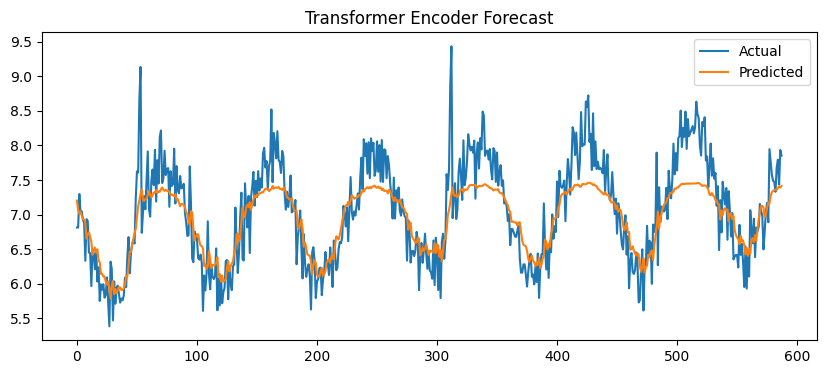

In [ ]:
# 9) evaluate & plot
loss, mae = model_tf.evaluate(X_test_s, y_test, verbose=0)
print(f"Test MAE: {mae:.4f}")

y_pred = model_tf.predict(X_test_s).squeeze()

plt.figure(figsize=(10,4))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Transformer Encoder Forecast')
plt.legend()
plt.show()

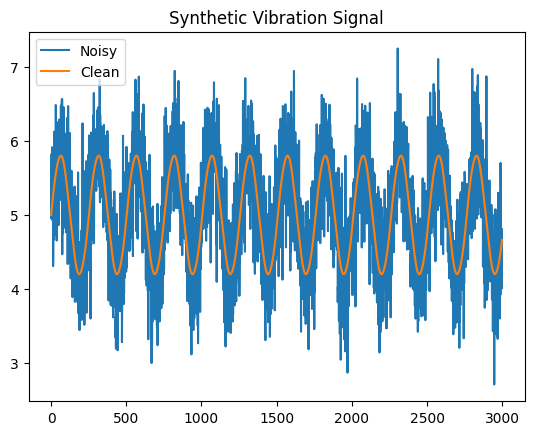

In [ ]:
# ============================================
# DENOISING AUTOENCODER FOR TIME SERIES
# ============================================

import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# ---------------------------------------------------------
# 1. Generate Synthetic Vibration Signal + Add Heavy Noise
# ---------------------------------------------------------

np.random.seed(42)
T = 3000
t = np.arange(T)

clean = 5 + 0.01*np.sin(t/10) + 0.8*np.sin(t/40)
noise = np.random.normal(0, 0.5, T)
noisy = clean + noise

plt.plot(t, noisy, label="Noisy")
plt.plot(t, clean, label="Clean")
plt.legend()
plt.title("Synthetic Vibration Signal")
plt.show()

# reshape to (samples, timesteps, 1)
clean = clean.reshape(-1,1)
noisy = noisy.reshape(-1,1)

In [ ]:
# ---------------------------------------------------------
# 2. Scaling
# ---------------------------------------------------------

scaler = StandardScaler()
noisy_scaled  = scaler.fit_transform(noisy)
clean_scaled  = scaler.transform(clean)

WINDOW = 64
def make_dataset(data, window):
    X = []
    for i in range(len(data) - window):
        X.append(data[i:i+window])
    return np.array(X)

X_noisy = make_dataset(noisy_scaled, WINDOW)
X_clean = make_dataset(clean_scaled, WINDOW)

# Split
split = int(0.8 * len(X_noisy))
X_train_noisy = X_noisy[:split]
X_train_clean = X_clean[:split]

X_test_noisy = X_noisy[split:]
X_test_clean = X_clean[split:]

In [ ]:
# ---------------------------------------------------------
# 3. Build Autoencoder
# ---------------------------------------------------------

inputs = keras.Input(shape=(WINDOW,1))

# Encoder
x = keras.layers.Conv1D(32, kernel_size=3, padding="same", activation="relu")(inputs)
x = keras.layers.MaxPooling1D(2, padding="same")(x)
x = keras.layers.Conv1D(16, kernel_size=3, padding="same", activation="relu")(x)
encoded = keras.layers.MaxPooling1D(2, padding="same")(x)

# Decoder
x = keras.layers.Conv1D(16, kernel_size=3, padding="same", activation="relu")(encoded)
x = keras.layers.UpSampling1D(2)(x)
x = keras.layers.Conv1D(32, kernel_size=3, padding="same", activation="relu")(x)
x = keras.layers.UpSampling1D(2)(x)

decoded = keras.layers.Conv1D(1, kernel_size=3, padding="same")(x)

autoencoder = keras.Model(inputs, decoded)
autoencoder.compile(optimizer="adam", loss="mse")
autoencoder.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 64, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 64, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 32, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 32, 16)         │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 16, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 16, 16)         │           784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling1d (UpSampling1D)    │ (None, 32, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 32, 32)         │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling1d_1 (UpSampling1D)  │ (None, 64, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 64, 1)          │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,129 (16.13 KB)

 Trainable params: 4,129 (16.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# ---------------------------------------------------------
# 4. Train
# ---------------------------------------------------------

history = autoencoder.fit(
    X_train_noisy, X_train_clean,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    verbose=2
)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


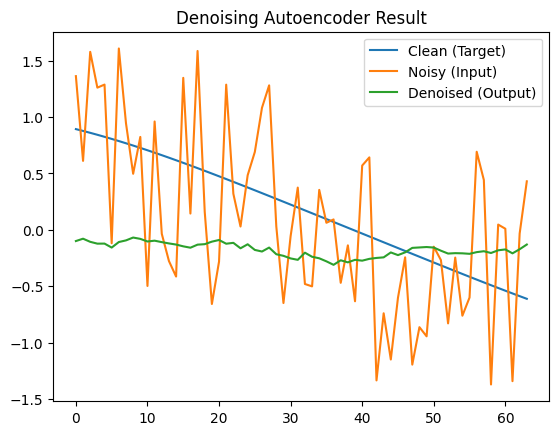

In [ ]:
# ---------------------------------------------------------
# 5. Evaluate Reconstruction
# ---------------------------------------------------------

X_pred = autoencoder.predict(X_test_noisy)

plt.plot(X_test_clean[0], label="Clean (Target)")
plt.plot(X_test_noisy[0], label="Noisy (Input)")
plt.plot(X_pred[0], label="Denoised (Output)")
plt.legend()
plt.title("Denoising Autoencoder Result")
plt.show()

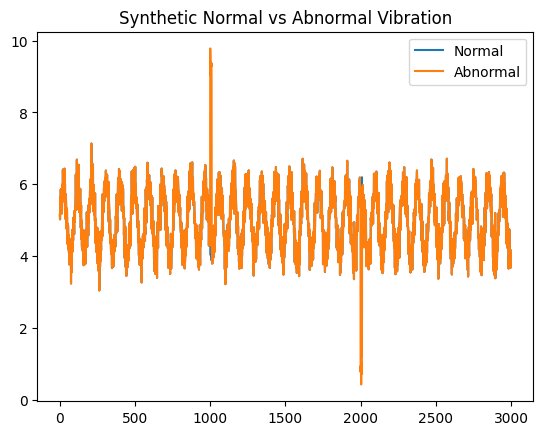

In [ ]:
# ============================================
# ANOMALY DETECTION AUTOENCODER
# ============================================

import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# ---------------------------------------------------------
# 1. Generate "Normal" & "Abnormal" Time Series
# ---------------------------------------------------------

np.random.seed(42)
T = 3000
t = np.arange(T)

normal = 5 + np.sin(t/15) + np.random.normal(0, 0.3, T)
abnormal = normal.copy()
abnormal[1000:1010] += 5   # inject anomaly spike
abnormal[2000:2010] -= 5

# Plot normal + anomaly
plt.plot(normal, label="Normal")
plt.plot(abnormal, label="Abnormal")
plt.legend()
plt.title("Synthetic Normal vs Abnormal Vibration")
plt.show()

normal = normal.reshape(-1,1)
abnormal = abnormal.reshape(-1,1)

In [ ]:
# ---------------------------------------------------------
# 2. Scaling
# ---------------------------------------------------------

scaler = StandardScaler()
normal_scaled   = scaler.fit_transform(normal)
abnormal_scaled = scaler.transform(abnormal)

WINDOW = 60
def make_dataset(series, window):
    X=[]
    for i in range(len(series)-window):
        X.append(series[i:i+window])
    return np.array(X)

X_normal = make_dataset(normal_scaled, WINDOW)
X_abnormal = make_dataset(abnormal_scaled, WINDOW)

# Train ONLY on normal data
split = int(0.8 * len(X_normal))
X_train = X_normal[:split]
X_val   = X_normal[split:]

In [ ]:
# ---------------------------------------------------------
# 3. Build Autoencoder
# ---------------------------------------------------------

inp = keras.Input(shape=(WINDOW,1))

x = keras.layers.Conv1D(32, 5, padding="same", activation="relu")(inp)
x = keras.layers.MaxPooling1D(2, padding="same")(x)
x = keras.layers.Conv1D(16, 5, padding="same", activation="relu")(x)
encoded = keras.layers.MaxPooling1D(2, padding="same")(x)

x = keras.layers.Conv1D(16, 5, padding="same", activation="relu")(encoded)
x = keras.layers.UpSampling1D(2)(x)
x = keras.layers.Conv1D(32, 5, padding="same", activation="relu")(x)
x = keras.layers.UpSampling1D(2)(x)

decoded = keras.layers.Conv1D(1, 5, padding="same")(x)

ae = keras.Model(inp, decoded)
ae.compile(optimizer="adam", loss="mse")
ae.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 60, 32)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 30, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 30, 16)         │         2,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 15, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 15, 16)         │         1,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling1d_2 (UpSampling1D)  │ (None, 30, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 30, 32)         │         2,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling1d_3 (UpSampling1D)  │ (None, 60, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 60, 1)          │           161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,817 (26.63 KB)

 Trainable params: 6,817 (26.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# ---------------------------------------------------------
# 4. Train
# ---------------------------------------------------------

ae.fit(X_train, X_train, validation_data=(X_val,X_val),
       epochs=25, batch_size=32, verbose=2)

Epoch 1/25
74/74 - 4s - 56ms/step - loss: 0.2652 - val_loss: 0.1493
Epoch 2/25
74/74 - 2s - 25ms/step - loss: 0.1346 - val_loss: 0.1229
Epoch 3/25
74/74 - 1s - 10ms/step - loss: 0.1170 - val_loss: 0.1148
Epoch 4/25
74/74 - 1s - 10ms/step - loss: 0.1093 - val_loss: 0.1093
Epoch 5/25
74/74 - 1s - 10ms/step - loss: 0.1038 - val_loss: 0.1043
Epoch 6/25
74/74 - 1s - 10ms/step - loss: 0.0988 - val_loss: 0.0993
Epoch 7/25
74/74 - 1s - 17ms/step - loss: 0.0939 - val_loss: 0.0944
Epoch 8/25
74/74 - 1s - 10ms/step - loss: 0.0891 - val_loss: 0.0899
Epoch 9/25
74/74 - 1s - 10ms/step - loss: 0.0839 - val_loss: 0.0851
Epoch 10/25
74/74 - 1s - 10ms/step - loss: 0.0776 - val_loss: 0.0784
Epoch 11/25
74/74 - 1s - 13ms/step - loss: 0.0676 - val_loss: 0.0657
Epoch 12/25
74/74 - 1s - 15ms/step - loss: 0.0554 - val_loss: 0.0575
Epoch 13/25
74/74 - 1s - 14ms/step - loss: 0.0481 - val_loss: 0.0522
Epoch 14/25
74/74 - 1s - 10ms/step - loss: 0.0424 - val_loss: 0.0466
Epoch 15/25
74/74 - 1s - 10ms/step - loss: 

In [ ]:
# ---------------------------------------------------------
# 5. Compute Reconstruction Error Threshold
# ---------------------------------------------------------

recon_normal = ae.predict(X_normal)
mse_normal = np.mean((X_normal - recon_normal)**2, axis=(1,2))

threshold = np.mean(mse_normal) + 3*np.std(mse_normal)
print("Anomaly Threshold:", threshold)

92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Anomaly Threshold: 0.04353056818517967


92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


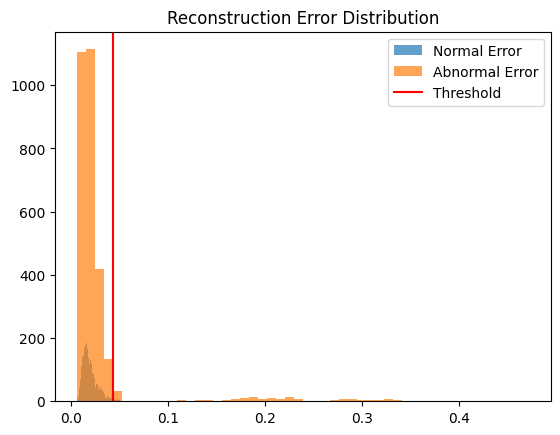

Percent Abnormal Detected: 5.986394557823129 %


In [ ]:
# ---------------------------------------------------------
# 6. Test Abnormal Samples
# ---------------------------------------------------------

recon_abnormal = ae.predict(X_abnormal)
mse_abnormal = np.mean((X_abnormal - recon_abnormal)**2, axis=(1,2))

plt.hist(mse_normal, bins=50, alpha=0.7, label="Normal Error")
plt.hist(mse_abnormal, bins=50, alpha=0.7, label="Abnormal Error")
plt.axvline(threshold, color='red', label="Threshold")
plt.title("Reconstruction Error Distribution")
plt.legend()
plt.show()

# Binary anomaly decision
pred_label = (mse_abnormal > threshold).astype(int)
print("Percent Abnormal Detected:", pred_label.mean()*100, "%")

In [ ]:
#  MEASURING ERROR dalam Time-Series Forecasting

# 1. How to Test Forecast (Model-Specific Considerations for Backtesting)
# Backtesting untuk time-series tidak sama seperti train–test biasa, karena urutan waktu tidak boleh diacak.
# Tujuan backtest: mengevaluasi bagaimana model bekerja pada horizon yang belum pernah dilihat, dengan kondisi realistis seperti saat prediksi di deployment.
# 1.1. Train-Test Split Khusus Time-Series
# Jenis-jenis yang benar untuk time-series:
# a. Hold-Out Temporal Split
# Contoh:
# Train: 2018–2022
# Test: 2023
# Dipakai untuk baseline, cepat, tetapi tidak cukup untuk model sensitif seasonality.
# b. Rolling / Expanding Window Backtesting
# Ini paling disarankan untuk ML dan deep learning time-series.
# Expanding window
# Train 2018–2020 → Test Jan 2021
# Train 2018–2021 → Test Jan 2022
# Jumlah data train bertambah.
# Sliding window
# Train 2018–2020 → Test Jan 2021
# Train 2019–2021 → Test Jan 2022
# Size tetap, window bergeser.
# Gunanya: melihat performa model pada berbagai fase musiman.
# 1.2. Model-Specific Backtesting
# Beberapa model butuh trik tambahan:
# ✓ ARIMA / ETS
# Harus difit ulang tiap window
# Awas data leakage dalam differencing atau seasonal transformation
# ✓ Machine Learning
# Random forest, XGBoost, SVR tidak paham temporal order → gunakan lag features, window features, rolling statistics
# ✓ Deep Learning
# LSTM/GRU perlu sequence input → pastikan sequence tidak bocor ke masa depan
# Transformer forecasting biasanya memakai windowing + positional encoding
# Jangan pakai normalization yang menghitung μ/σ seluruh dataset (leak!)

# 2. When Is Your Forecast Good Enough?
# Tidak ada jawaban mutlak — harus sesuai use-case dan toleransi risiko. Tetapi ada prinsip:
# 2.1. Bandingkan dengan Baseline Sederhana
# Model dianggap “bagus” jika mengalahkan baseline seperti:
# Naïve forecast (yₜ₊₁ = yₜ)
# Seasonal naïve
# Moving average
# Exponential smoothing sederhana
# Jika sebuah deep learning kalah dari “naive seasonal”, berarti overkill/overfitting.
# 2.2. Error Metrics yang Paling Penting
# Metrics terbaik untuk time-series:
# MAE — stabil, mudah dipahami
# RMSE — penalti untuk error besar
# MAPE — hanya jika data tidak mengandung zero
# sMAPE — versi stabil MAPE
# MASE — sangat disarankan; membandingkan error vs model naïve 1-step
# > Kalau MASE < 1, berarti model lebih baik dari naïve.
# 2.3. Good Enough = Beberapa Indikator Minimal
# 1. Mengalahkan baseline  → syarat minimum
# 2. Stabil across seasonal cycles → tidak hanya bagus di 1 periode
# 3. Tidak lonjak error untuk horizon yang lebih panjang
# 4. Error masuk toleransi operasional
# contoh supply chain: MAPE < 20%
# forecasting energi: MAPE < 5%
# manufaktur: tergantung criticality

# 3. Predicting Multiple Steps Ahead
# Untuk horizon H-step (misal prediksi 6 atau 30 langkah ke depan), ada tiga pendekatan:
# 3.1. Direct Method
# Fit model langsung untuk horizon tertentu.
# Model-h1 → predict 1-step ahead
# Model-h3 → predict 3-step ahead
# Model-h10 → predict 10-step ahead
# Kelebihan:
# sangat akurat untuk horizon tertentu
# Kekurangan:
# harus training banyak model
# tidak share knowledge antar horizon
# 3.2. Recursive Method (Autoregressive Forecasting)
# Model hanya memprediksi 1 step, lalu prediksi itu dijadikan input untuk step berikutnya.
# ŷₜ₊₁ = f(yₜ)
# ŷₜ₊₂ = f(ŷₜ₊₁)
# Kelebihan:
# satu model
# Kelemahan:
# error compounding
# makin jauh horizon makin rusak
# Cocok untuk data “smooth”.
# 3.3. Multi-Output / Multi-Horizon / Multitask Learning
# Deep learning sangat kuat di sini.
# Model mengeluarkan banyak prediksi sekaligus:
# [ŷₜ₊₁, ŷₜ₊₂, ..., ŷₜ₊ₕ]
# Teknik multitask learning:
# Shared encoder → multiple output heads
# Dilated CNN (TemporalConv)
# Transformer decoder multi-horizon
# N-BEATS, DeepAR, TFT
# Kelebihan:
# tidak compounding error
# satu model untuk semua horizon
# menangkap dependensi antar horizon

# 4. Model Validation Gotchas (Kesalahan Umum)
# Ini “ranjau” paling sering terjadi dalam time-series:
# ❌ 1. Data leakage
# scaling pada full dataset
# generate lag/rolling pada seluruh dataset
# menggunakan future information dalam feature engineering
# menggunakan differencing yang bocor
# ❌ 2. Validasi tidak memakai temporal split
# k-fold biasa → tidak valid untuk time series.
# ❌ 3. Horizon evaluation tidak konsisten
# Model bisa akurat 1-step, tapi parah di 20-step.
# ❌ 4. Overfitting seasonal patterns
# Deep learning mudah sekali menghafal musiman tanpa memahami struktur.
# ❌ 5. Tidak membuat baseline
# Harus selalu ada naive seasonal sebagai pembanding.
# ❌ 6. Error metrics salah
# MAPE sering menipu kalau ada zero atau near-zero values.
# ❌ 7. Menggunakan terlalu sedikit data
# Transformer forecasting perlu ratusan ribu titik, bukan 900 baris saja.